In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
import math
df=pd.read_csv('Metazygia monitor 1.csv', index_col=0)
df['Date_Time'] = df.index
dfdark=df.iloc[7200:]
dflight=df.iloc[:7200]
#df['Date_Time'] = df.index
column=df.columns[1:-1]
#print(column)
df1=df.copy()
columns=df1.columns[1:-1]
dfcos=dfdark.loc[:,['lights','Monitor 1 Spider 21']]
dfcos['test']='Spider'
dfcos['real']=dfdark['Monitor 1 Spider 21']
dfcos['y']=dfcos['real'].rolling(window=60).mean()
dfcos['x']=range(0,len(dfcos.real))
#dfcos=dfcos.drop(columns=['lights', 'Monitor 1 Spider 21'])
dfcos=dfcos.dropna()
dff = pd.read_csv('Metazygia monitor 1_DD.csv', index_col=0)
dfdark = dfdark.drop(columns = ['lights', 'Date_Time'])

# Dark Free Running Period

In [5]:
#from gatspy.periodic import periodogram_auto
from gatspy.periodic import LombScargleFast
    
time = range(len(dfcos.x))
##Use rolling average to find period:
#move = dfcos['y'].values
##Use real data to find period:
move = dfcos['real'].values
model = LombScargleFast().fit(time, move)
periods, power = model.periodogram_auto()
eightteen_hours=18*60
thirtysix_hours=36*60
#Estimated periods will fall between 18 and thirty-six hours
model.optimizer.period_range = (eightteen_hours, thirtysix_hours)

period = model.best_period
#Record period in hours
periodh=(period/60)
#display(periodh)

per=pd.DataFrame(index=columns)
period=np.empty(len(columns))
for i in range(len(columns)):
    time = range(len(dfdark.index))
    move = dfdark[columns[i]].values
    model = LombScargleFast().fit(time, move)
    #18-36 hours
    model.optimizer.period_range = (eightteen_hours, thirtysix_hours)
    period[i] = (model.best_period)/60    

Finding optimal frequency:
 - Estimated peak width = 0.000487
 - Using 5 steps per peak; omega_step = 9.74e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 c

In [6]:
per['Period']=period
display(per)
perT = per.T

Period
Monitor 1 Spider 1   21.946098
Monitor 1 Spider 2   21.305306
Monitor 1 Spider 3   24.450380
Monitor 1 Spider 4   24.662566
Monitor 1 Spider 5   21.326343
Monitor 1 Spider 6   22.180489
Monitor 1 Spider 7   18.762337
Monitor 1 Spider 8   23.220177
Monitor 1 Spider 9   23.787924
Monitor 1 Spider 10  22.904977
Monitor 1 Spider 11  23.539040
Monitor 1 Spider 12  34.449646
Monitor 1 Spider 13  22.008714
Monitor 1 Spider 14  18.979975
Monitor 1 Spider 15  20.804562
Monitor 1 Spider 16  21.564828
Monitor 1 Spider 18  22.226139
Monitor 1 Spider 19  22.285767
Monitor 1 Spider 20  22.702737
Monitor 1 Spider 21  23.447046
Monitor 1 Spider 25  24.466998
Monitor 1 Spider 26  22.769753
Monitor 1 Spider 27  21.427902
Monitor 1 Spider 28  18.011314
Monitor 1 Spider 29  22.968308
Monitor 1 Spider 30  22.598221
Monitor 1 Spider 31  21.466236
Monitor 1 Spider 32  19.794034

# Light Free Running Period

In [7]:
dfcos=dflight.loc[:,['lights','Monitor 1 Spider 21']]
dfcos['test']='Spider'
dfcos['real']=dflight['Monitor 1 Spider 21']
dfcos['y']=dfcos['real'].rolling(window=60).mean()
dfcos['x']=range(0,len(dfcos.real))
#dfcos=dfcos.drop(columns=['lights', 'Monitor 1 Spider 21'])
dfcos=dfcos.dropna()

time = range(len(dfcos.x))
##Use rolling average to find period:
#move = dfcos['y'].values
##Use real data to find period:
move = dfcos['real'].values
model = LombScargleFast().fit(time, move)
periods, power = model.periodogram_auto()
eightteen_hours=18*60
thirtysix_hours=36*60
#Estimated periods will fall between 18 and thirty-six hours
model.optimizer.period_range = (eightteen_hours, thirtysix_hours)

period = model.best_period
#Record period in hours
periodh=(period/60)
#display(periodh)

per_light=pd.DataFrame(index=columns)
period=np.empty(len(columns))
for i in range(len(columns)):
    time = range(len(dflight.index))
    move = dflight[columns[i]].values
    model = LombScargleFast().fit(time, move)
    #18-36 hours
    model.optimizer.period_range = (eightteen_hours, thirtysix_hours)
    period[i] = (model.best_period)/60    

Finding optimal frequency:
 - Estimated peak width = 0.00088
 - Using 5 steps per peak; omega_step = 0.000176
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 18 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000873
 - Using 5 steps per peak; omega_step = 0.000175
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 18 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000873
 - Using 5 steps per peak; omega_step = 0.000175
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 18 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000873
 - Using 5 steps per peak; omega_step = 0.000175
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 18 steps
Zooming-in on 5 

In [8]:
per_light['Period']=period
display(per_light)
per_lightT = per_light.T

Period
Monitor 1 Spider 1   23.811554
Monitor 1 Spider 2   24.205461
Monitor 1 Spider 3   23.661290
Monitor 1 Spider 4   24.323229
Monitor 1 Spider 5   22.806746
Monitor 1 Spider 6   23.811554
Monitor 1 Spider 7   23.357283
Monitor 1 Spider 8   22.703174
Monitor 1 Spider 9   22.686004
Monitor 1 Spider 10  23.651961
Monitor 1 Spider 11  23.717416
Monitor 1 Spider 12  23.624020
Monitor 1 Spider 13  23.284757
Monitor 1 Spider 14  21.693391
Monitor 1 Spider 15  21.835517
Monitor 1 Spider 16  22.524170
Monitor 1 Spider 18  23.293798
Monitor 1 Spider 19  24.362739
Monitor 1 Spider 20  22.634648
Monitor 1 Spider 21  23.060988
Monitor 1 Spider 25  23.935056
Monitor 1 Spider 26  22.583524
Monitor 1 Spider 27  23.708043
Monitor 1 Spider 28  23.448578
Monitor 1 Spider 29  23.149978
Monitor 1 Spider 30  23.402841
Monitor 1 Spider 31  24.108189
Monitor 1 Spider 32  22.999102

# Start with Max Activity:

In [9]:
def average_subjective_activity_max_first(df, subjective_df):
    for spider in range(len(df.columns)):
        dft = df.copy()
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,24), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 24)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

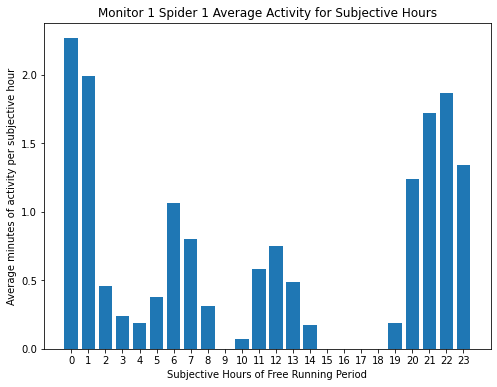

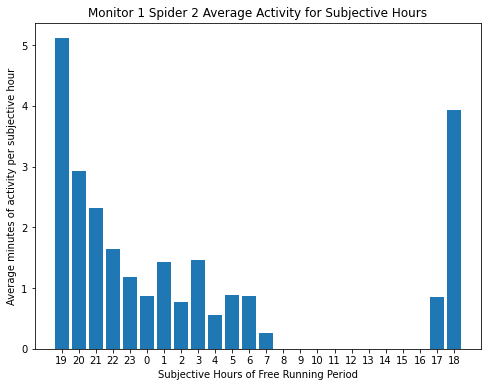

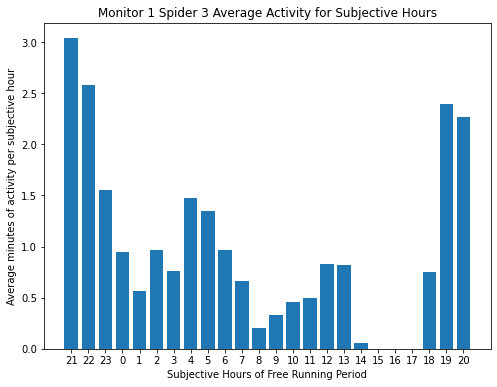

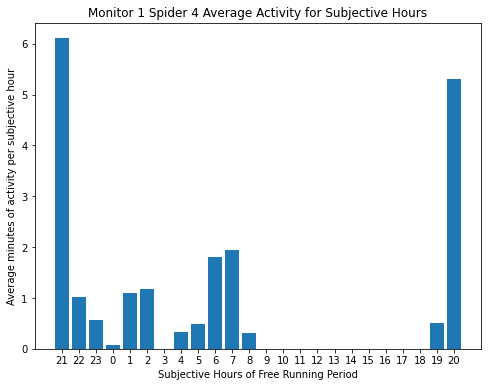

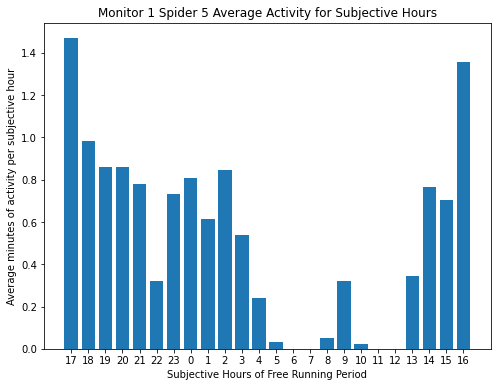

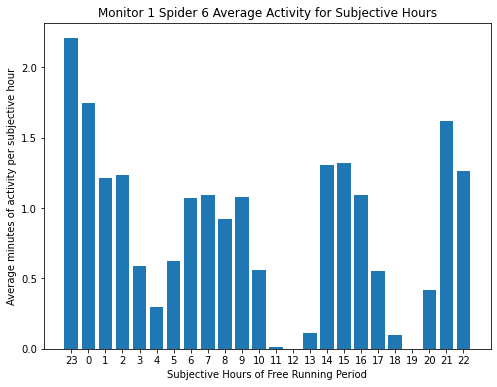

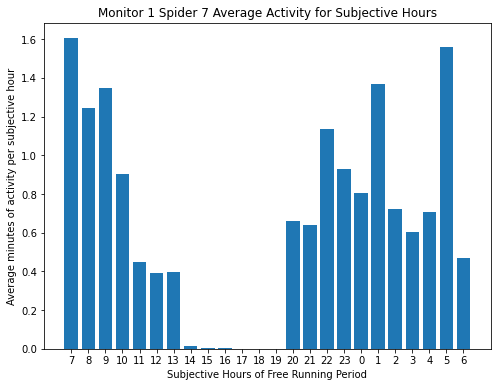

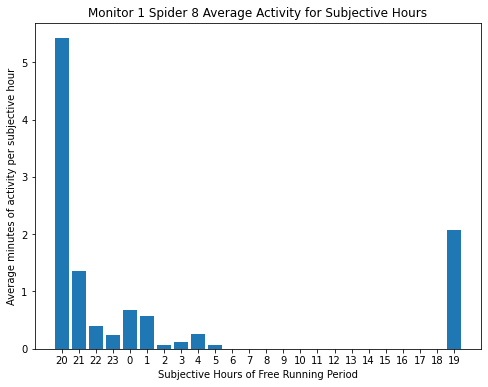

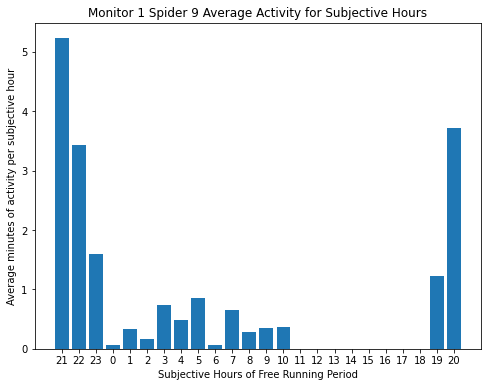

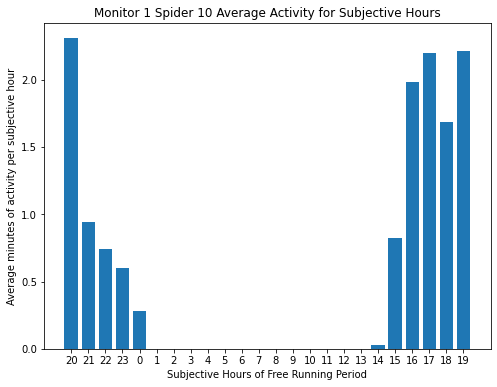

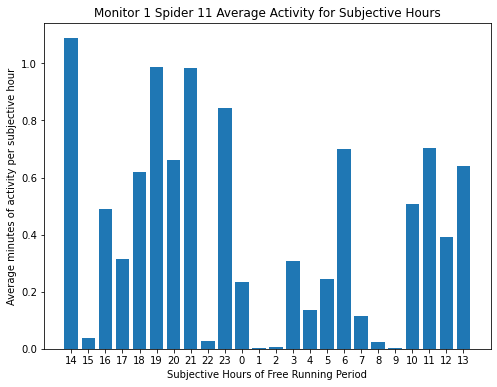

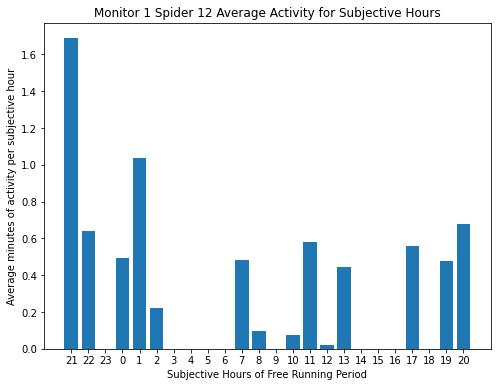

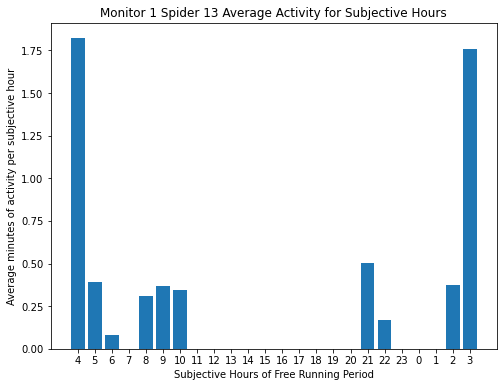

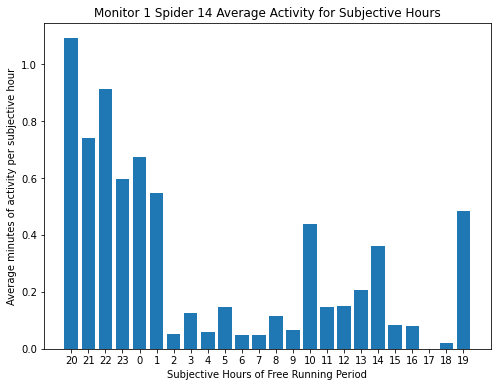

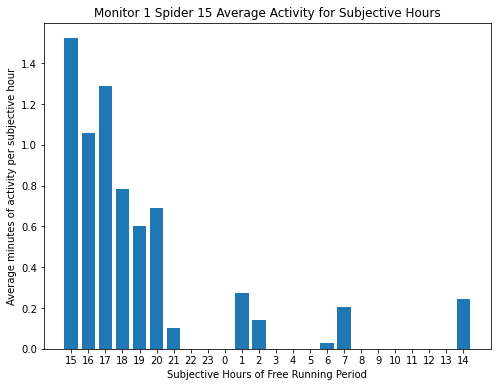

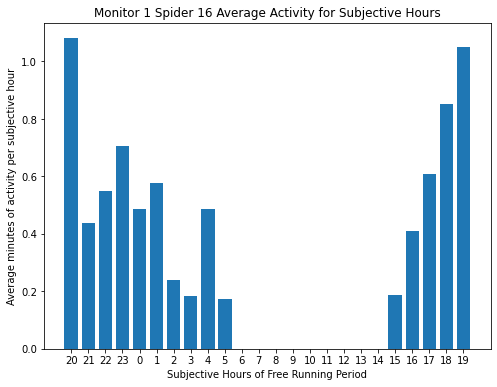

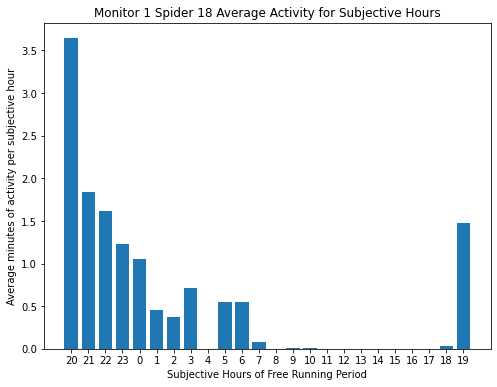

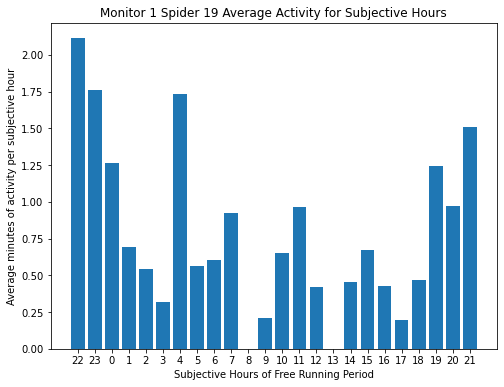

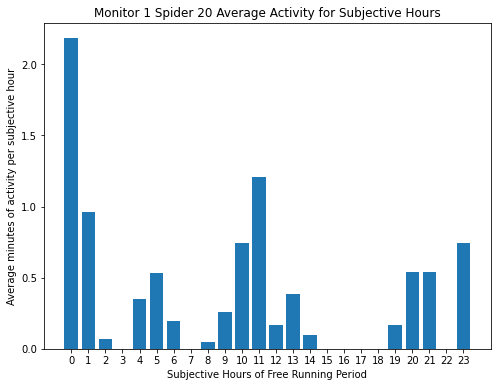

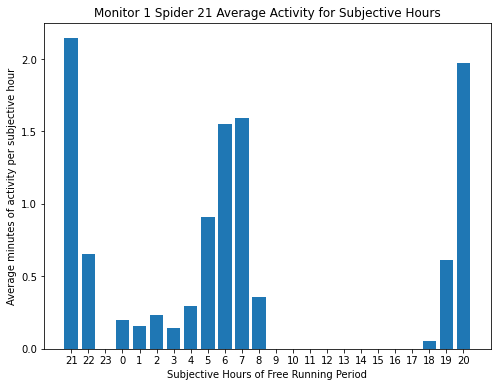

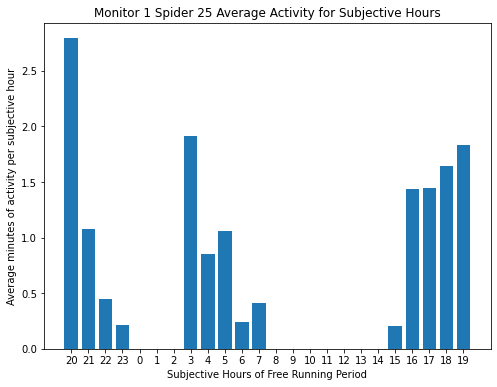

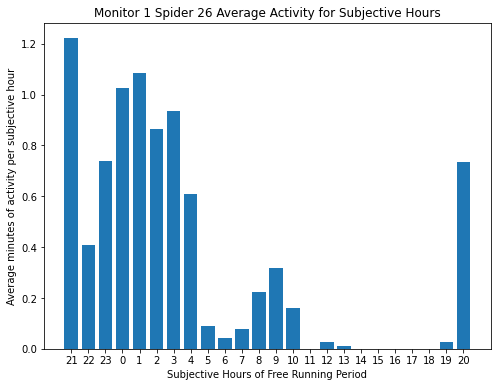

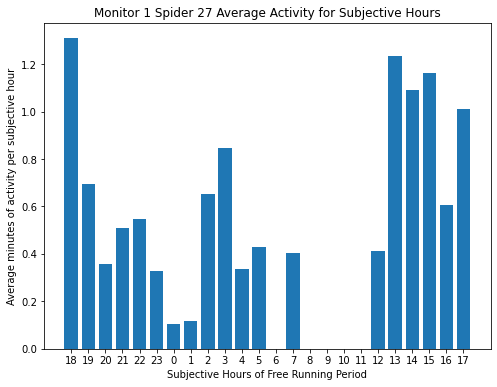

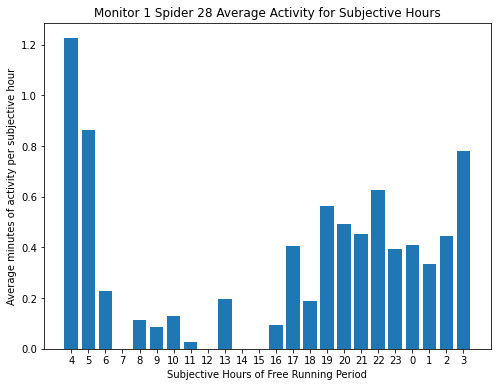

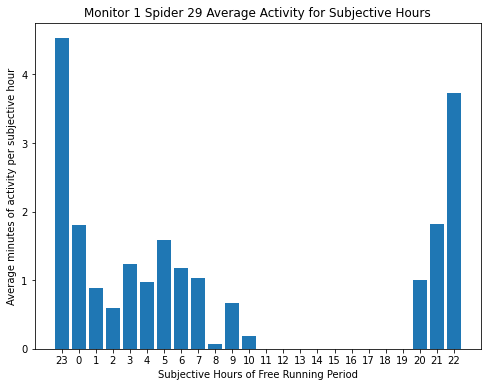

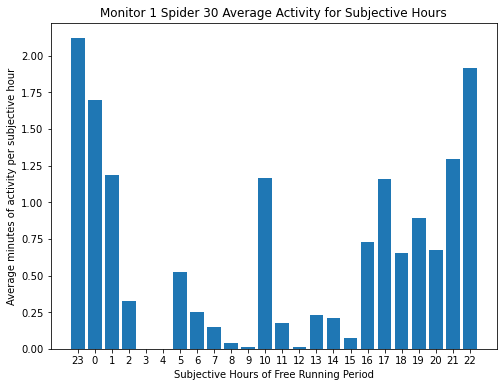

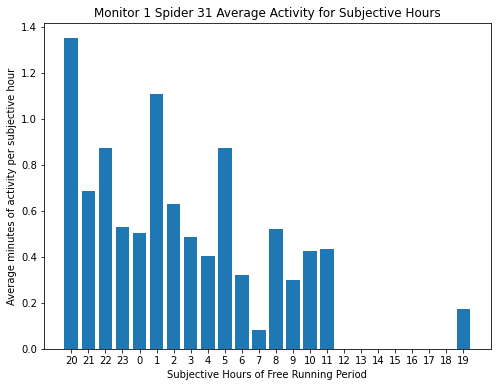

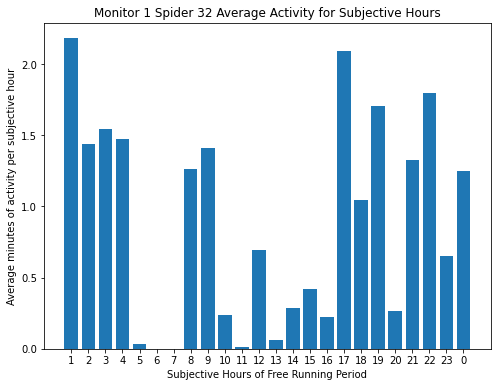

In [10]:
average_subjective_activity_max_first(dfdark, perT)

# Start with No Activity

In [11]:
def average_subjective_activity_min_first(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        min_avg_hour = avg_mins.argmin()
        reordered_avg_mins = pd.concat([avg_mins[min_avg_hour:], avg_mins[:min_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,24), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(min_avg_hour, 24)) + list(range(0, min_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

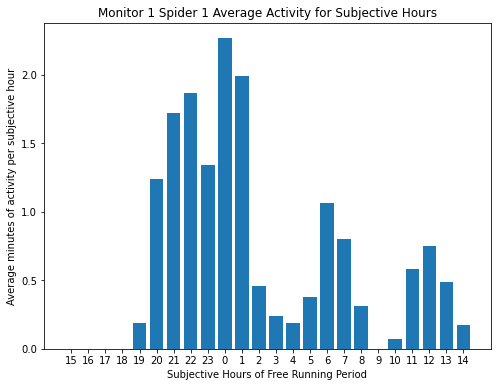

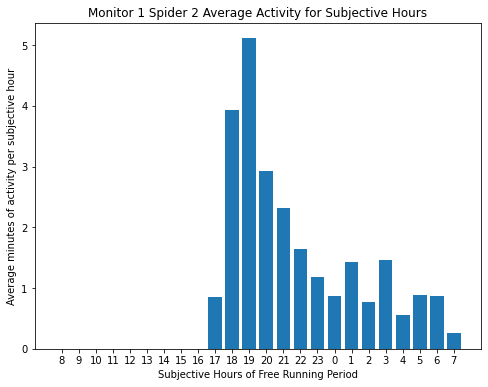

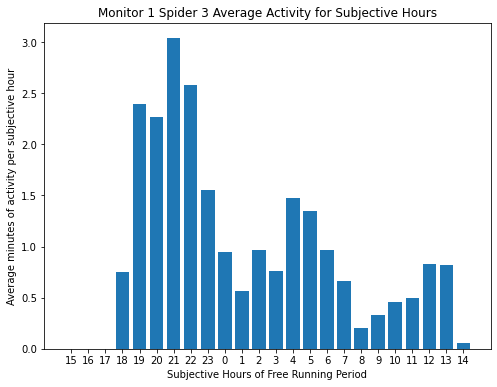

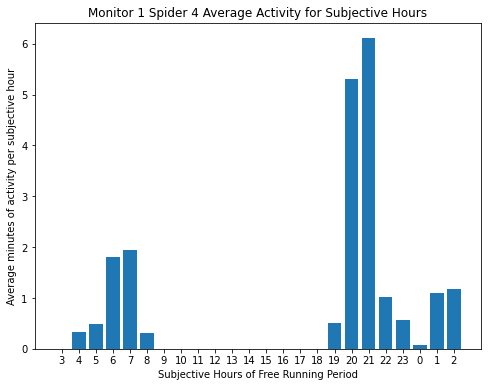

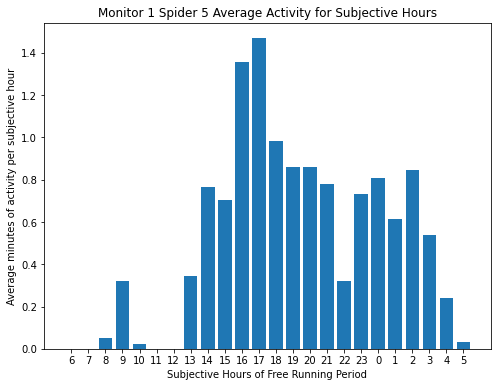

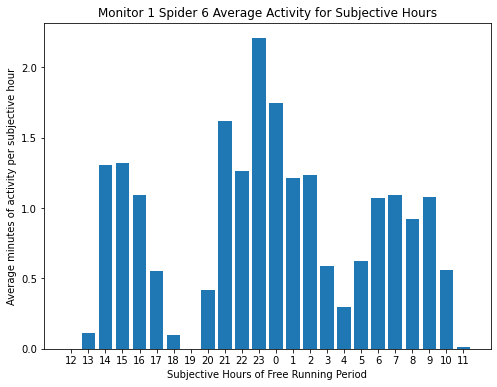

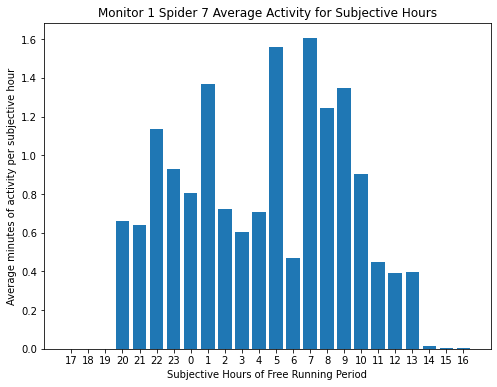

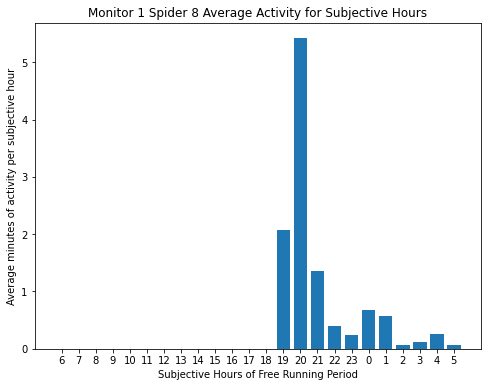

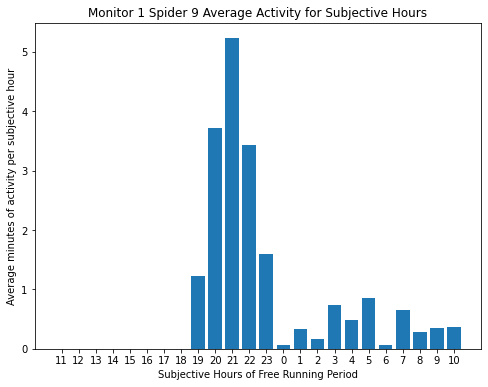

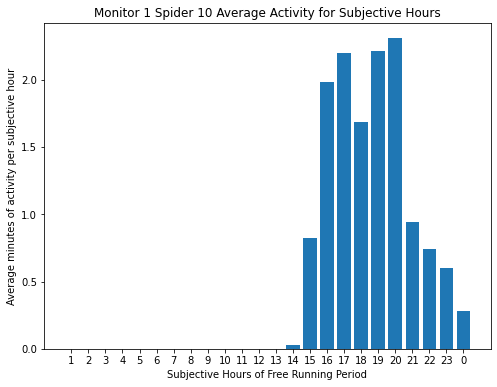

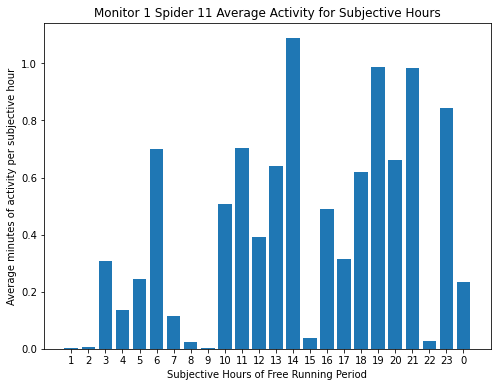

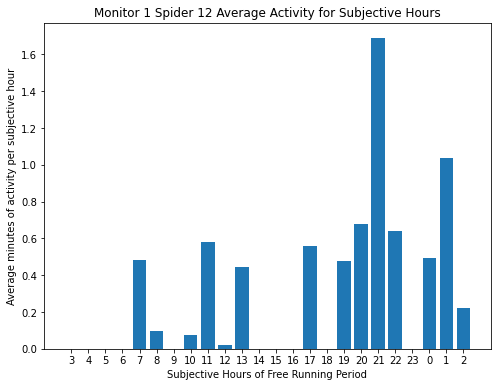

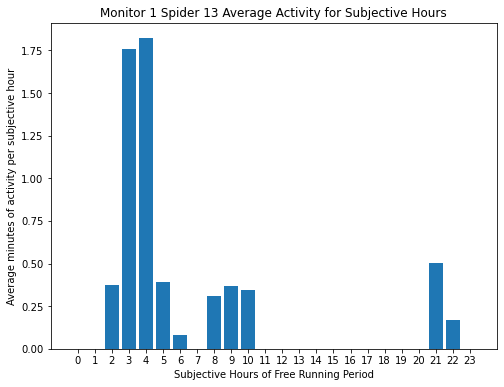

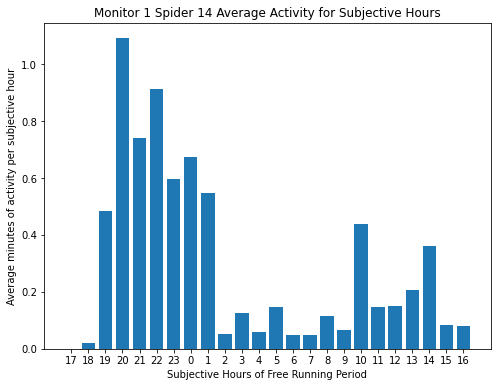

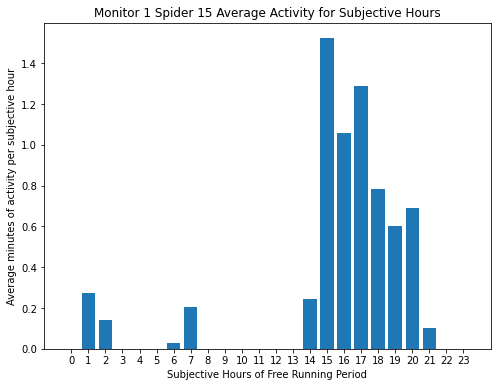

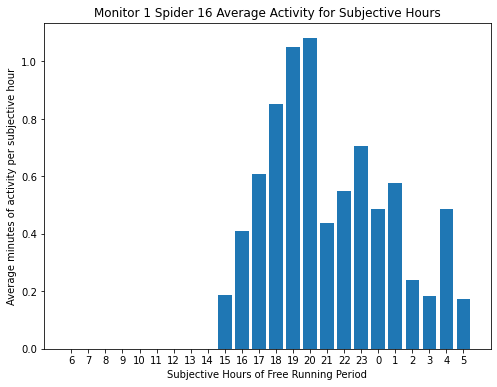

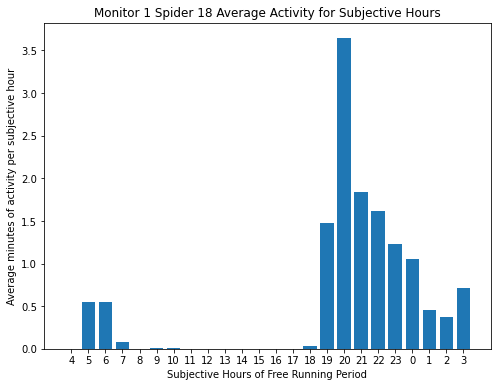

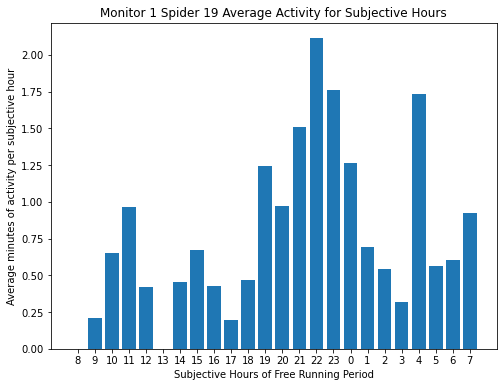

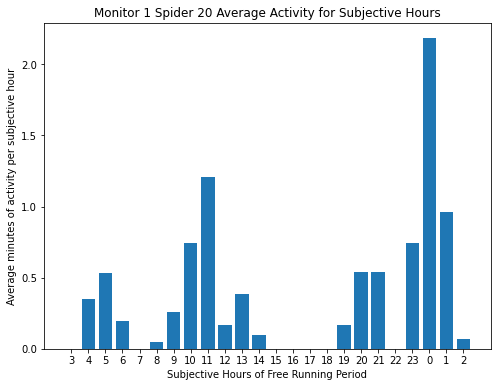

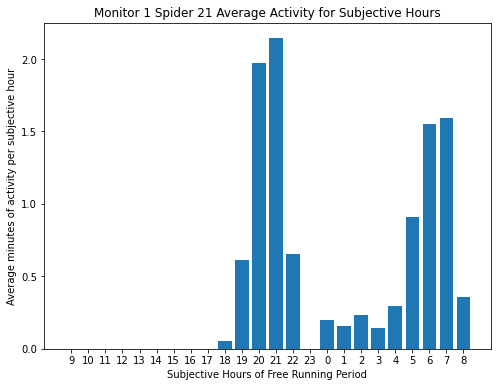

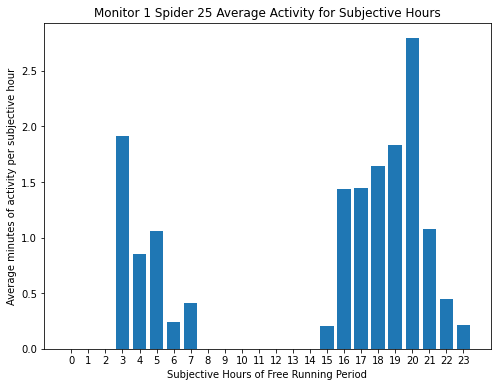

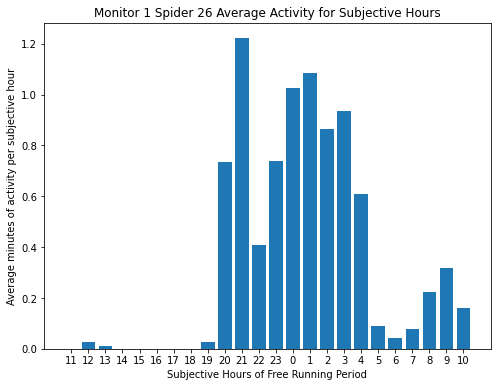

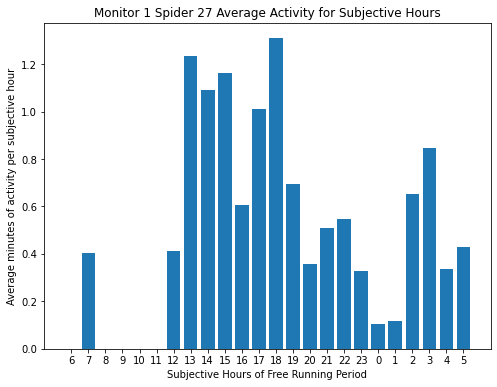

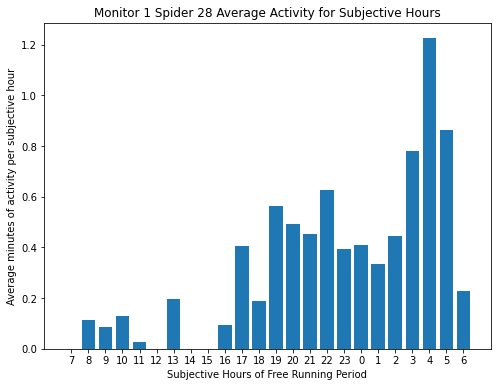

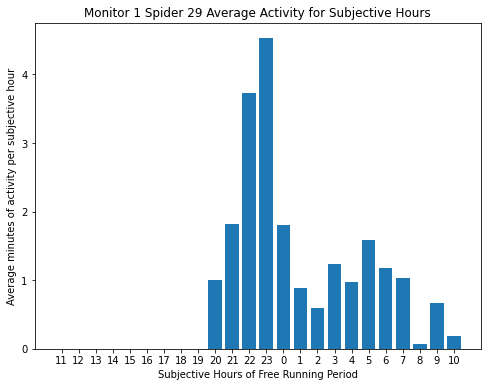

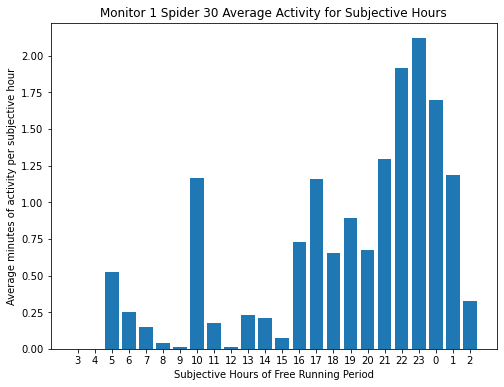

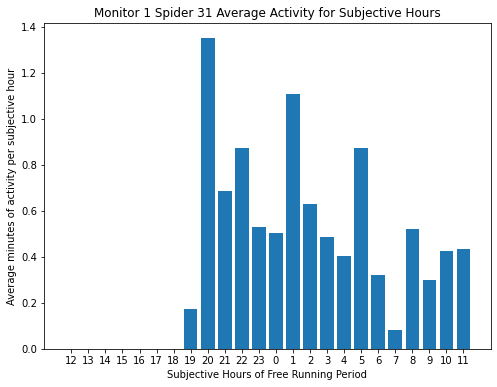

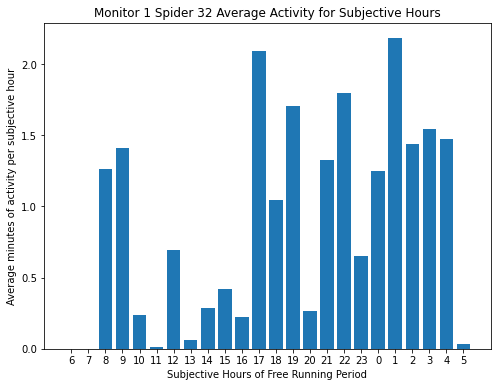

In [12]:
average_subjective_activity_min_first(dfdark, perT)

# 4 Bins

In [13]:
def average_subjective_activity_max_first_4bins(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 4:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,4), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 4)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

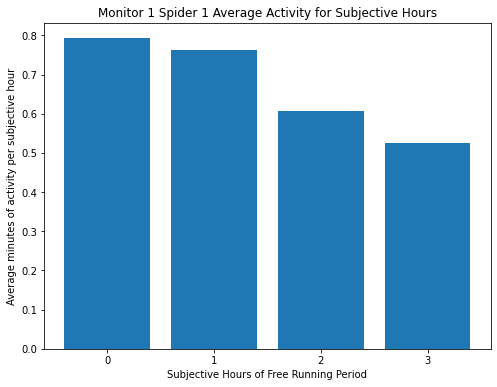

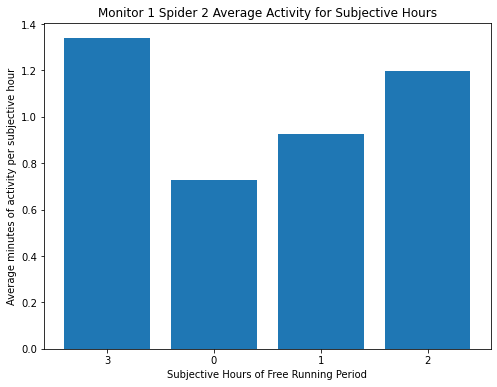

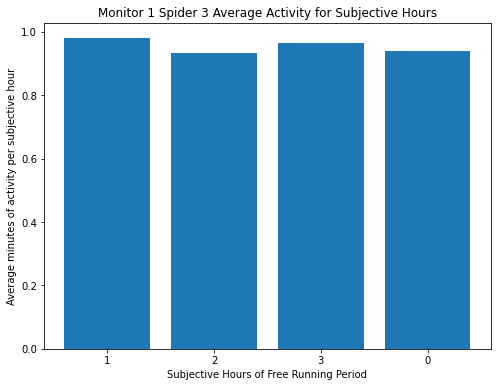

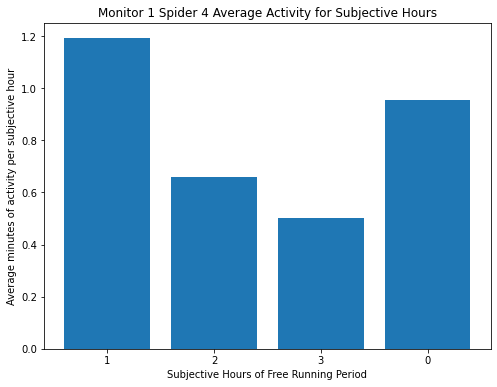

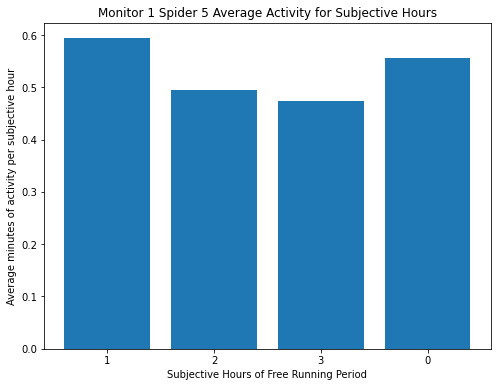

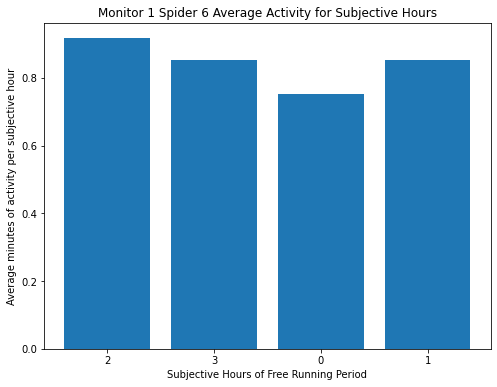

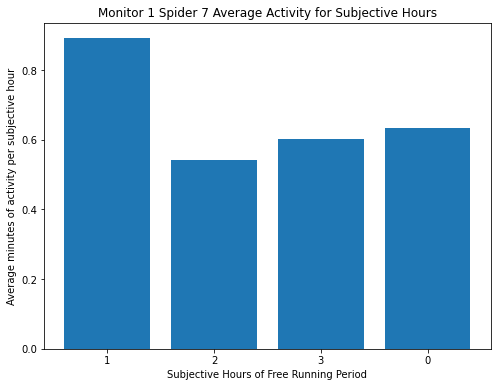

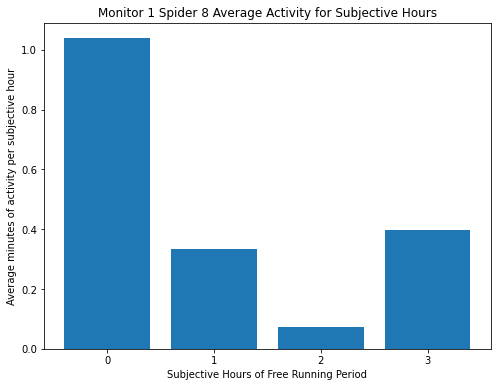

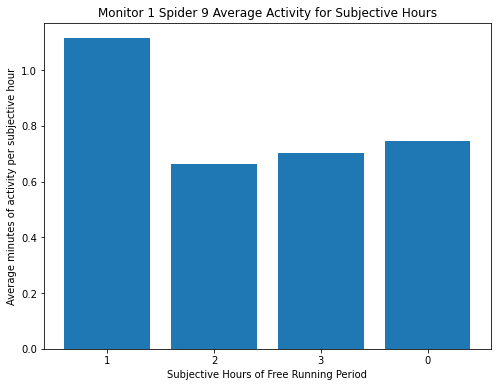

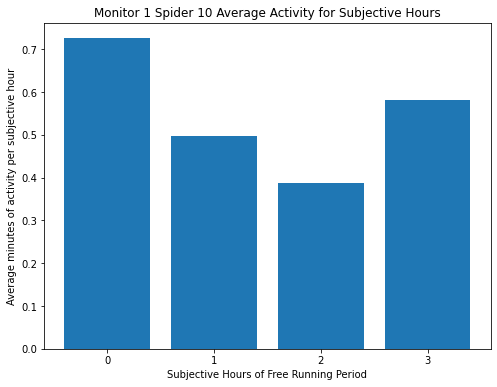

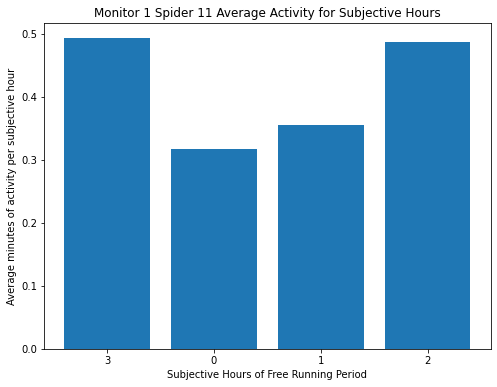

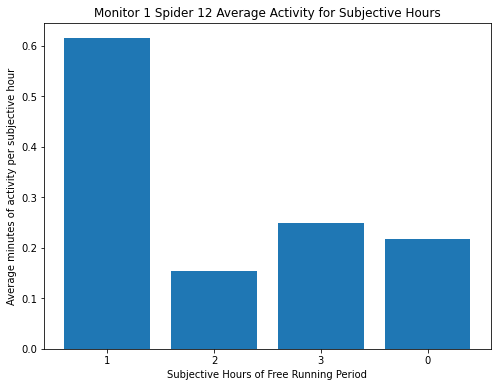

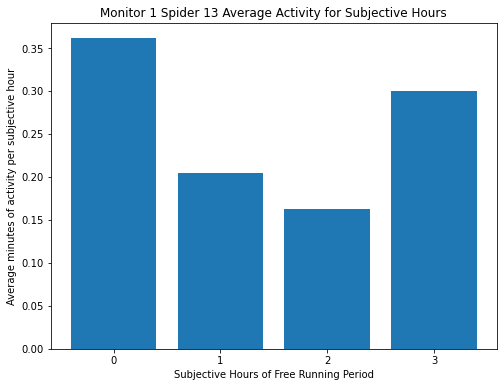

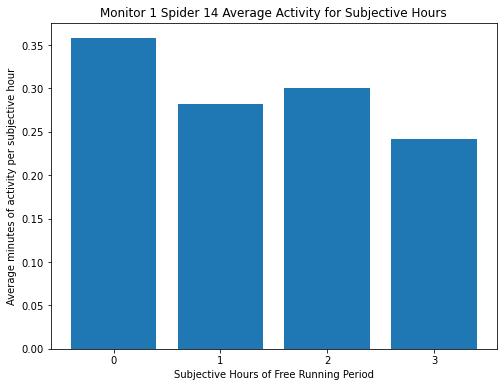

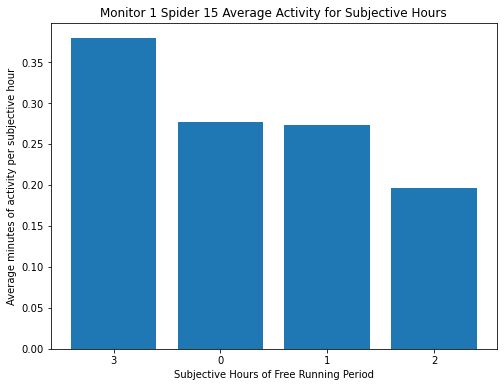

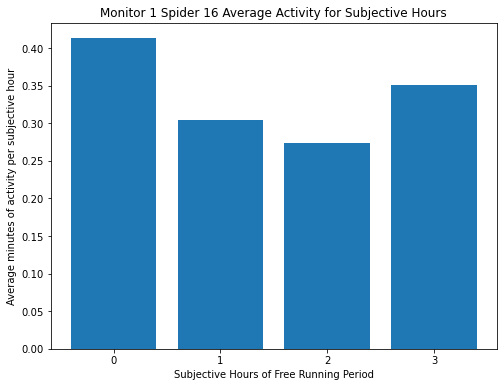

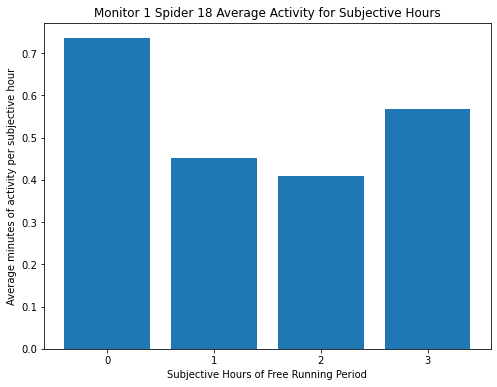

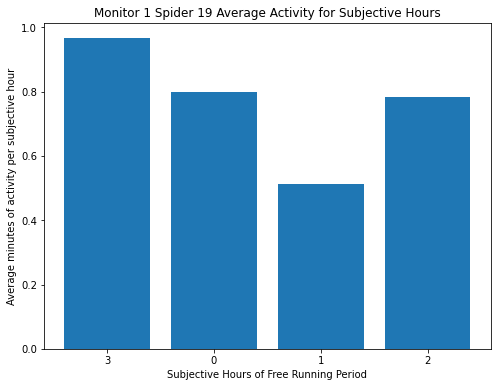

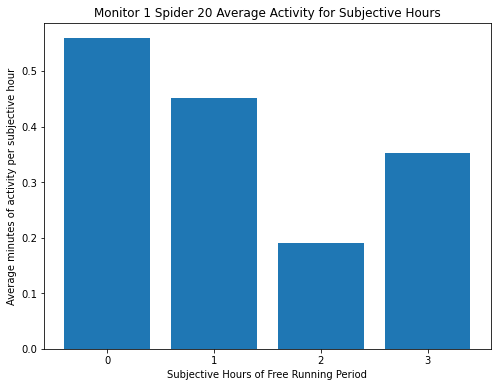

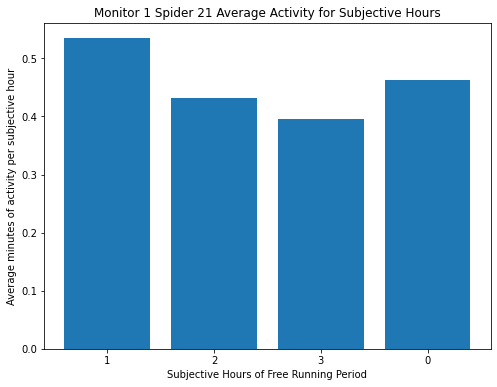

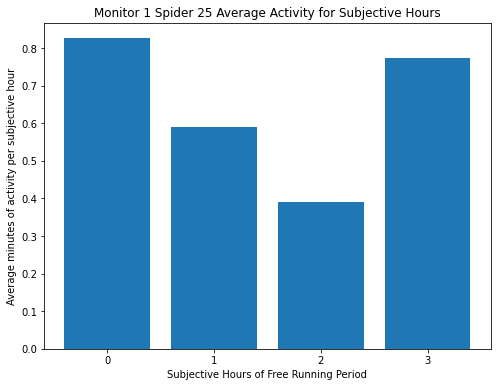

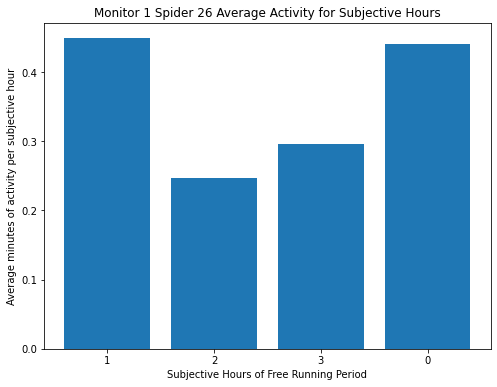

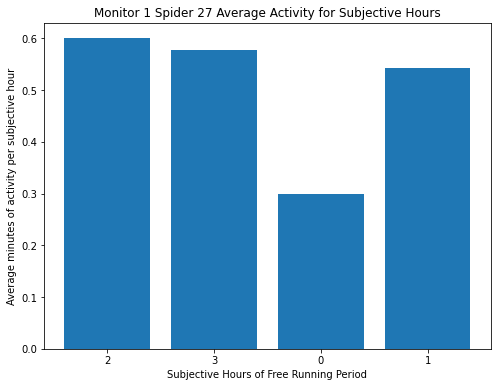

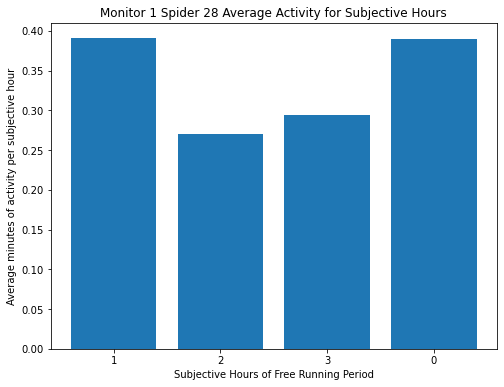

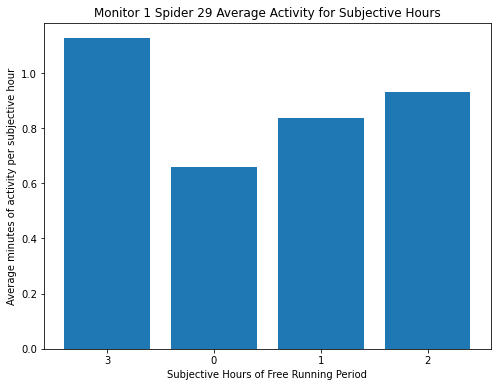

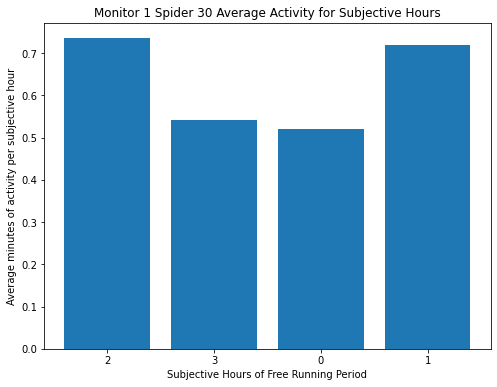

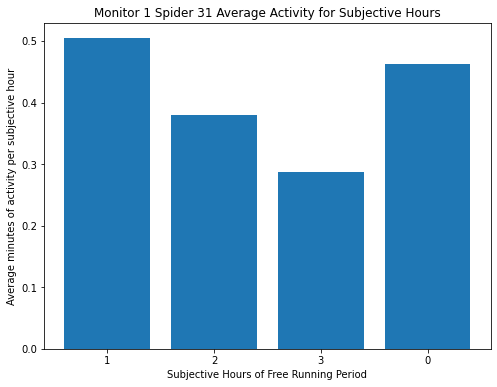

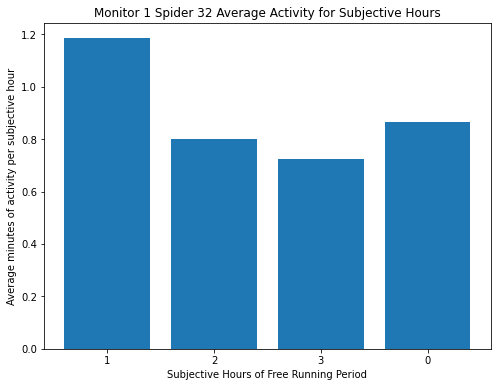

In [14]:
average_subjective_activity_max_first_4bins(dfdark, perT)

# 8 Bins

In [15]:
def average_subjective_activity_max_first_8bins(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 8:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,8), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 8)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

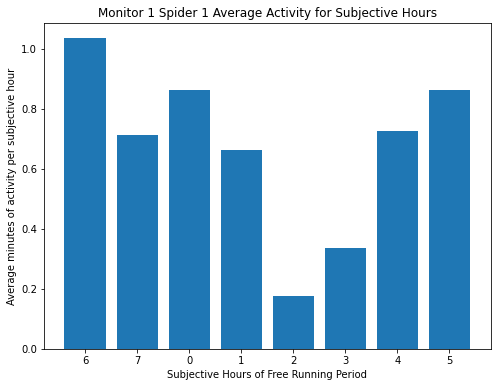

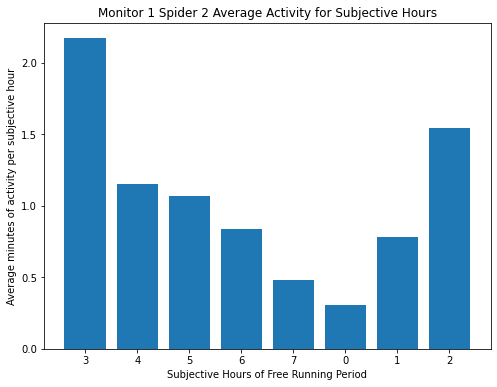

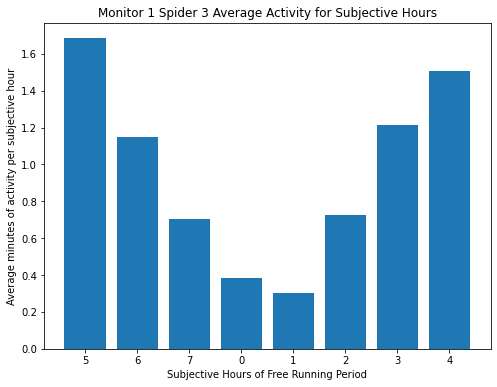

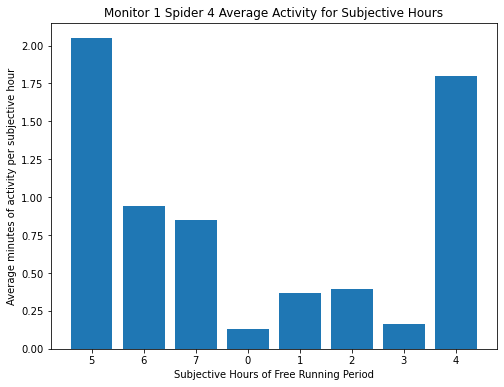

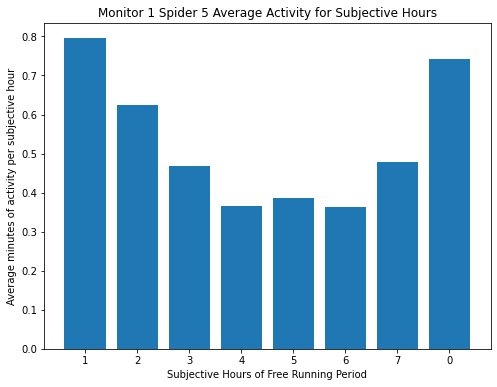

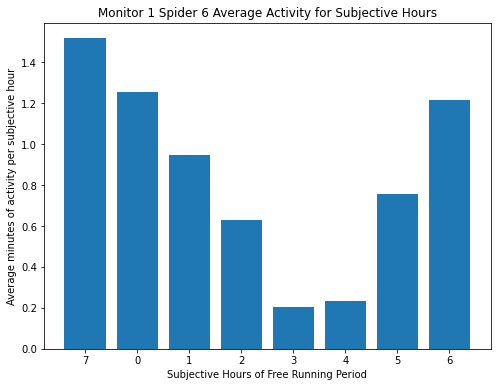

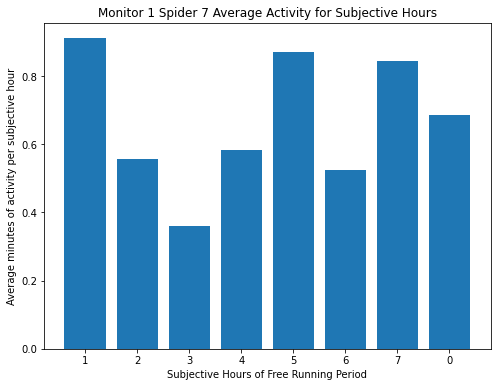

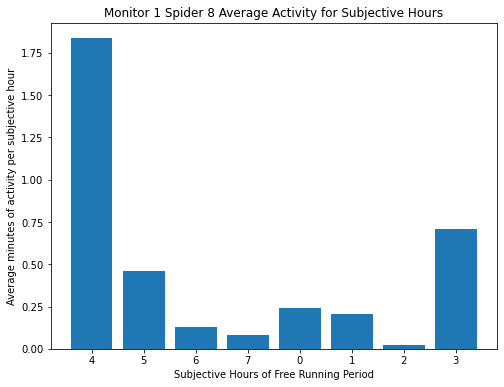

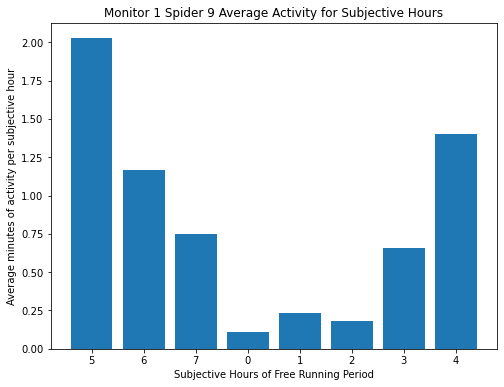

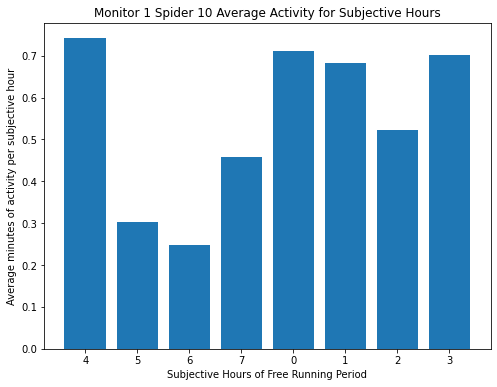

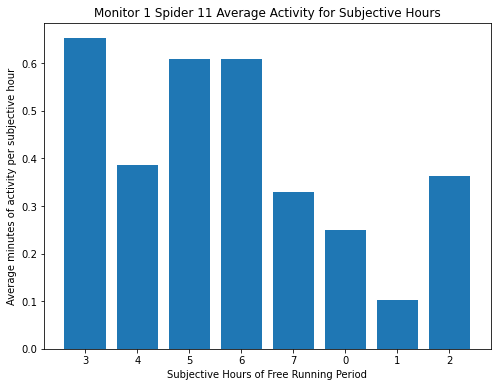

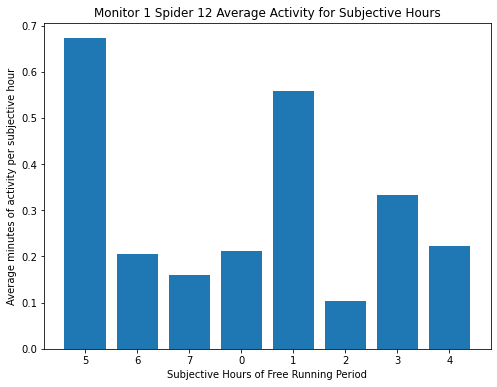

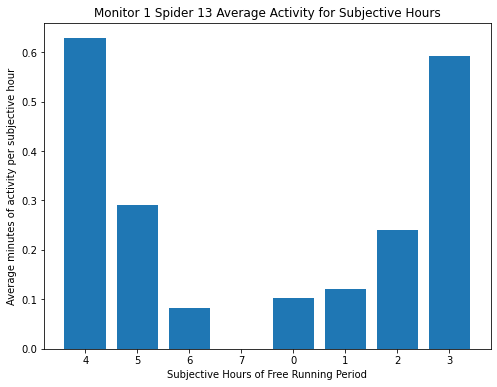

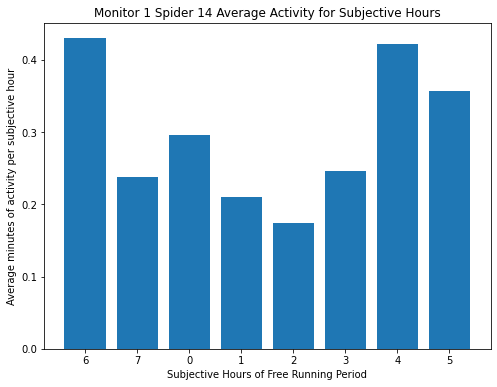

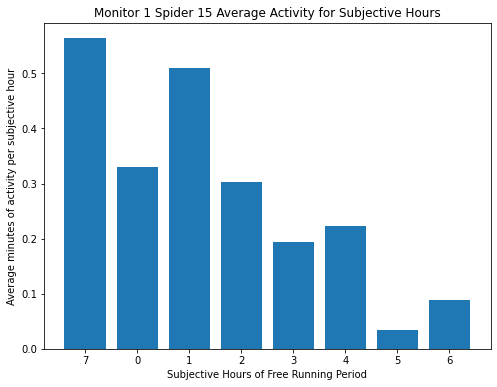

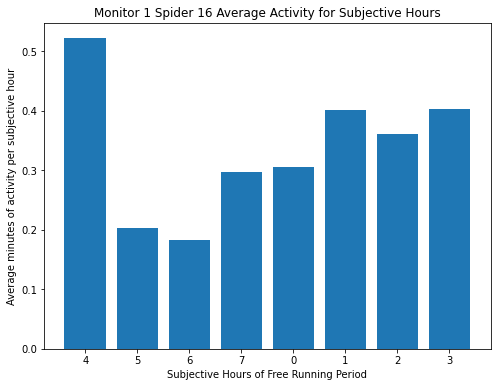

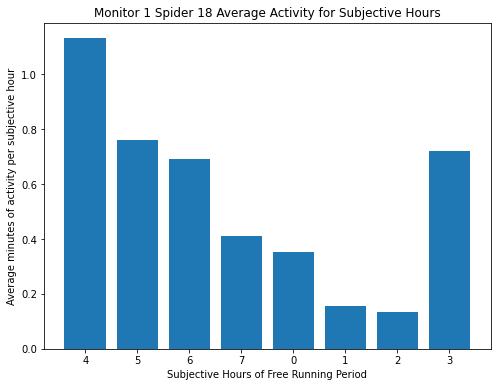

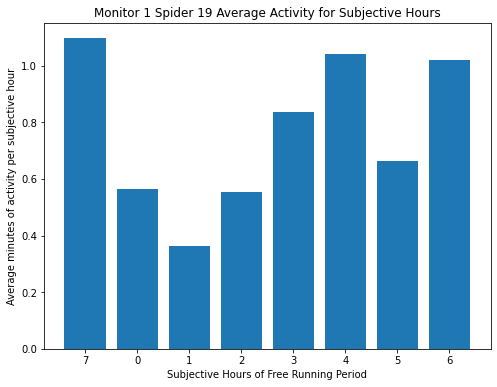

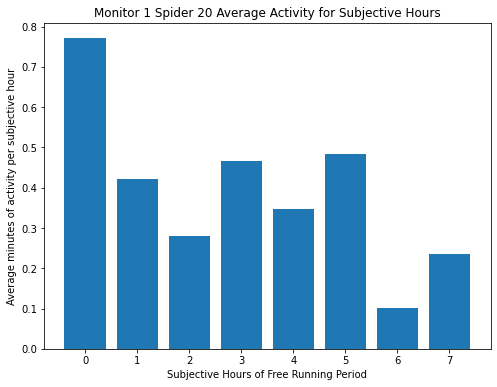

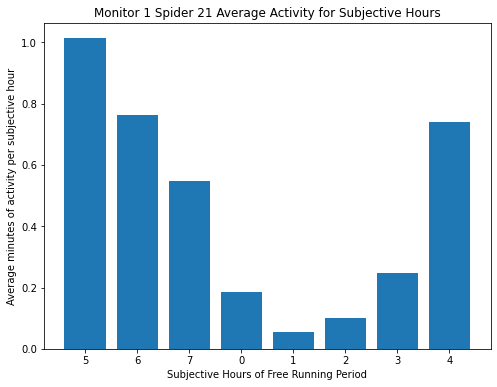

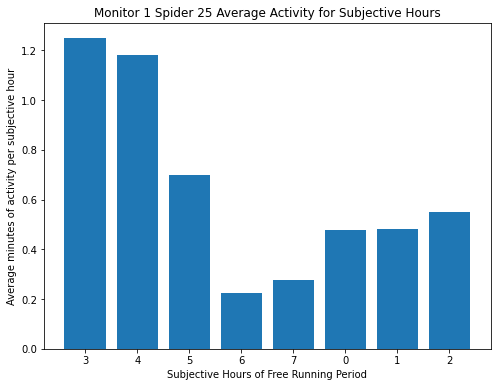

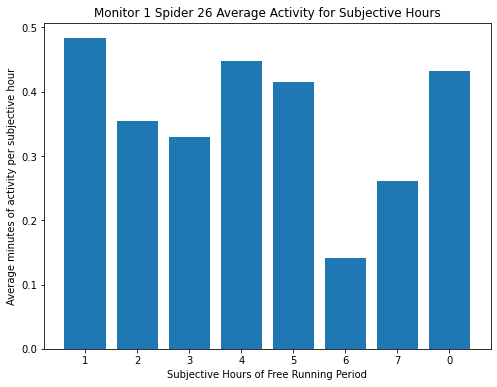

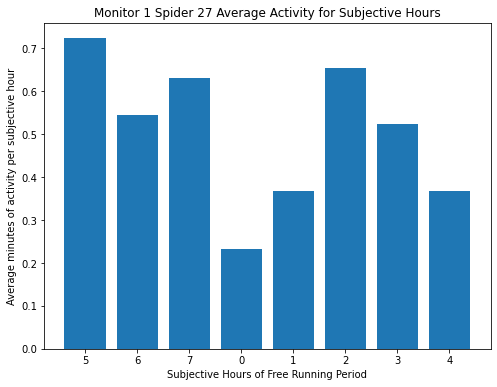

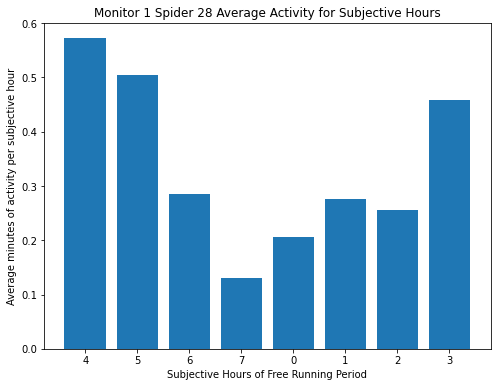

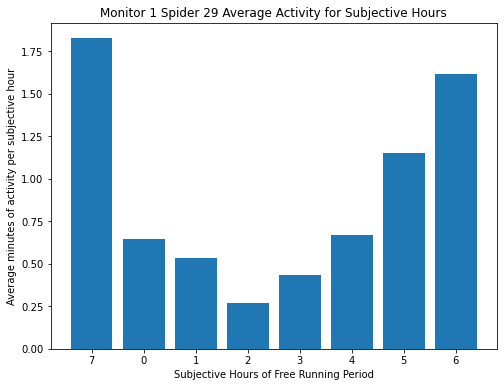

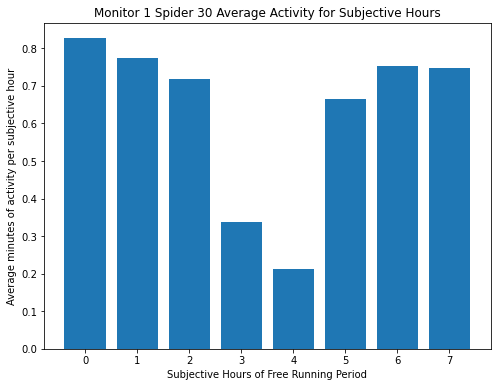

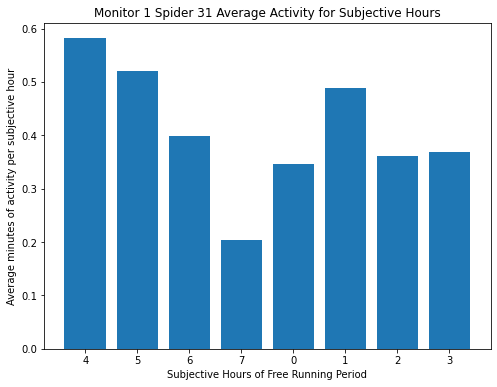

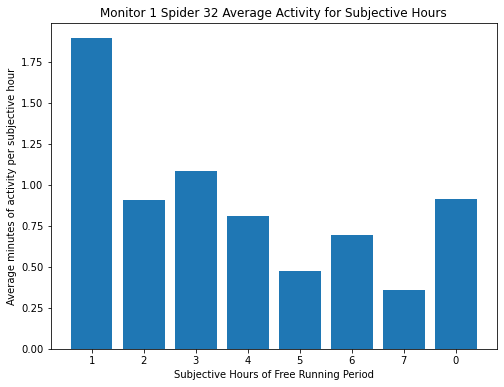

In [16]:
average_subjective_activity_max_first_8bins(dfdark, perT)

# 12 Bins

In [17]:
def average_subjective_activity_max_first_12bins(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 12:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,12), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 12)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

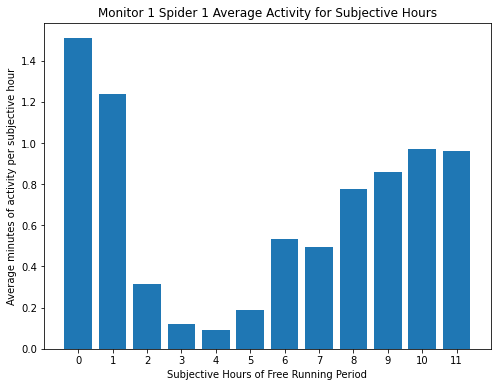

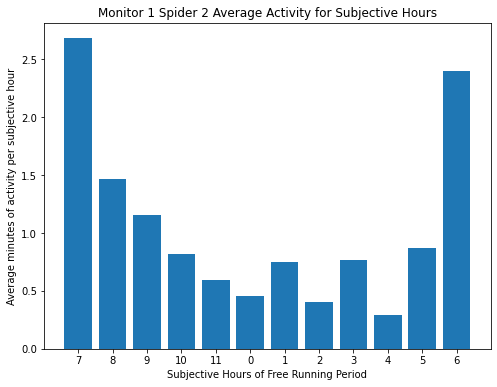

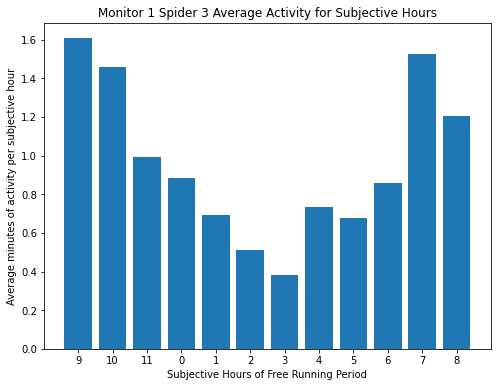

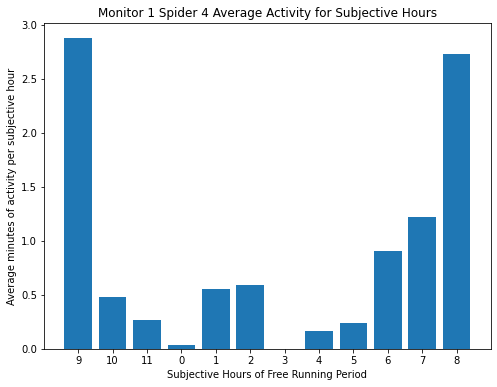

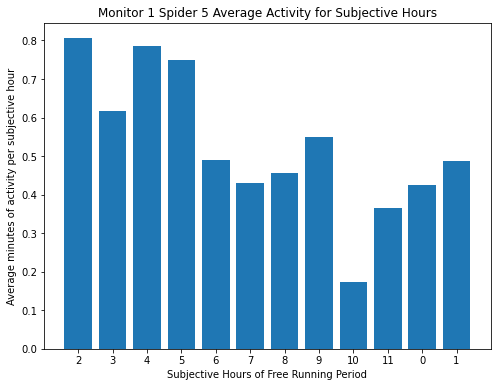

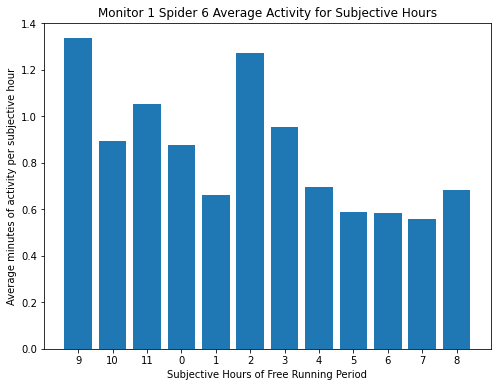

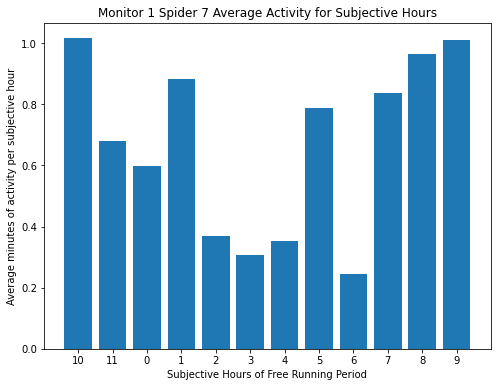

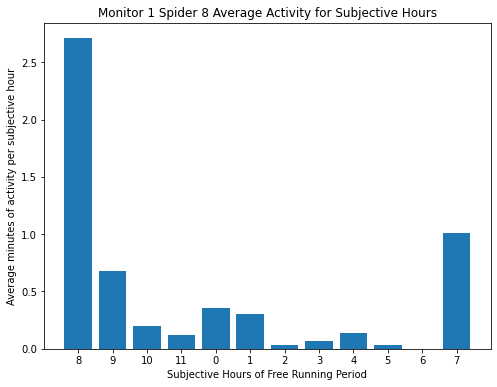

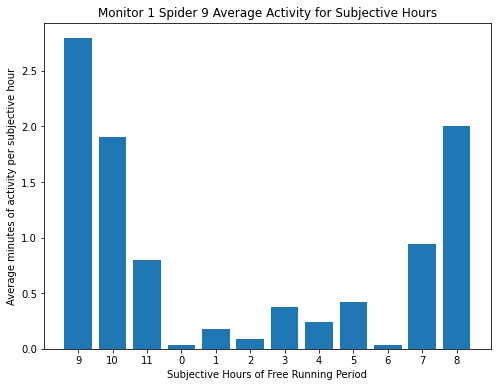

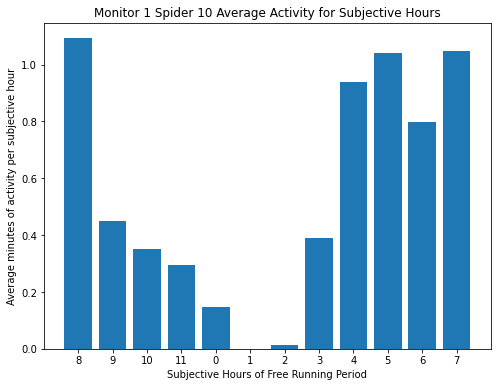

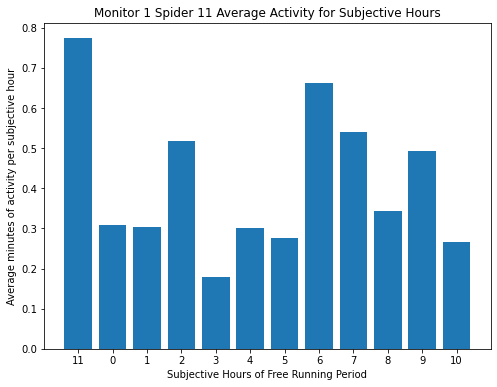

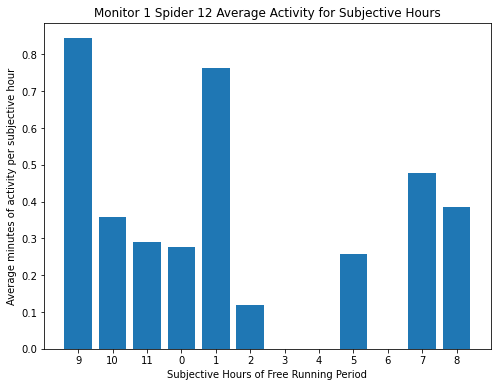

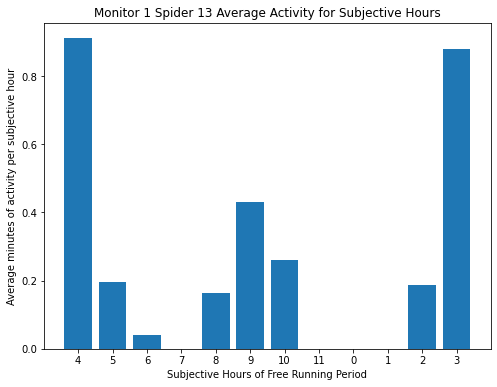

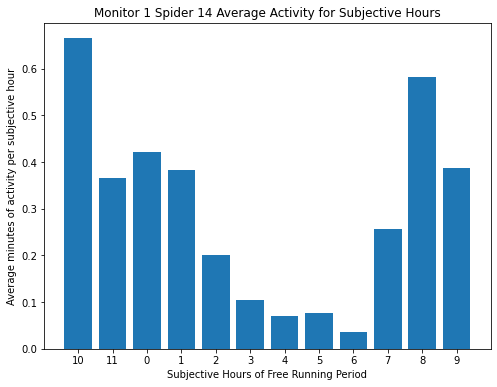

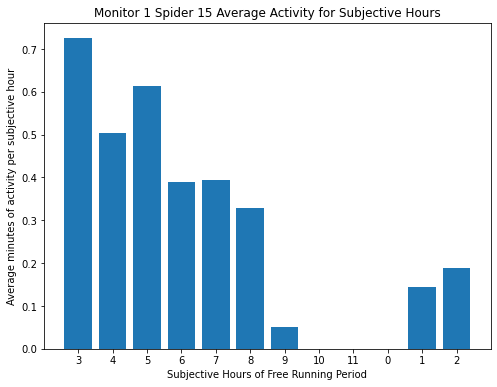

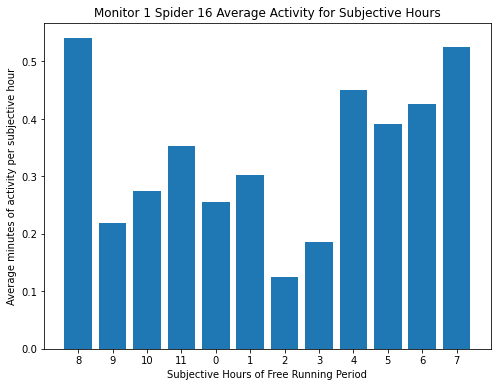

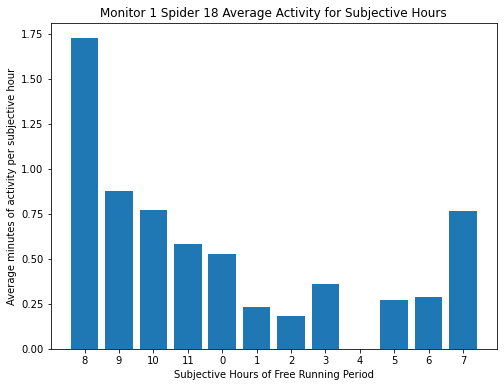

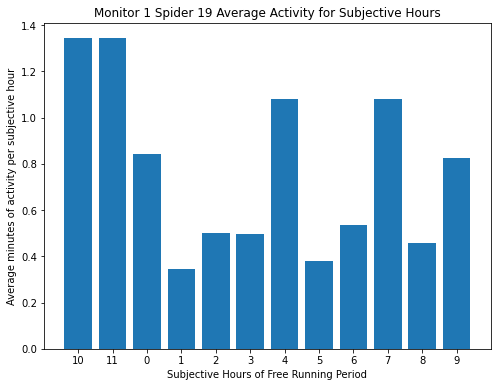

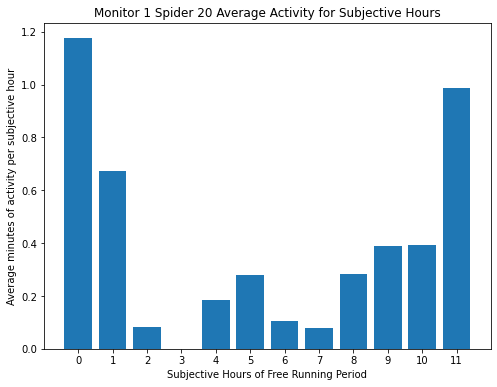

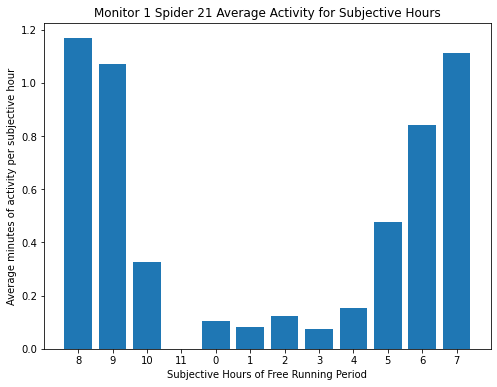

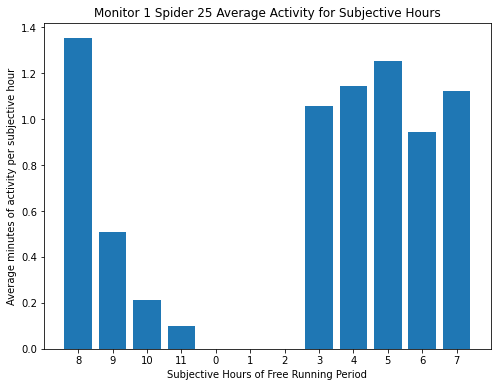

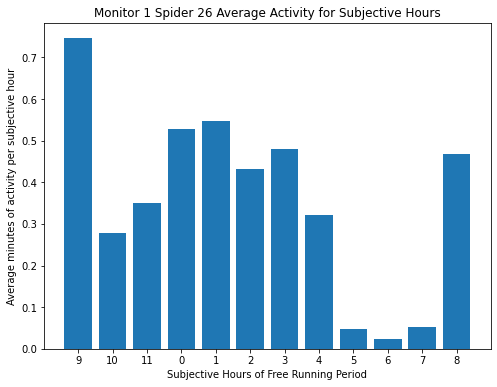

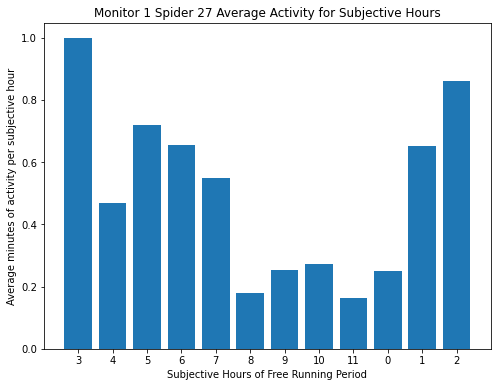

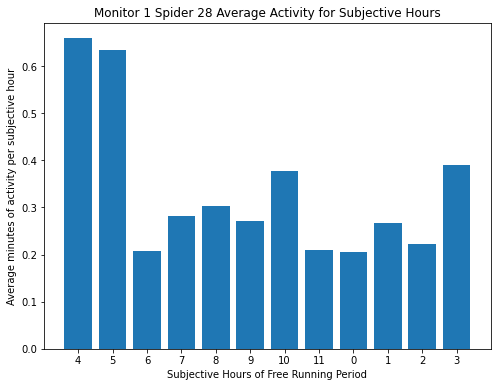

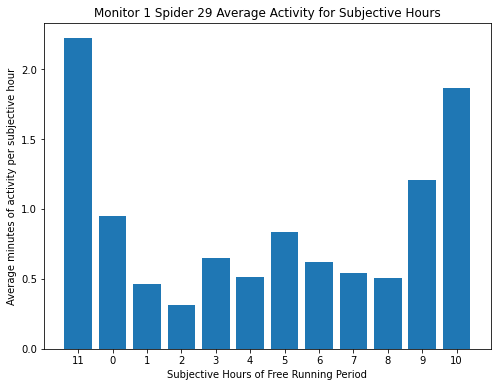

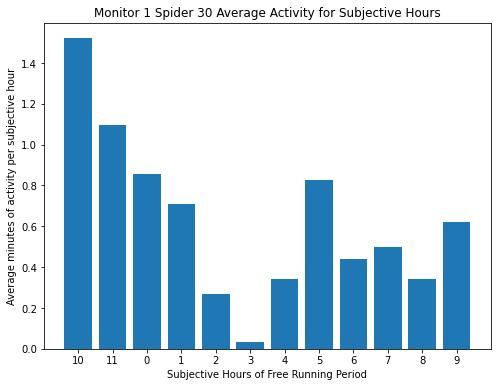

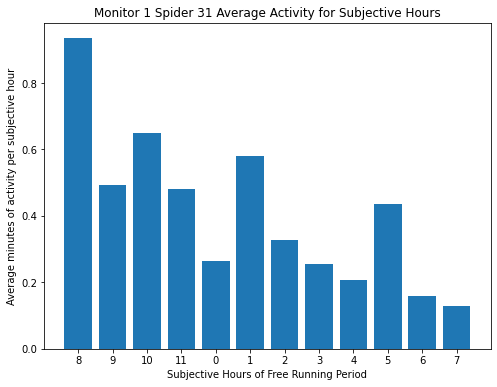

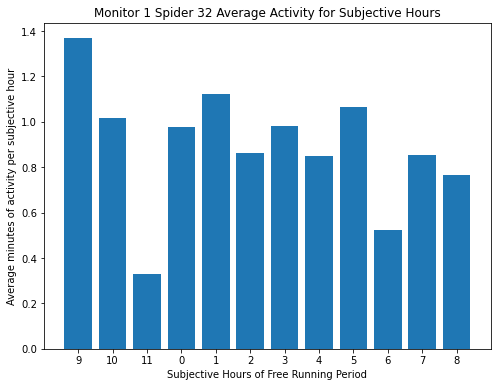

In [18]:
average_subjective_activity_max_first_12bins(dfdark, perT)

# 36 Bins

In [19]:
def average_subjective_activity_max_first_36bins(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 36:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,36), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 36)) + list(range(0, max_avg_hour))
        #print(tick_labels)
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

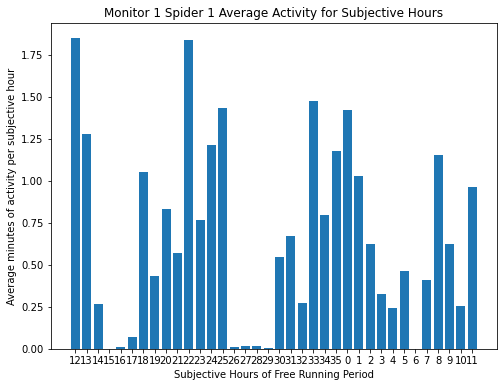

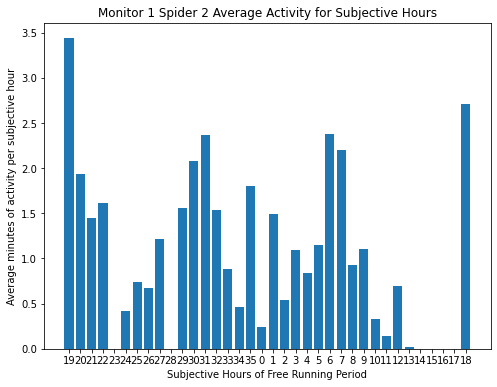

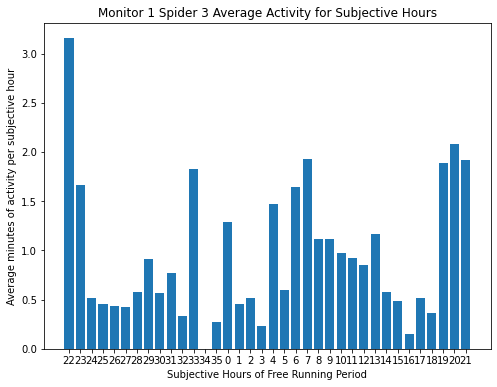

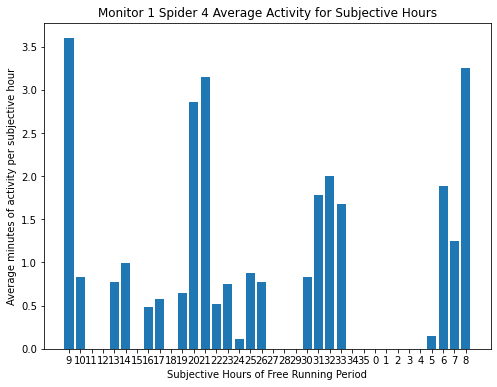

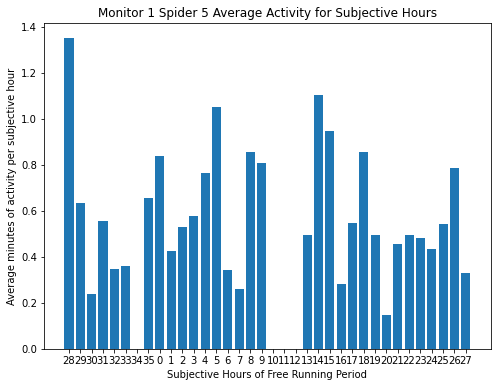

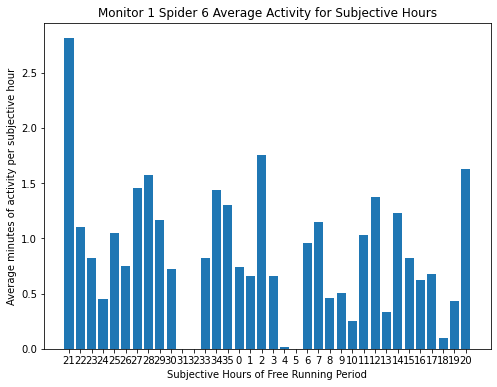

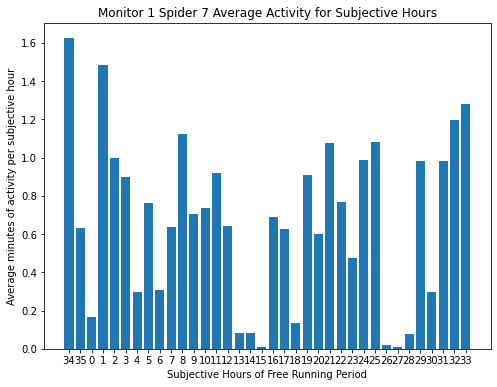

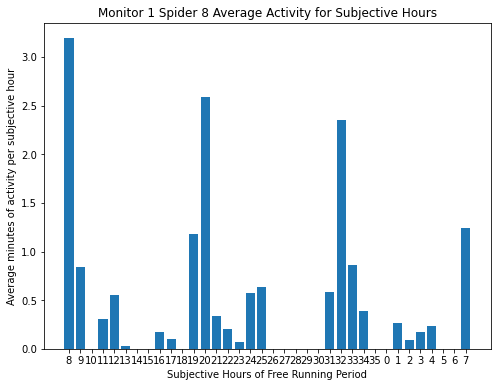

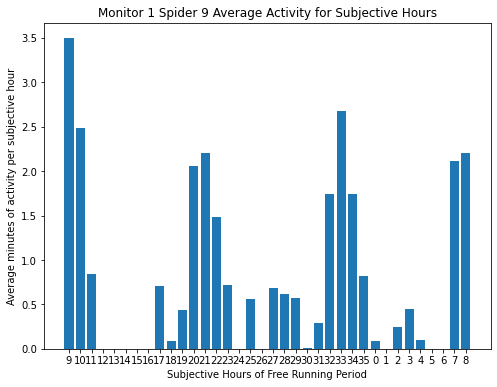

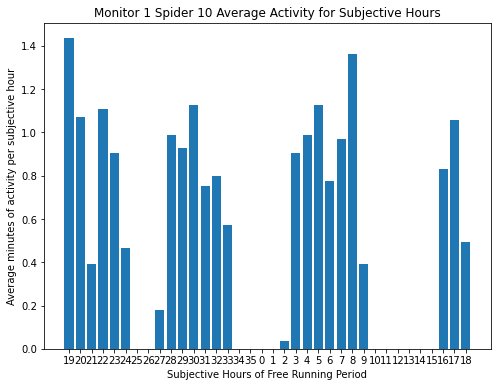

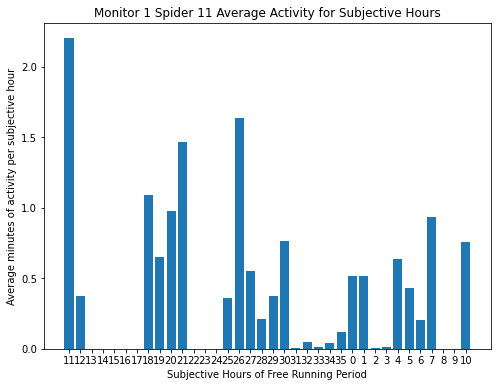

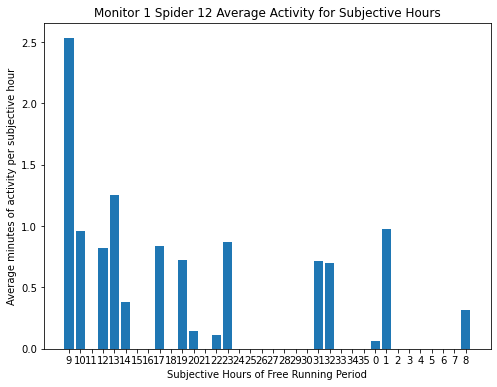

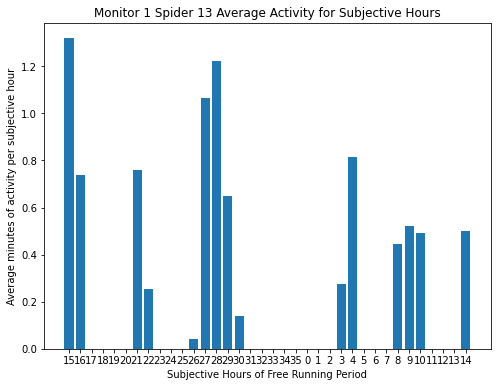

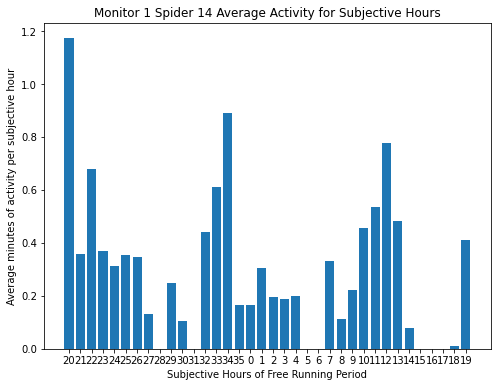

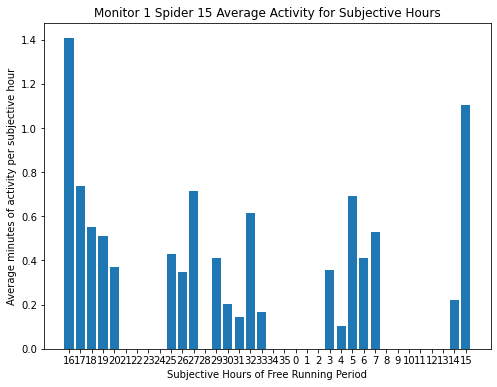

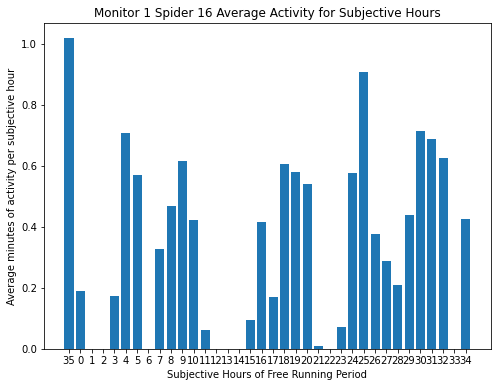

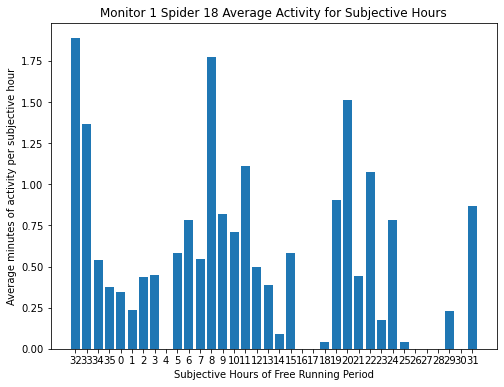

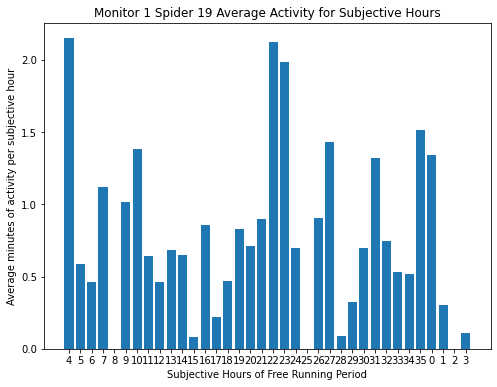

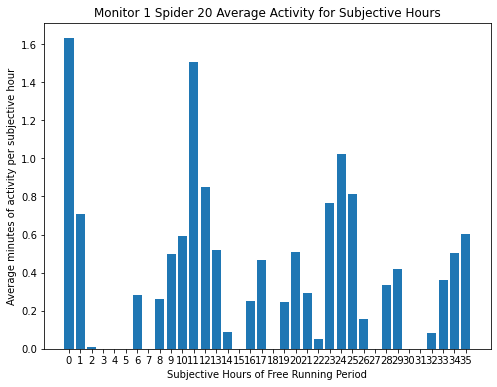

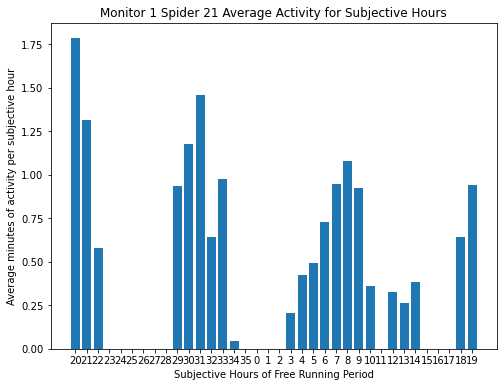

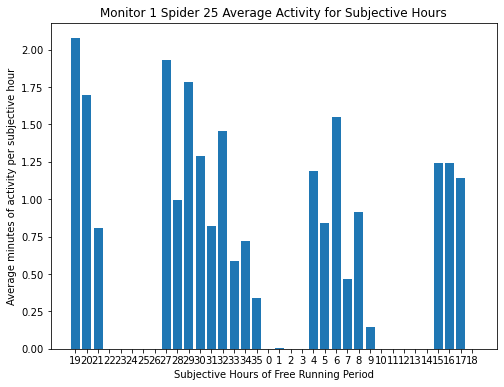

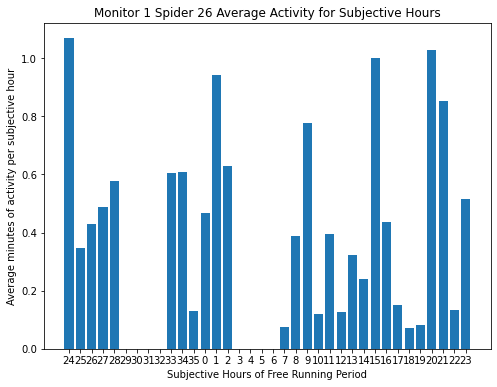

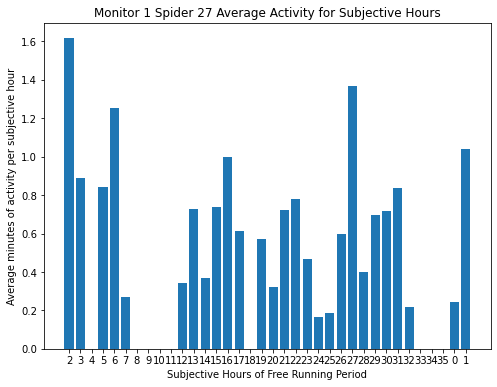

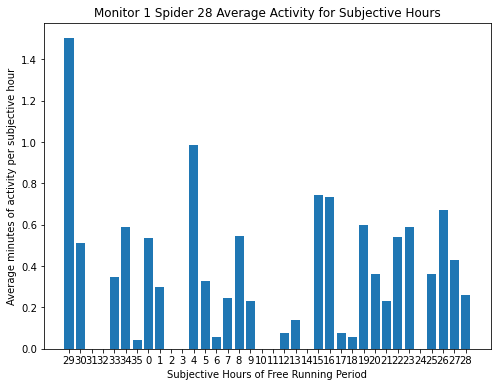

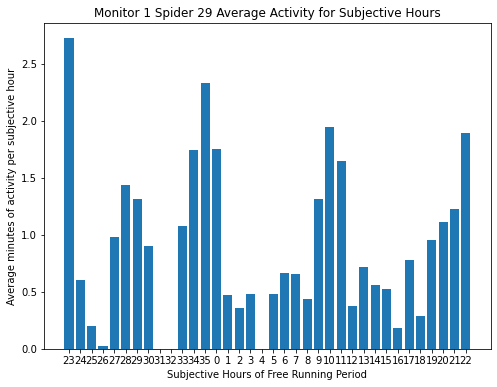

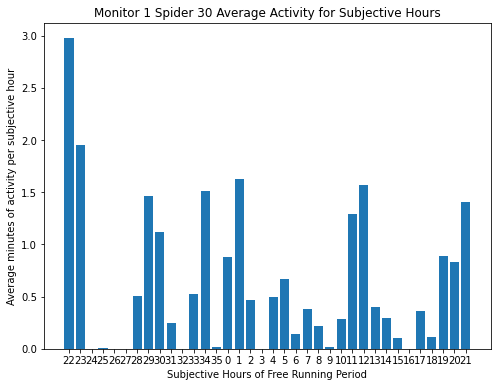

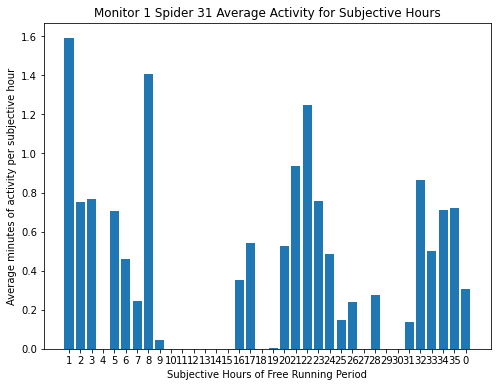

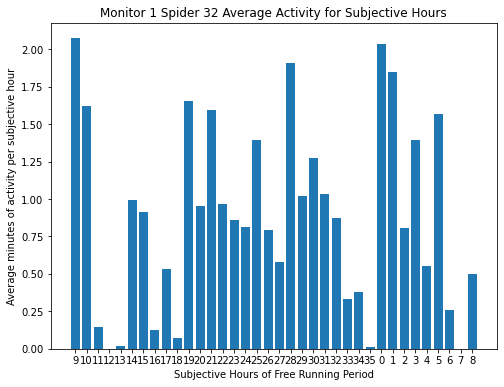

In [20]:
average_subjective_activity_max_first_36bins(dfdark, perT)

# 30 Bins

In [21]:
def average_subjective_activity_max_first_30bins(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 30:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,30), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 30)) + list(range(0, max_avg_hour))
        #print(tick_labels)
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

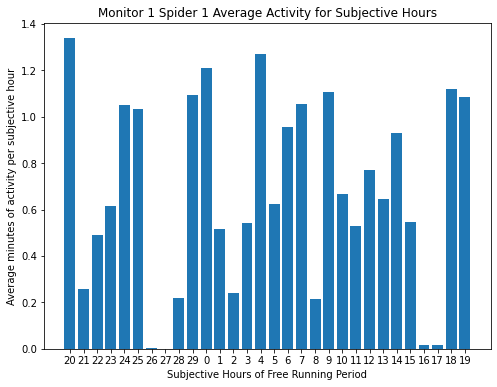

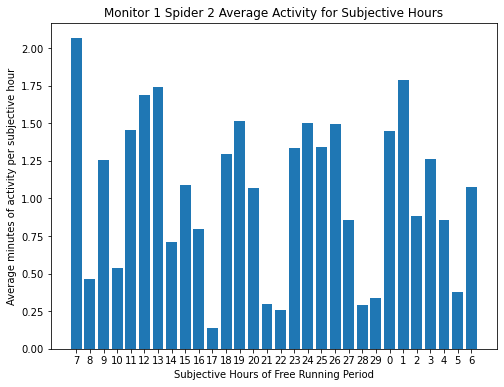

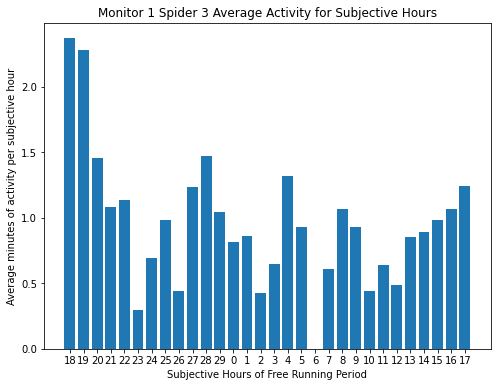

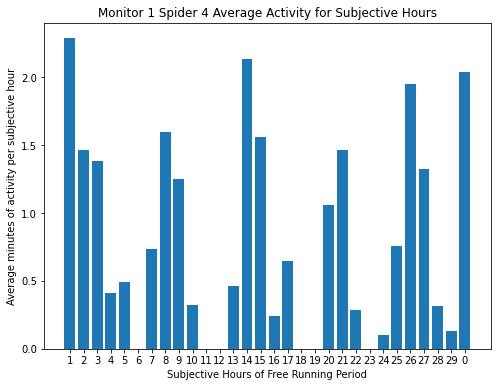

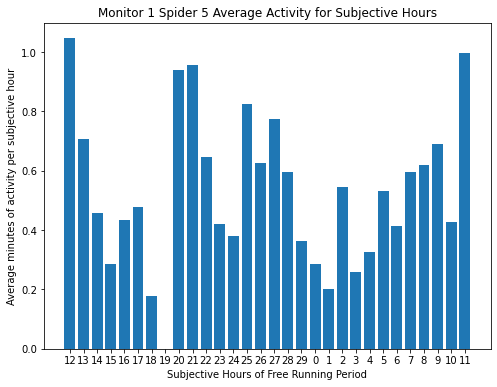

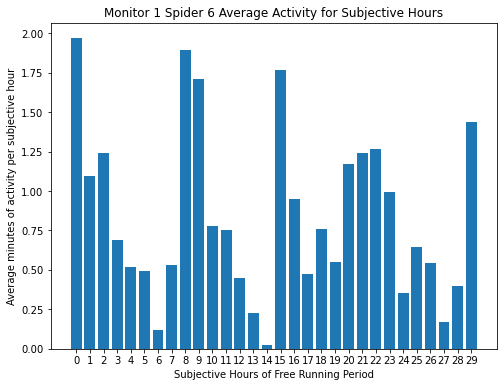

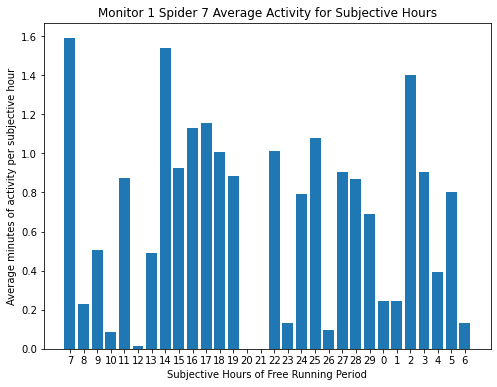

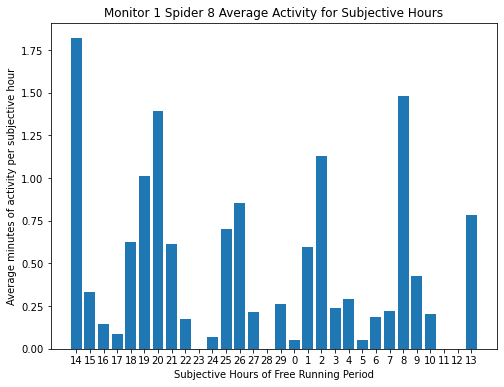

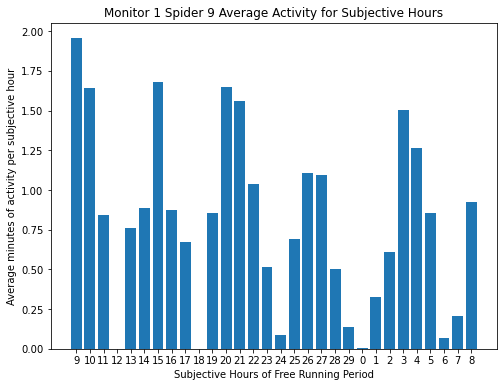

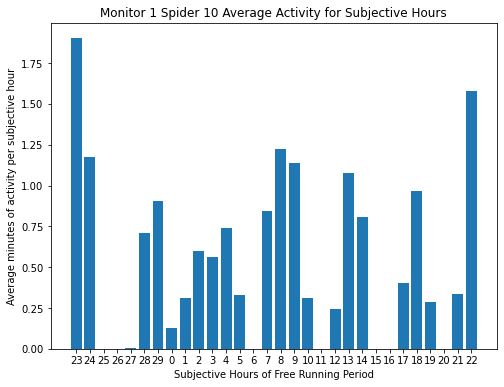

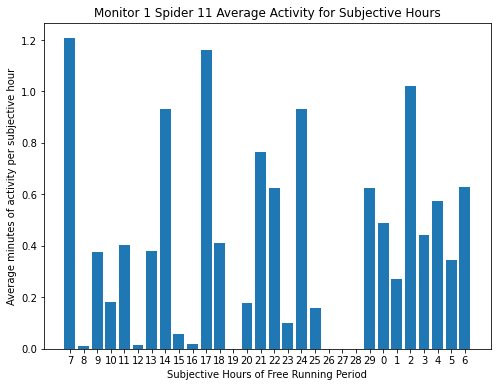

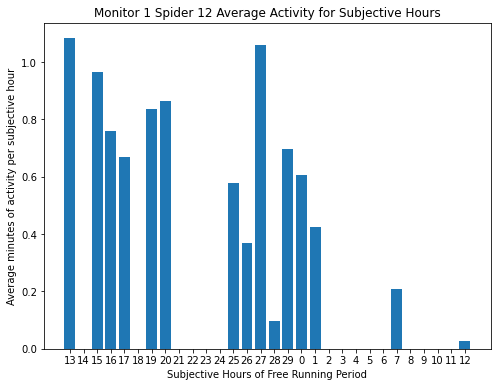

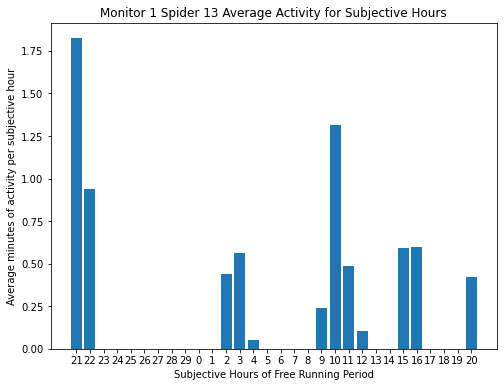

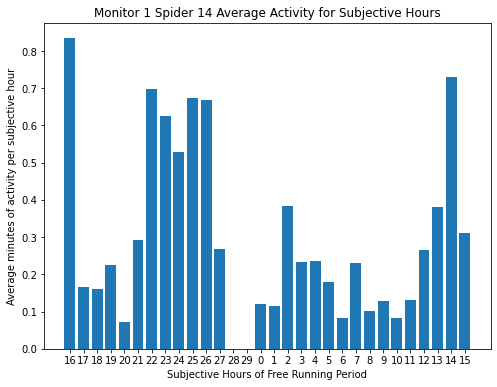

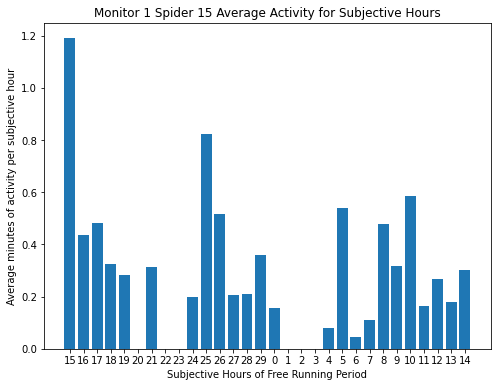

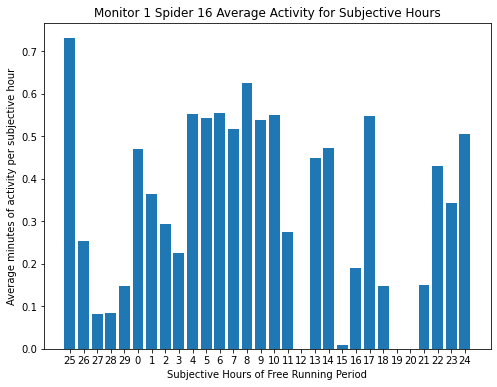

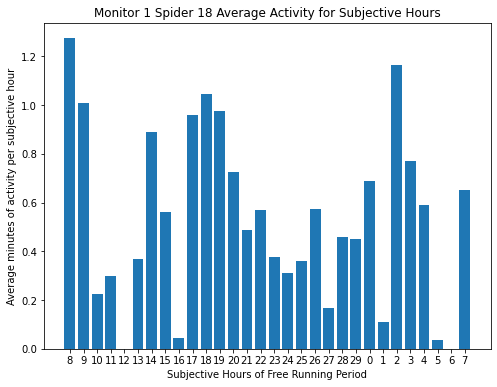

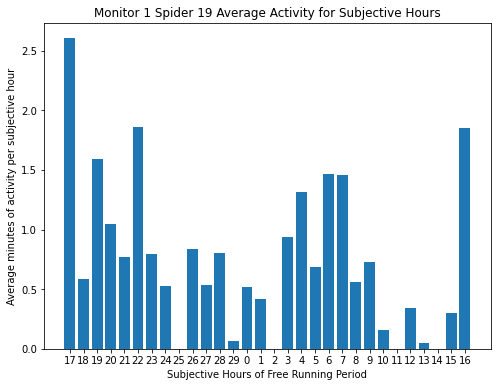

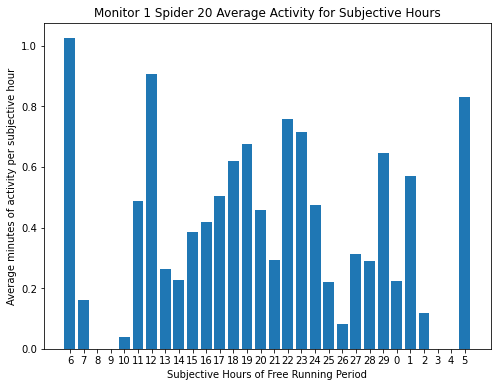

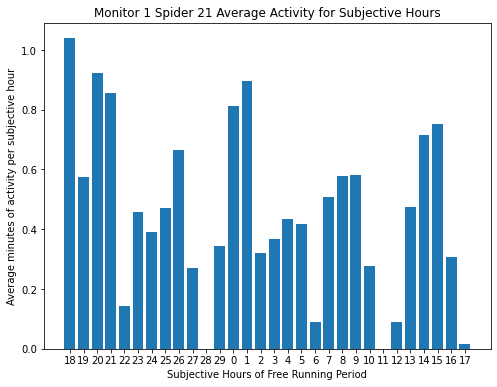

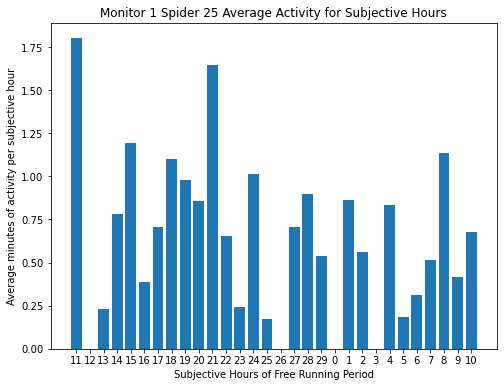

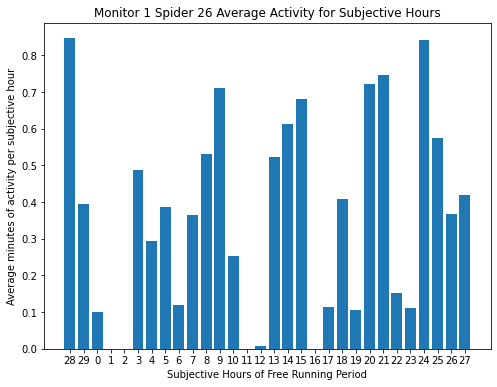

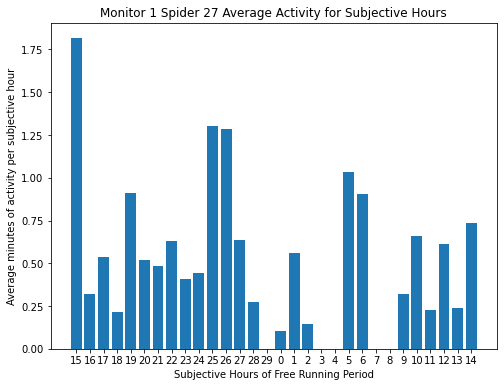

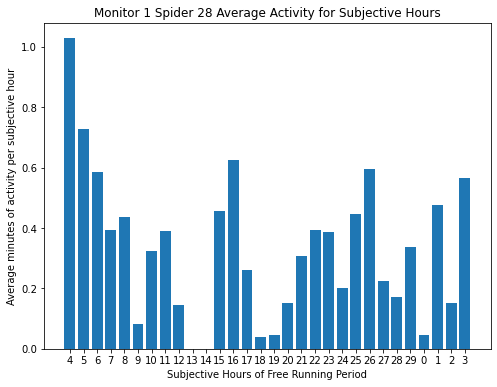

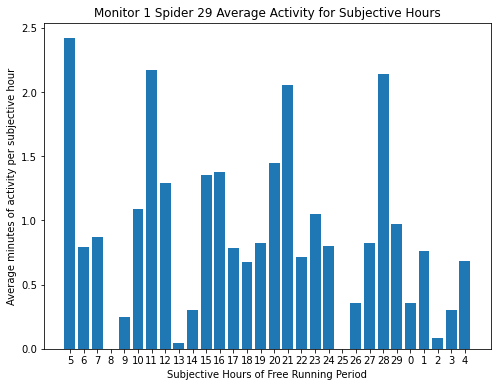

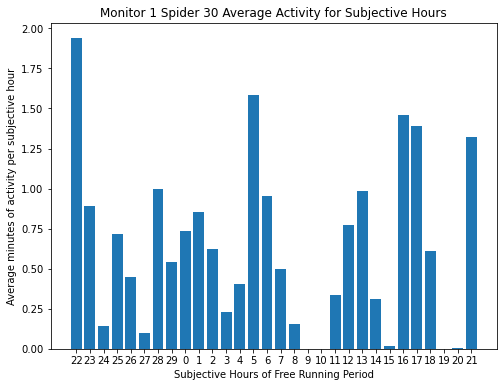

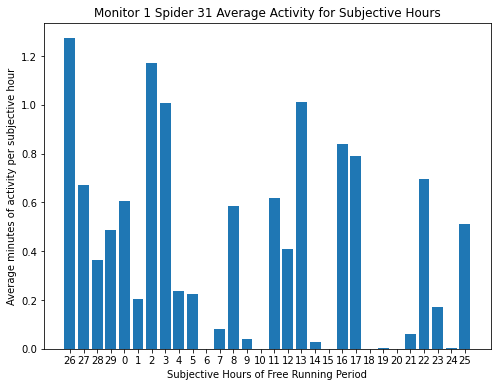

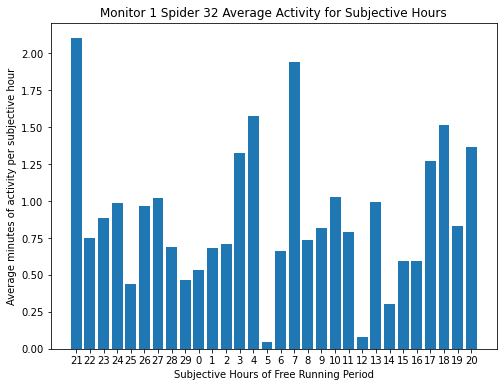

In [22]:
average_subjective_activity_max_first_30bins(dfdark, perT)

# LD Plots

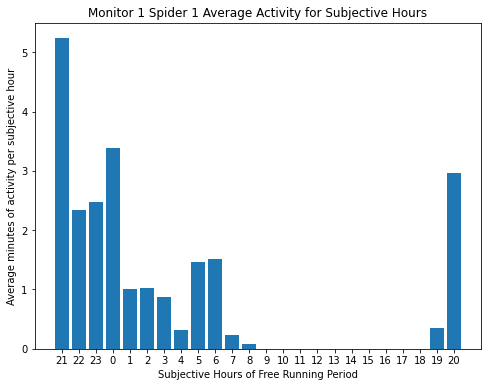

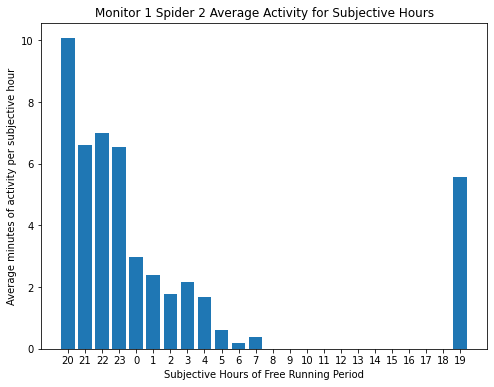

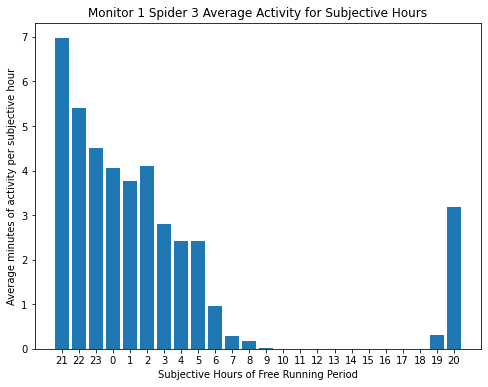

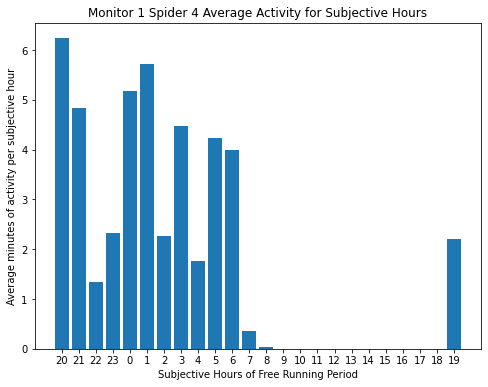

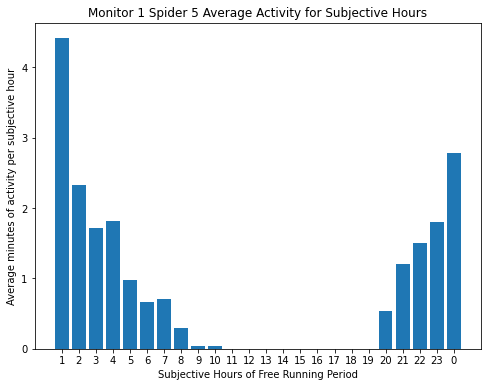

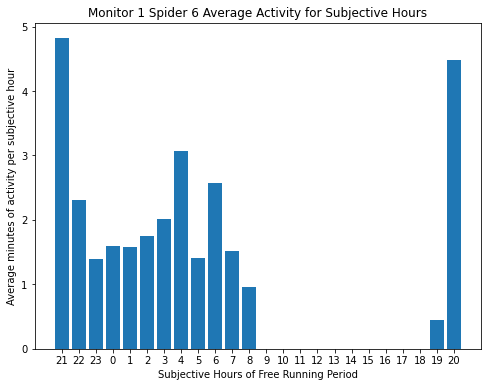

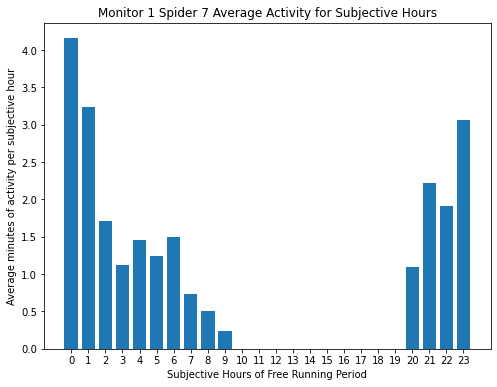

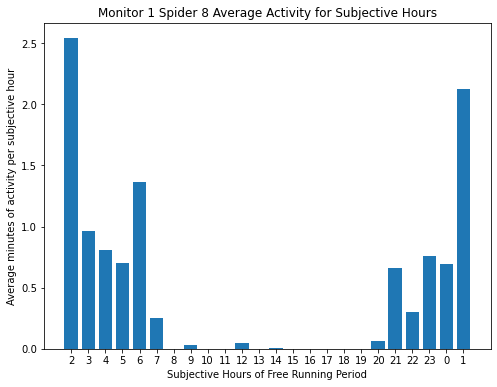

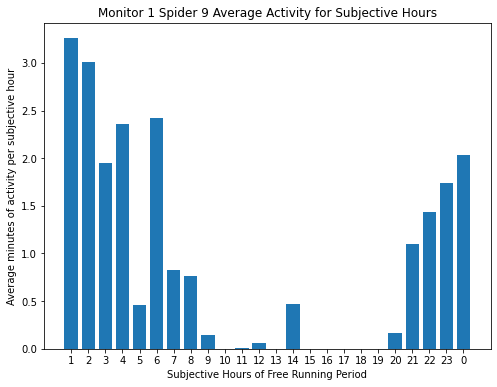

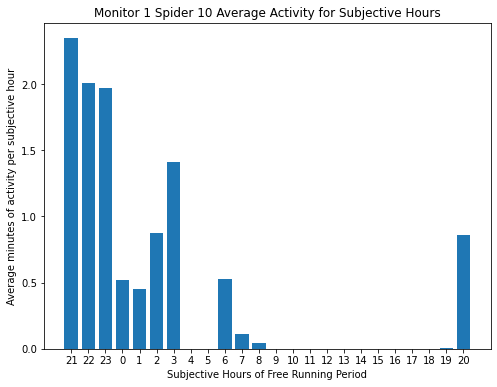

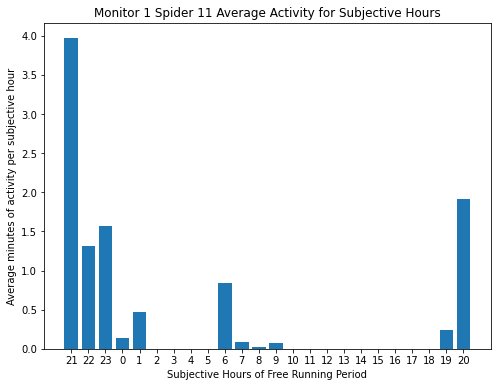

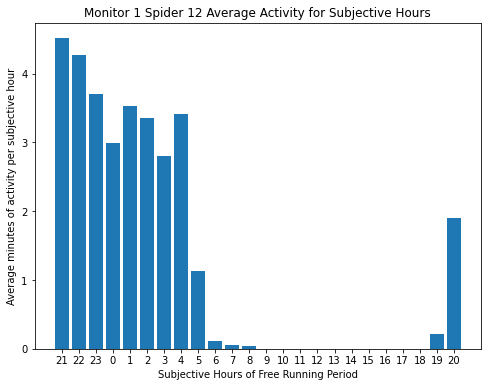

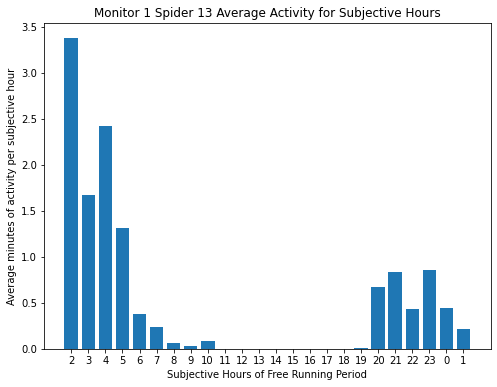

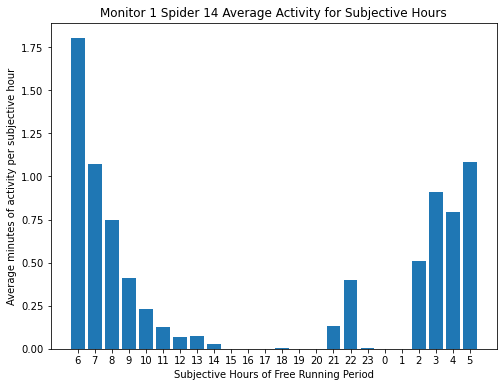

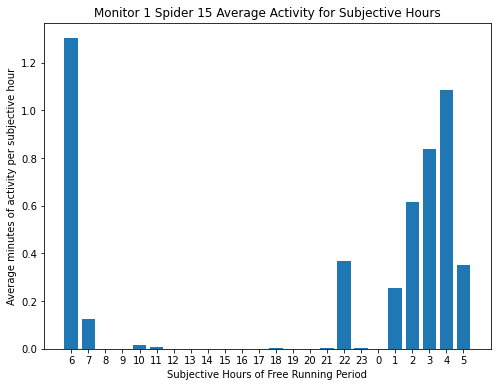

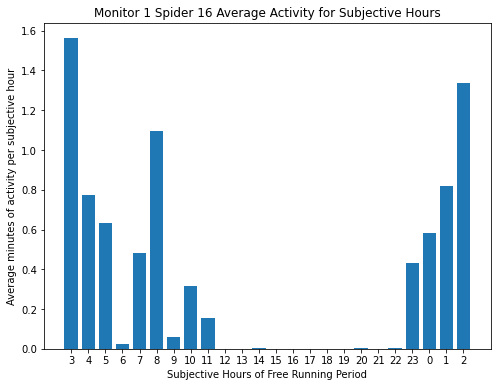

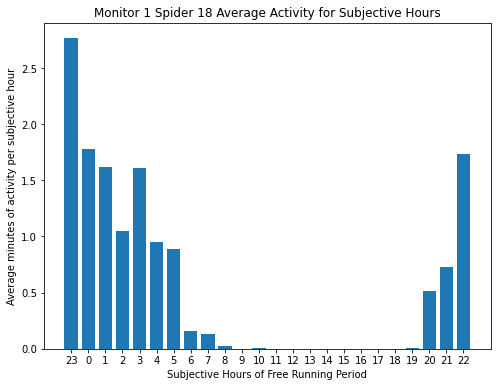

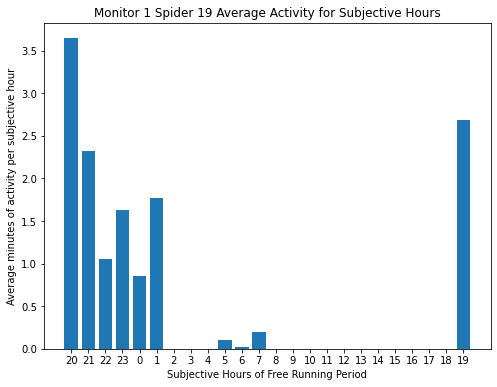

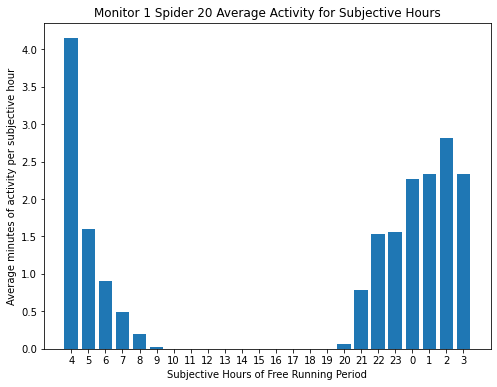

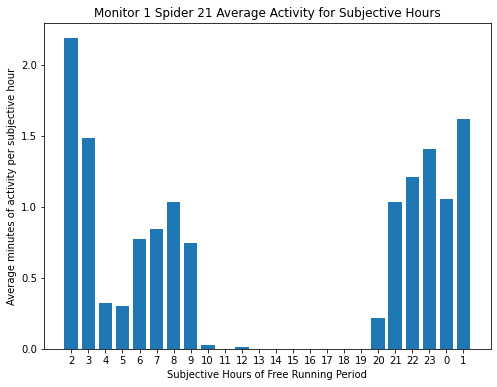

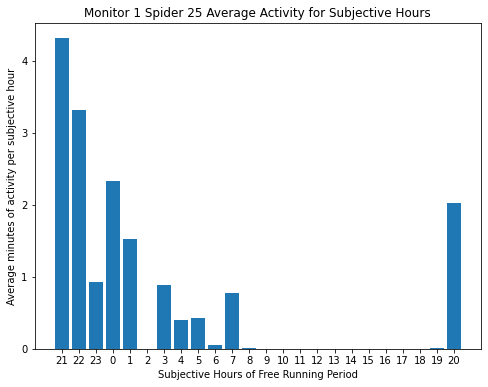

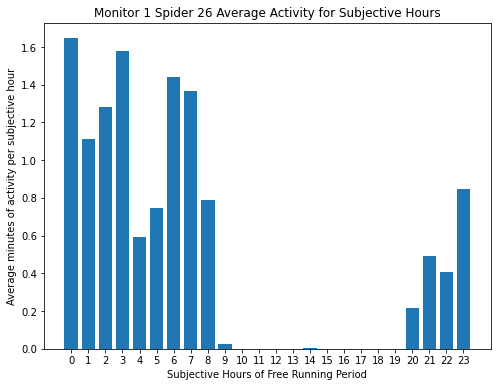

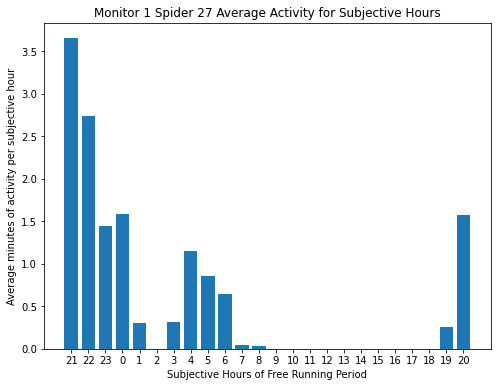

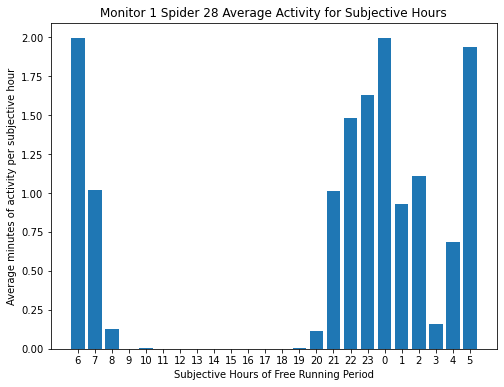

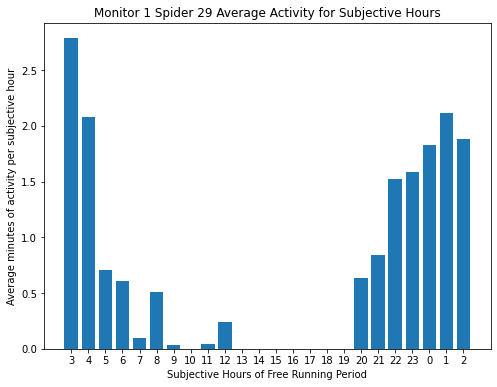

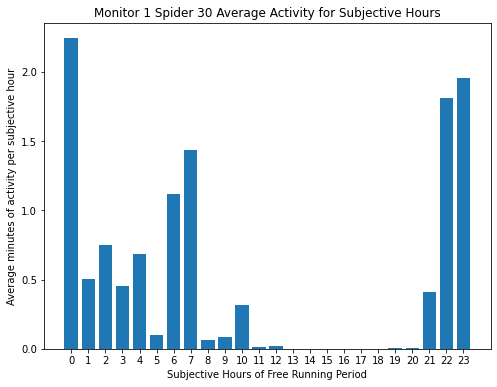

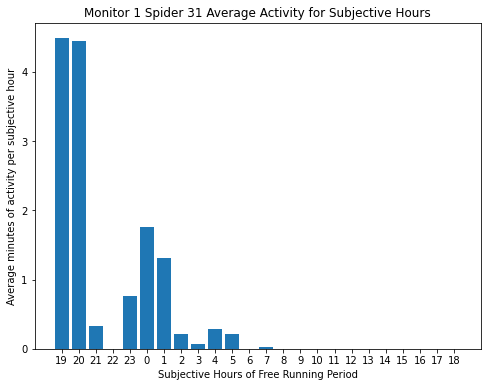

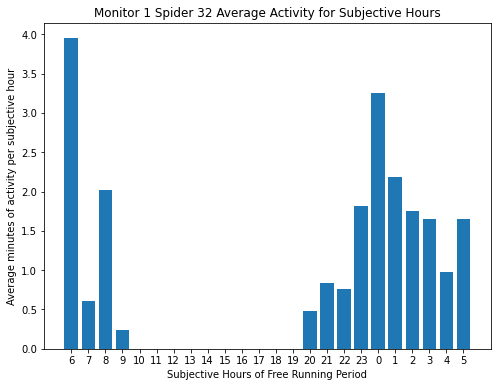

IndexError: index 28 is out of bounds for axis 0 with size 28

In [23]:
average_subjective_activity_max_first(dflight, per_lightT)

In [ ]:
average_subjective_activity_min_first(dflight, per_lightT)

# Last 4 Days

In [24]:
df4days = pd.read_csv('Metazygia monitor 1_DD-LAST 4 DAYS.csv', index_col=0)
df4days = df4days.drop(columns = 'lights')
per4 = pd.read_csv('Metazygia monitor 1_DD-LAST 4 DAYS_Stats.csv', index_col=0)
per4 = per4.drop(columns = ['Amplitude', 'p value'])
per4T = per4.T
display(per4T)
display(df4days)

Spider  Monitor 1 Spider 1  Monitor 1 Spider 2  Monitor 1 Spider 3  \
Period            22.01115           21.316001           24.453386   

Spider  Monitor 1 Spider 4  Monitor 1 Spider 5  Monitor 1 Spider 6  \
Period           24.676897           21.316001           22.283665   

Spider  Monitor 1 Spider 7  Monitor 1 Spider 8  Monitor 1 Spider 9  \
Period           18.760847           23.242881           23.806503   

Spider  Monitor 1 Spider 10  ...  Monitor 1 Spider 20  Monitor 1 Spider 21  \
Period            22.897901  ...            22.705329            23.495729   

Spider  Monitor 1 Spider 25  Monitor 1 Spider 26  Monitor 1 Spider 27  \
Period            24.508883            22.801209            21.400484   

Spider  Monitor 1 Spider 28  Monitor 1 Spider 29  Monitor 1 Spider 30  \
Period            18.009941            22.995418            22.610253   

Spider  Monitor 1 Spider 31  Monitor 1 Spider 32  
Period            16.421527            19.792376  

[1 rows x 28 columns]

Monitor 1 Spider 1  Monitor 1 Spider 2  \
Date_Time                                                     
2017-05-01 00:00:00                   0                   0   
2017-05-01 00:01:00                   0                   0   
2017-05-01 00:02:00                   0                   0   
2017-05-01 00:03:00                   0                   0   
2017-05-01 00:04:00                   0                   0   
...                                 ...                 ...   
2017-05-04 23:55:00                   0                   0   
2017-05-04 23:56:00                   0                   0   
2017-05-04 23:57:00                   0                   0   
2017-05-04 23:58:00                   0                   0   
2017-05-04 23:59:00                   0                   0   

                     Monitor 1 Spider 3  Monitor 1 Spider 4  \
Date_Time                                                     
2017-05-01 00:00:00                   5                  15   
2017-05-01 00:01:00                   2                   5   
2017-05-01 00:02:00                  11                   5   
2017-05-01 00:03:00                   5                   6   
2017-05-01 00:04:00                   5                   6   
...                                 ...                 ...   
2017-05-04 23:55:00                   0                   0   
2017-05-04 23:56:00                   0                   0   
2017-05-04 23:57:00                   0                   0   
2017-05-04 23:58:00                   0                   0   
2017-05-04 23:59:00                   0                   0   

                     Monitor 1 Spider 5  Monitor 1 Spider 6  \
Date_Time                                                     
2017-05-01 00:00:00                   0                   0   
2017-05-01 00:01:00                   0                   0   
2017-05-01 00:02:00                   0                   0   
2017-05-01 00:03:00                   0                   0   
2017-05-01 00:04:00                   0                   0   
...                                 ...                 ...   
2017-05-04 23:55:00                   0                   0   
2017-05-04 23:56:00                   0                   0   
2017-05-04 23:57:00                   0                   0   
2017-05-04 23:58:00                   0                   0   
2017-05-04 23:59:00                   0                   0   

                     Monitor 1 Spider 7  Monitor 1 Spider 8  \
Date_Time                                                     
2017-05-01 00:00:00                   0                   0   
2017-05-01 00:01:00                   0                   0   
2017-05-01 00:02:00                   0                   0   
2017-05-01 00:03:00                   0                   0   
2017-05-01 00:04:00                   0                   0   
...                                 ...                 ...   
2017-05-04 23:55:00                   0                   0   
2017-05-04 23:56:00                   0                   0   
2017-05-04 23:57:00                   0                   0   
2017-05-04 23:58:00                   0                   0   
2017-05-04 23:59:00                   0                   0   

                     Monitor 1 Spider 9  Monitor 1 Spider 10  ...  \
Date_Time                                                     ...   
2017-05-01 00:00:00                   0                    0  ...   
2017-05-01 00:01:00                   0                    0  ...   
2017-05-01 00:02:00                   0                    0  ...   
2017-05-01 00:03:00                   0                    0  ...   
2017-05-01 00:04:00                   0                    0  ...   
...                                 ...                  ...  ...   
2017-05-04 23:55:00                   0                    0  ...   
2017-05-04 23:56:00                   0                    0  ...   
2017-05-04 23:57:00                   0            

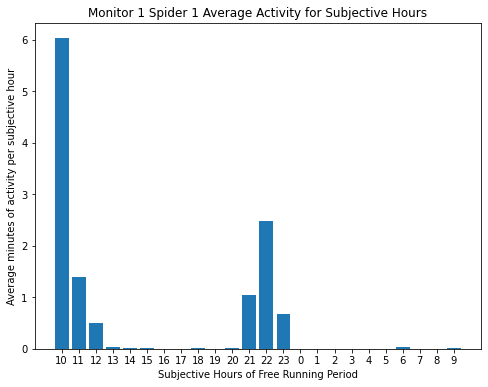

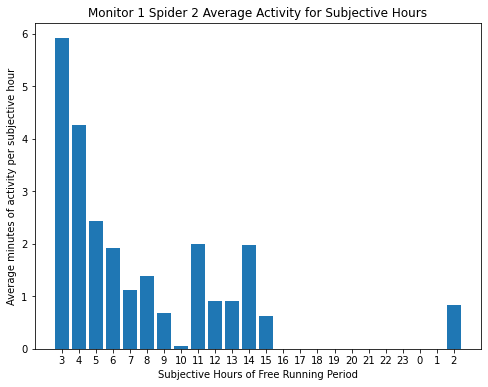

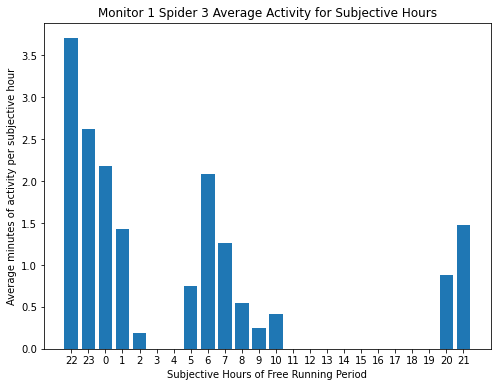

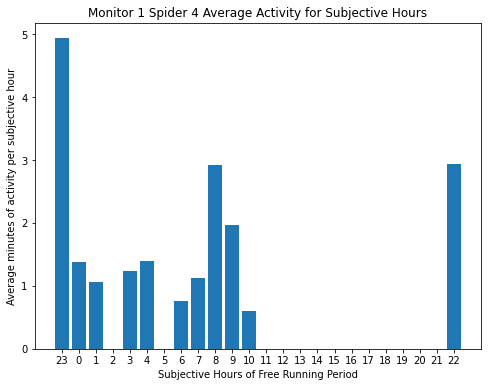

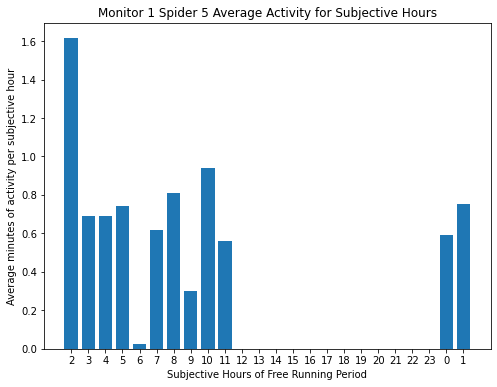

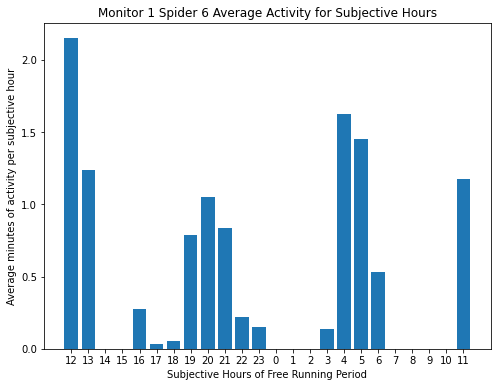

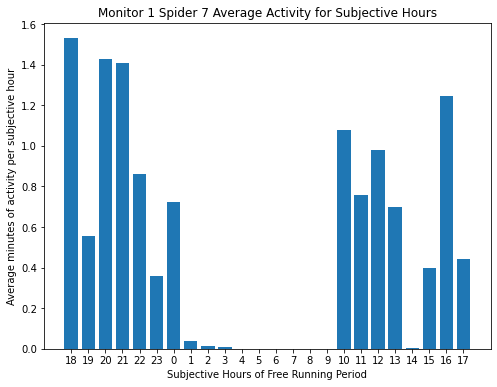

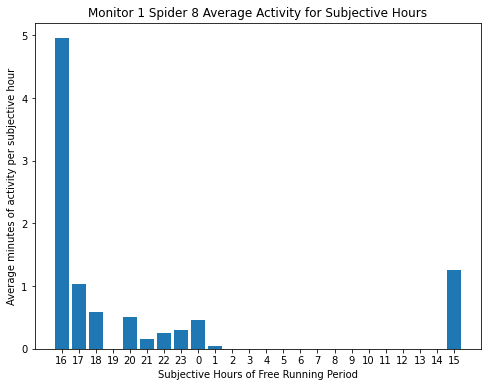

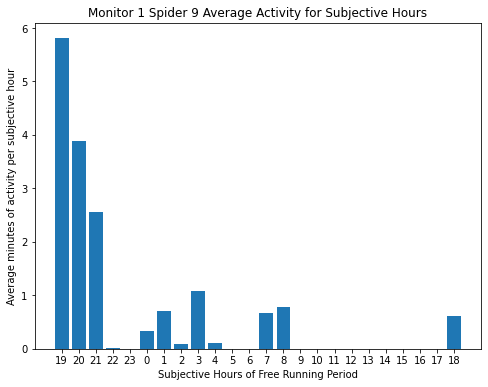

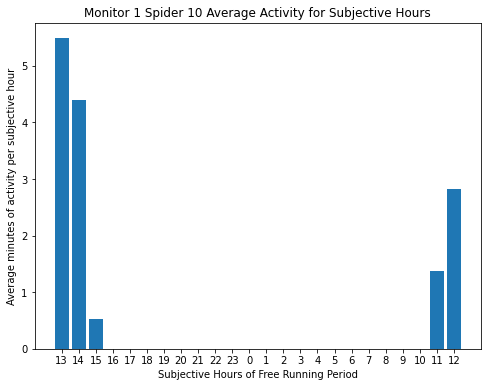

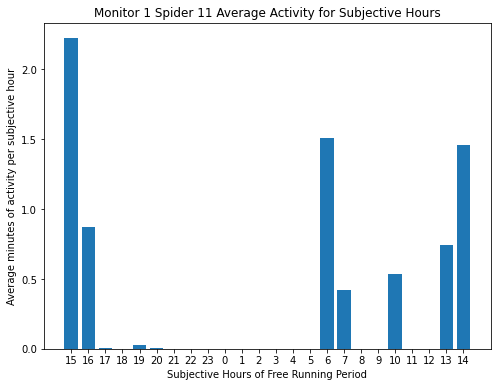

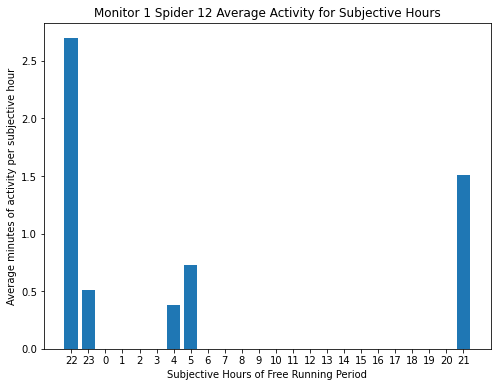

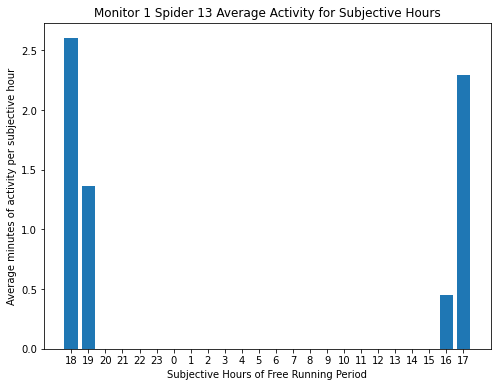

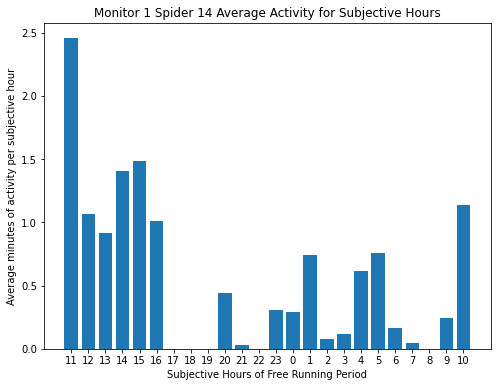

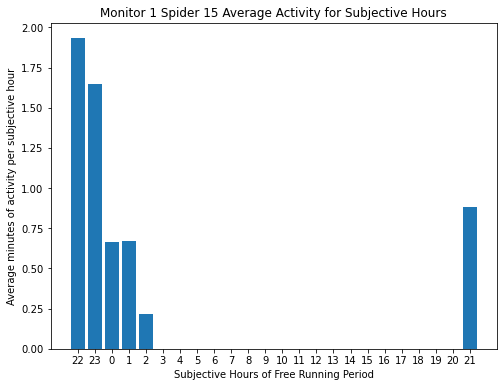

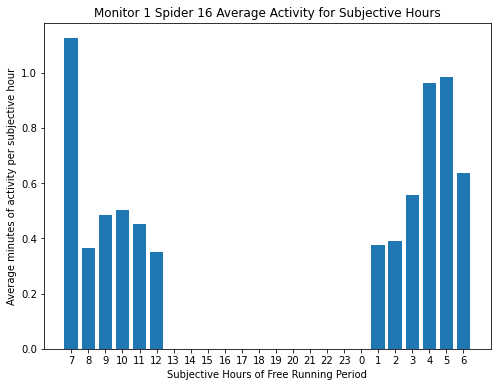

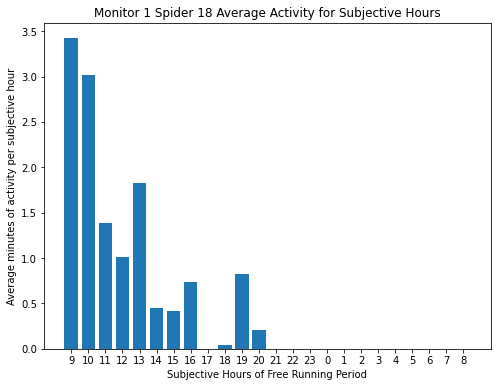

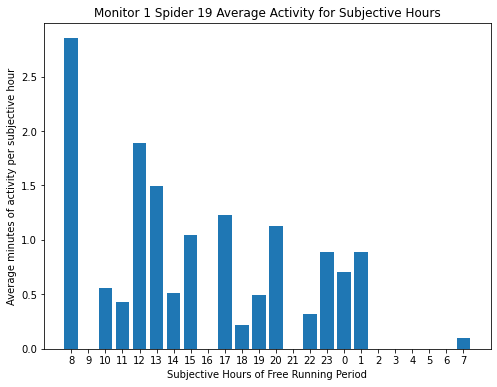

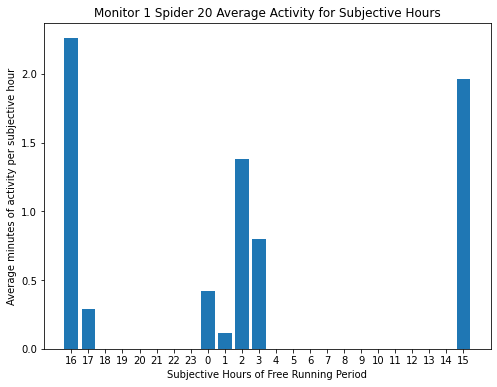

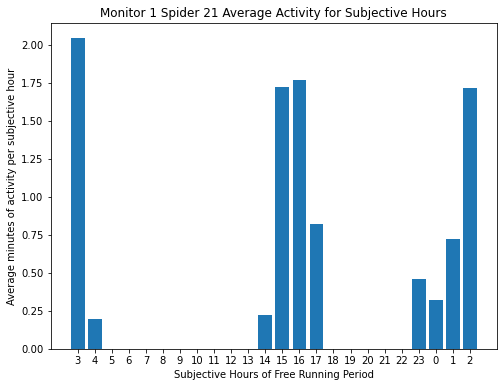

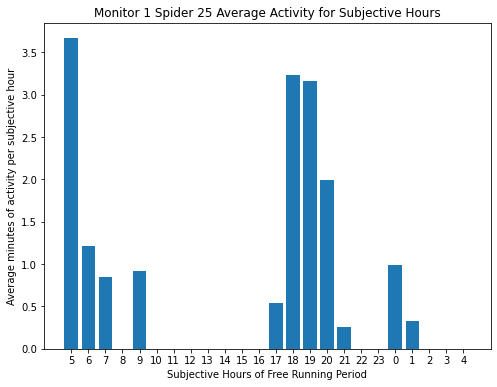

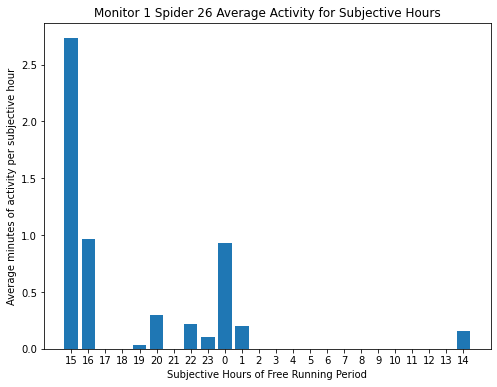

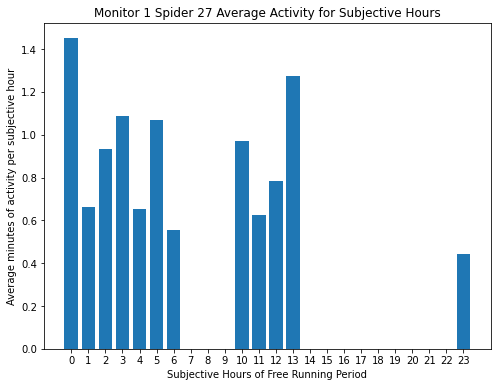

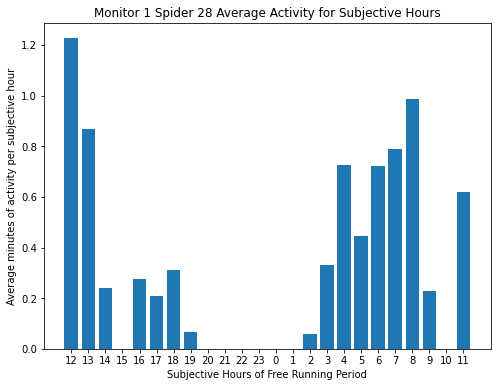

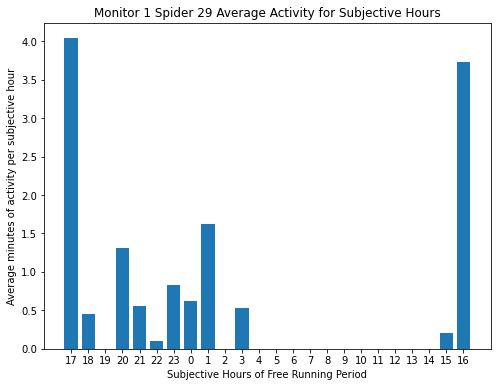

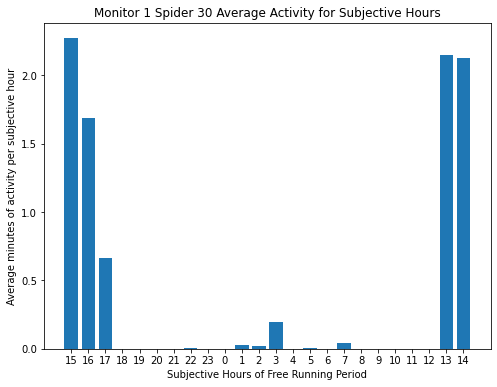

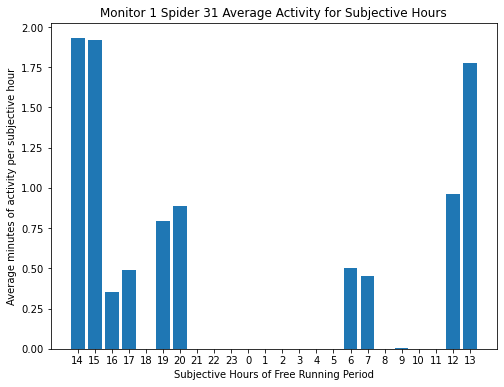

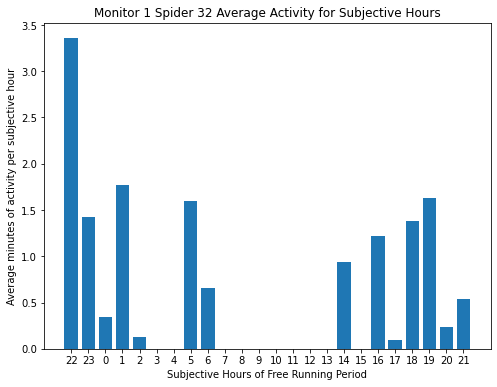

In [25]:
average_subjective_activity_max_first(df4days, per4T)

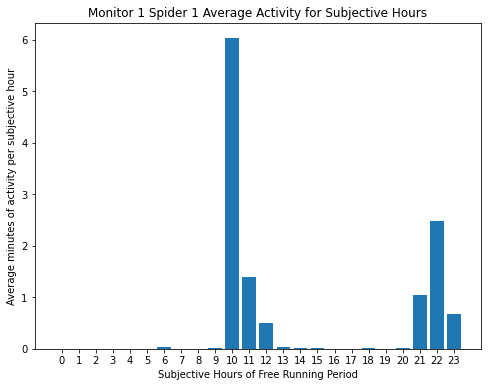

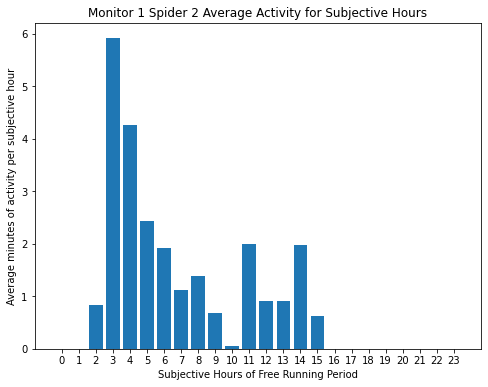

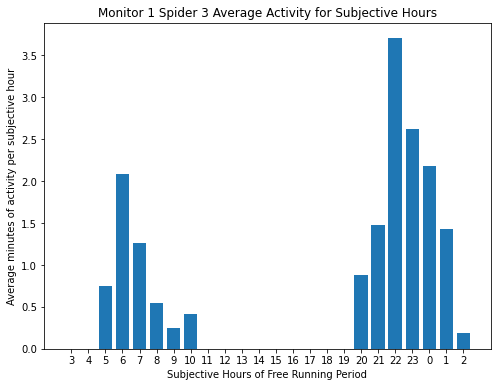

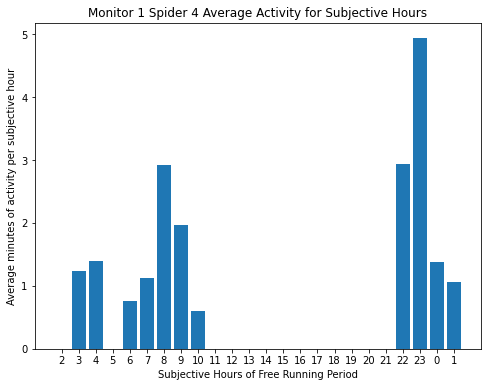

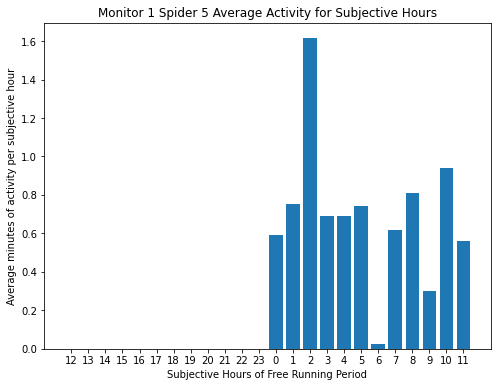

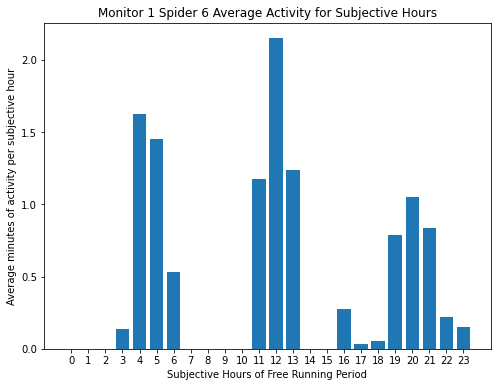

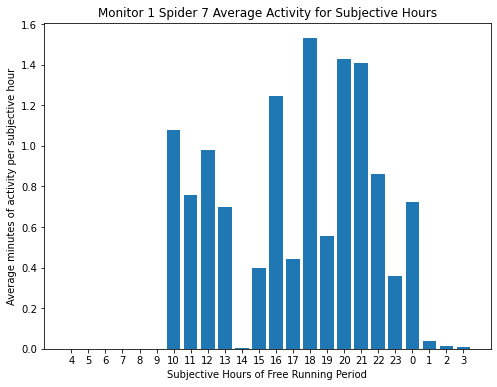

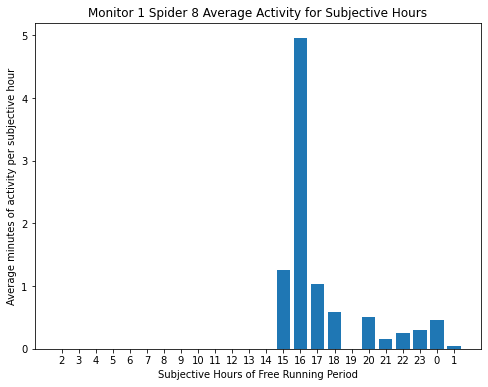

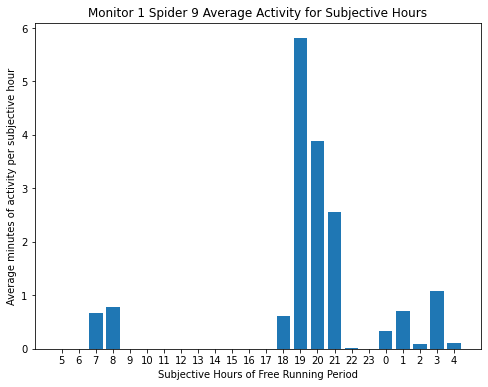

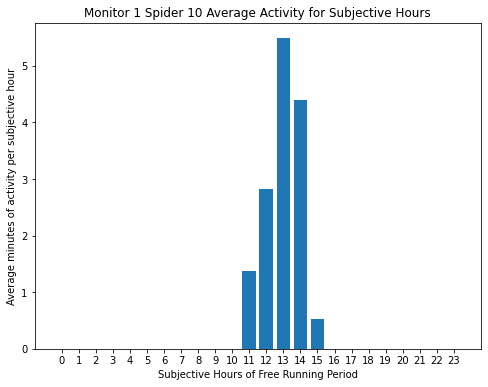

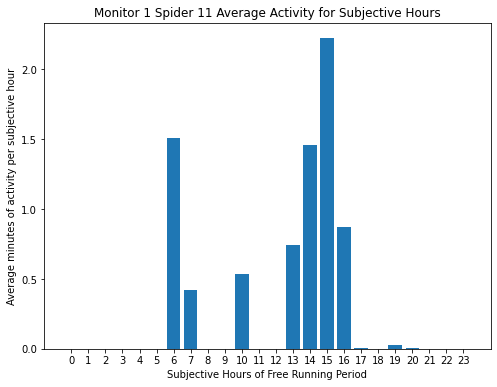

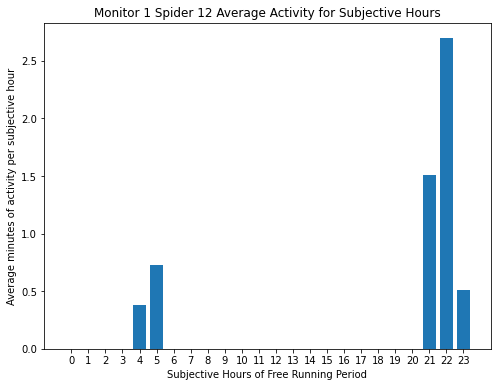

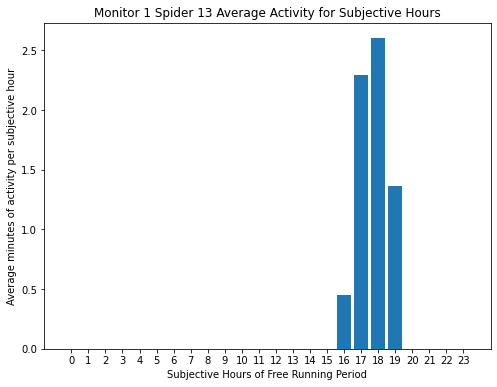

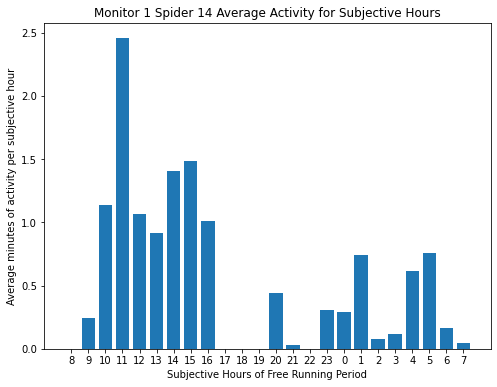

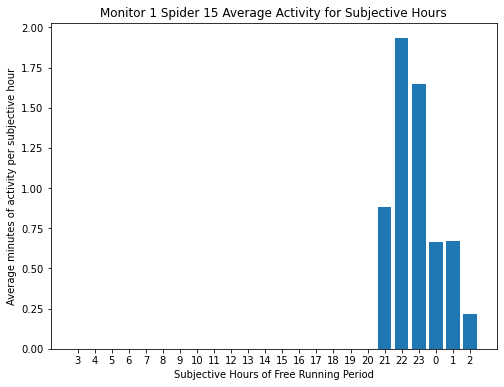

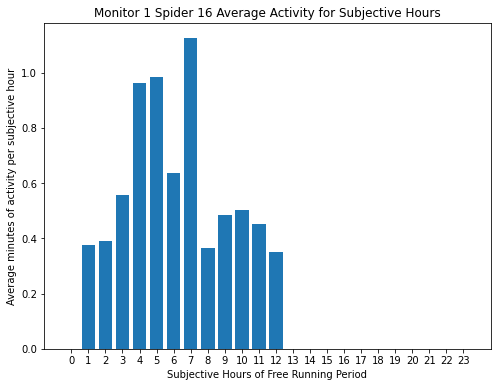

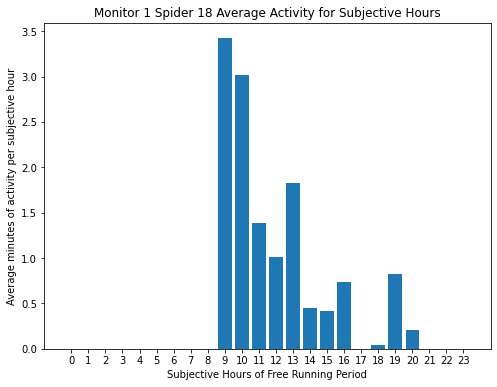

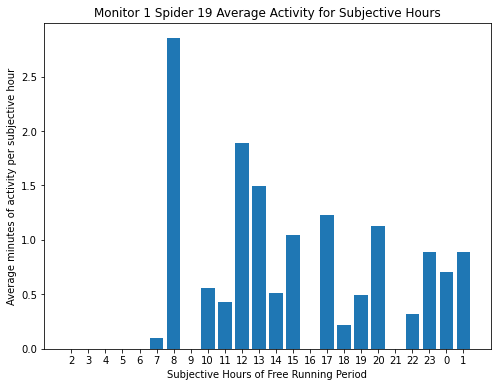

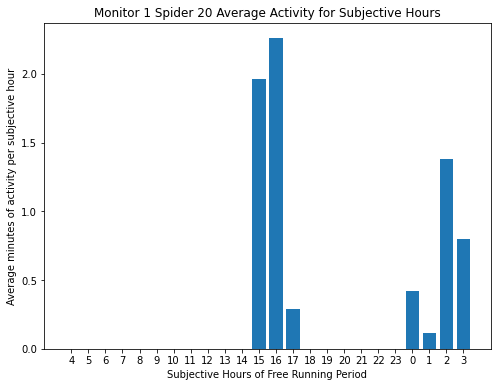

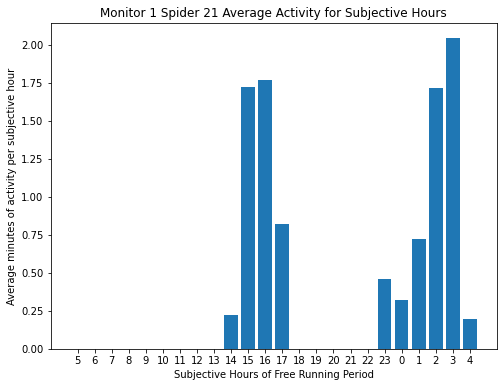

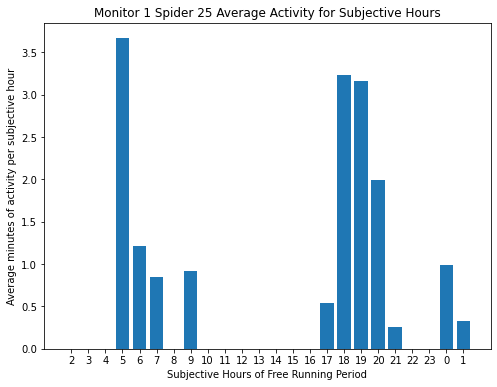

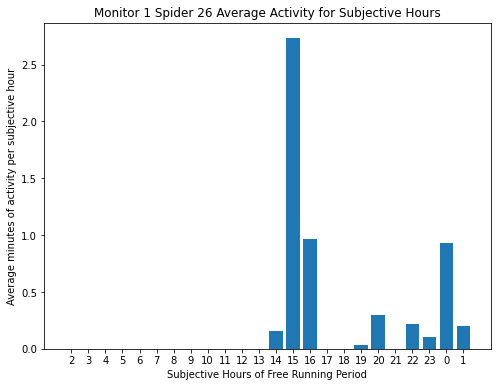

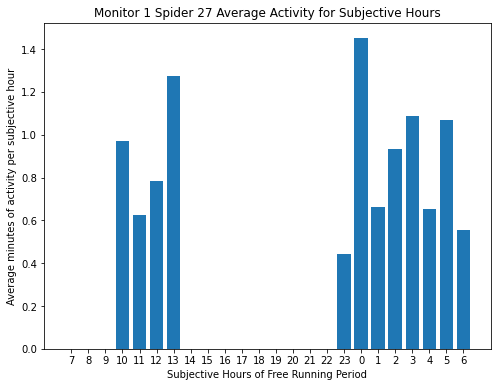

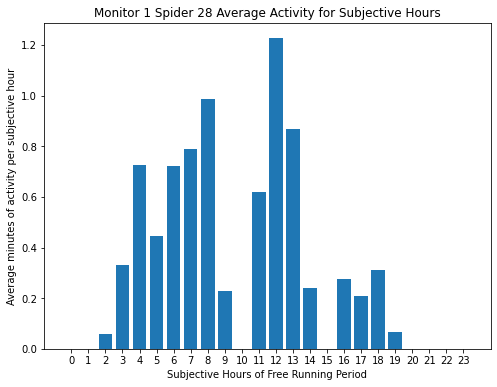

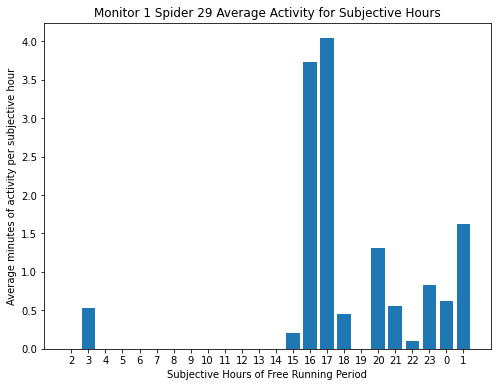

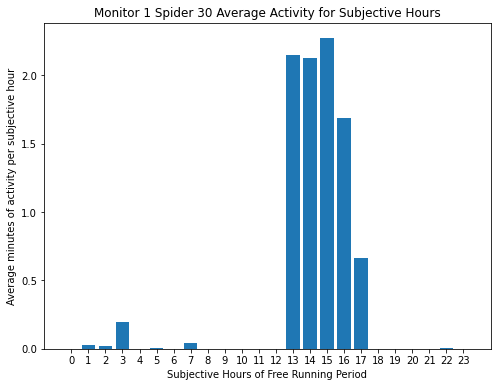

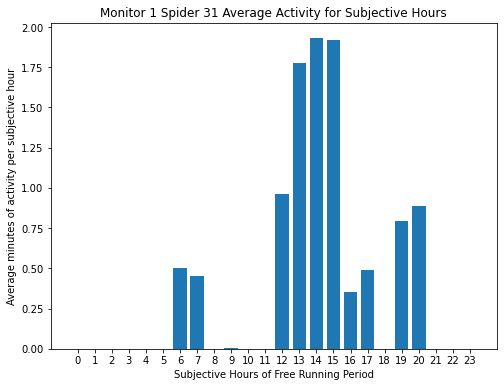

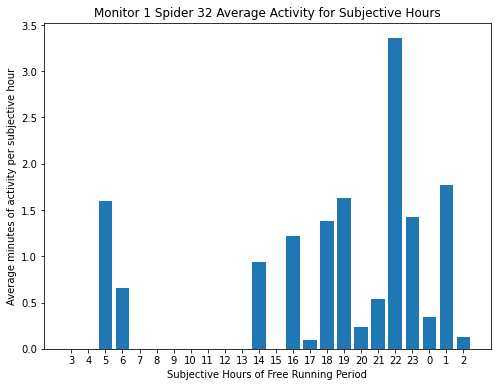

In [26]:
average_subjective_activity_min_first(df4days, per4T)

# Percentages

In [27]:
def average_subjective_activity_max_first_percentage(df, subjective_df):
    for spider in range(len(df.columns)):
        dft = df.copy()
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        total = avg_mins.sum()
        avg_mins = avg_mins * 100 / total
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,24), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Percentage of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 24)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

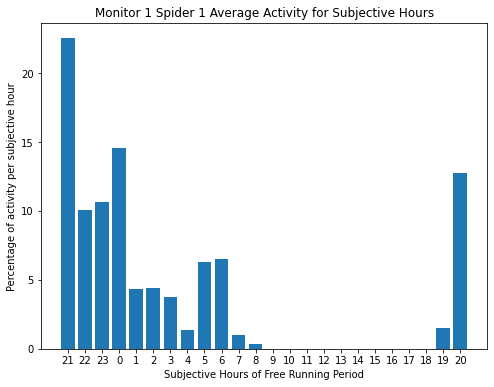

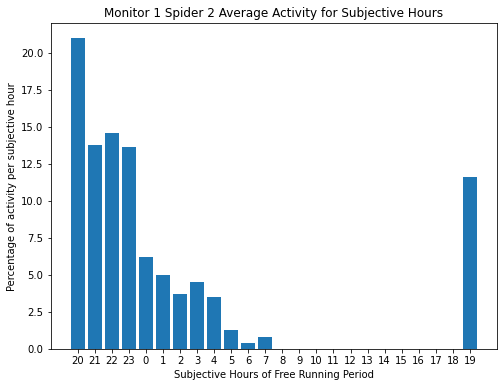

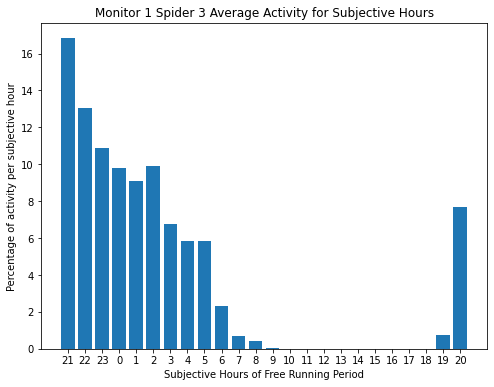

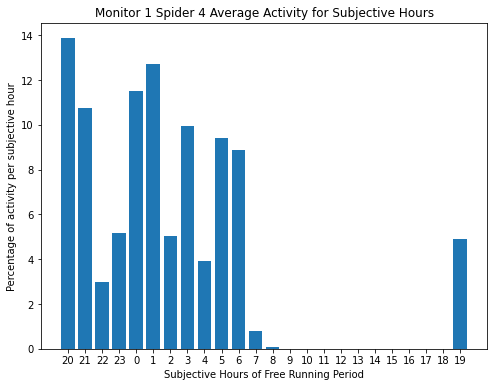

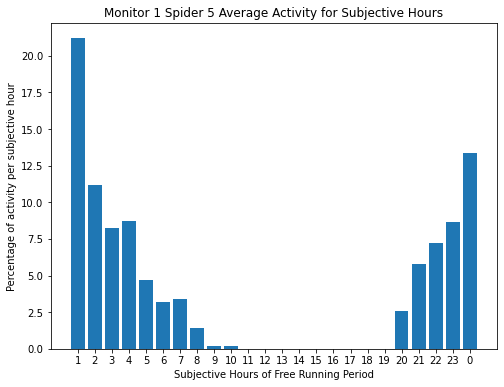

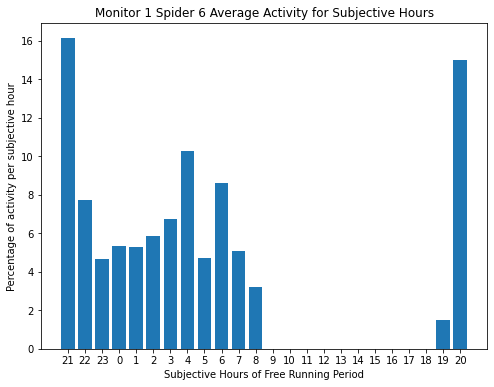

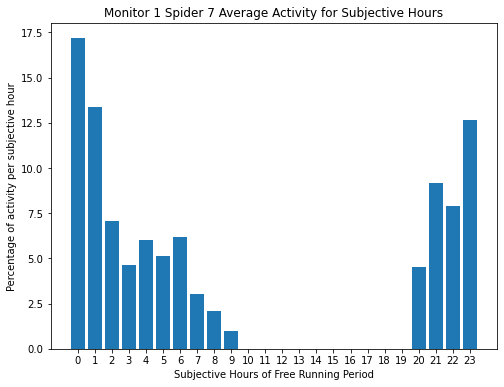

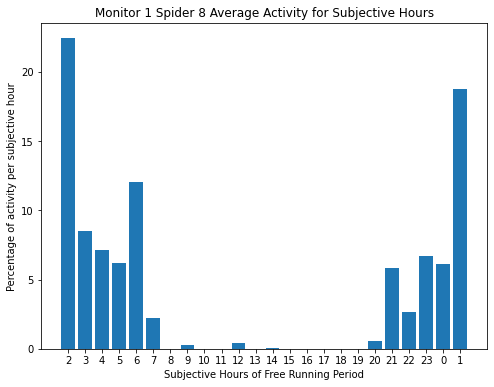

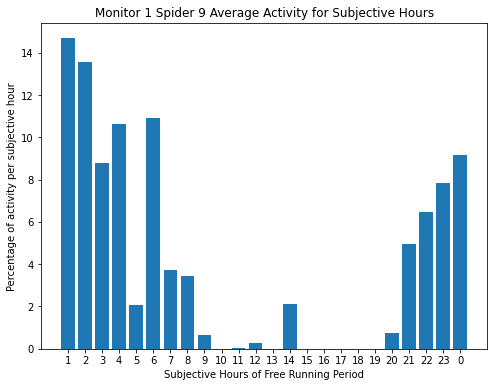

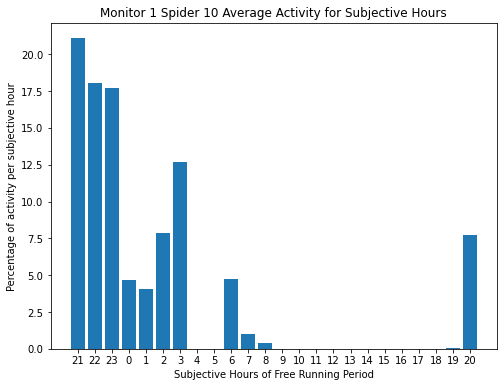

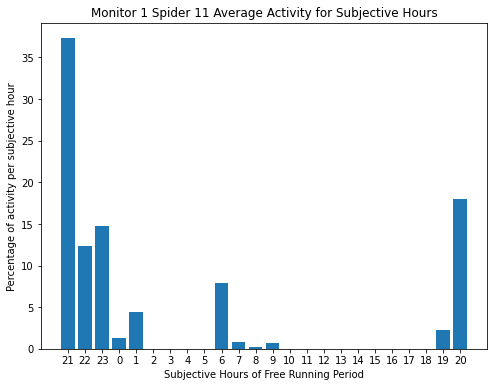

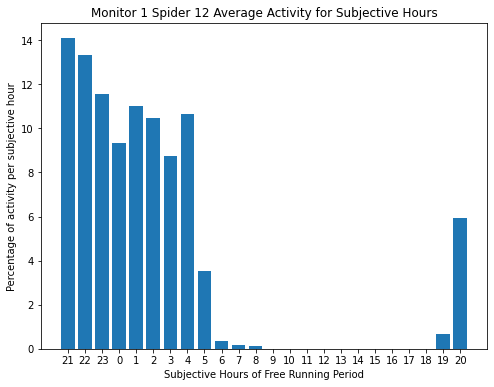

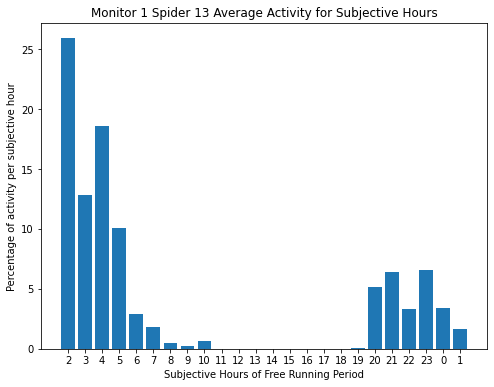

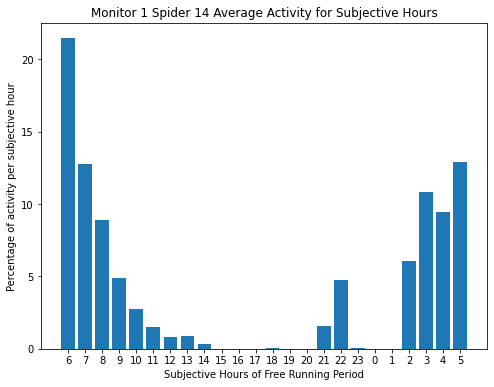

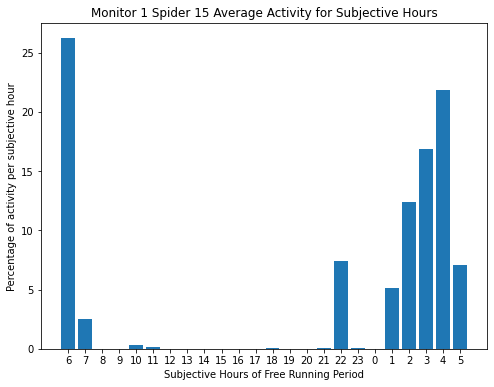

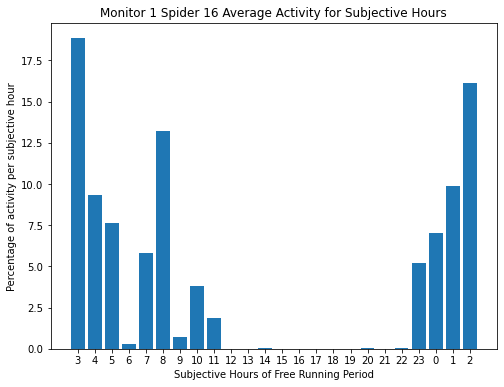

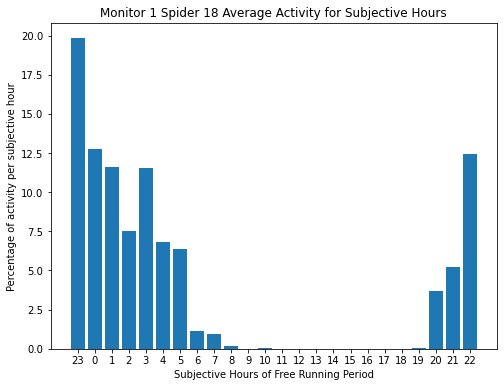

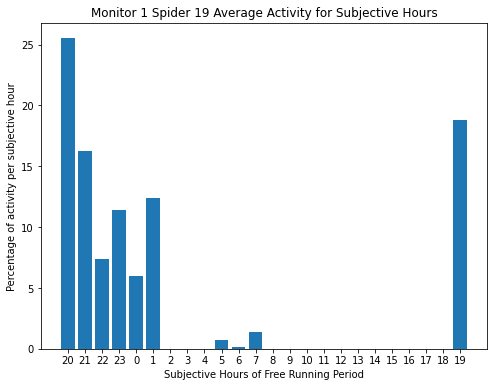

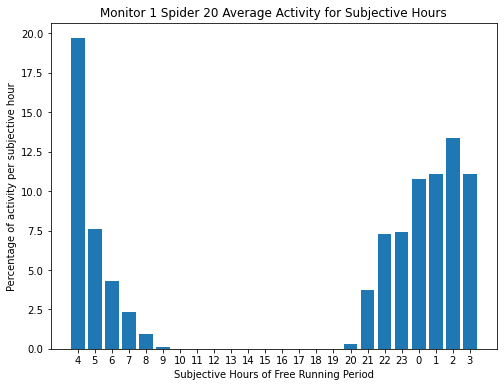

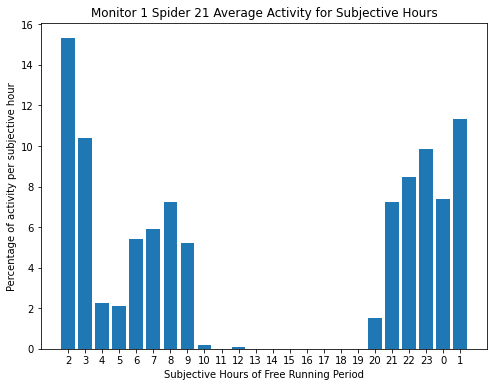

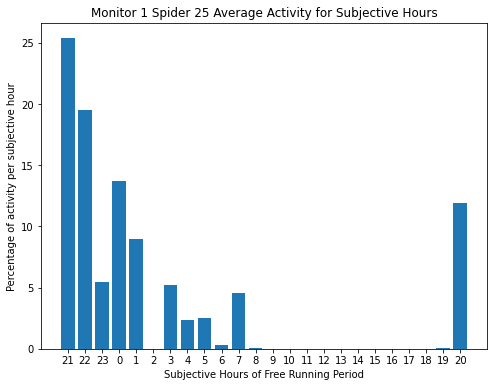

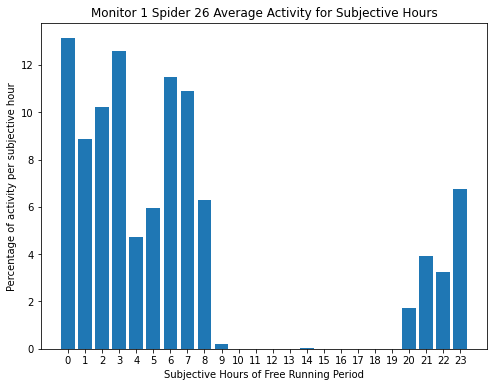

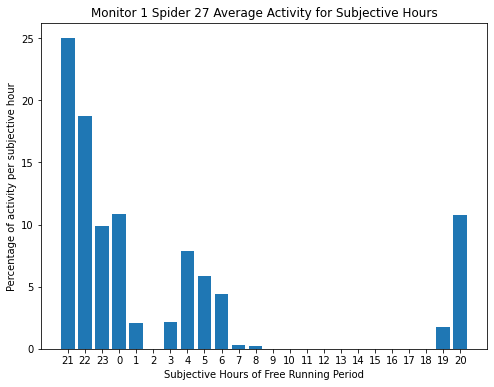

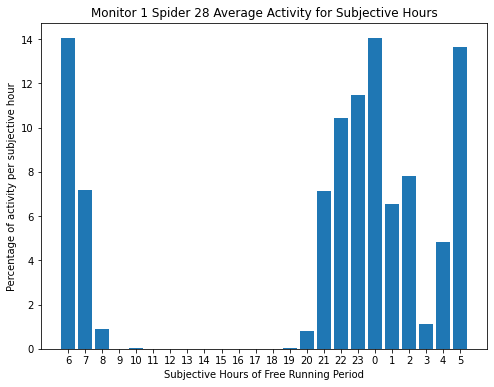

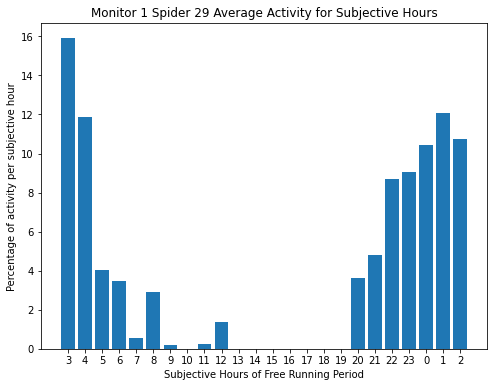

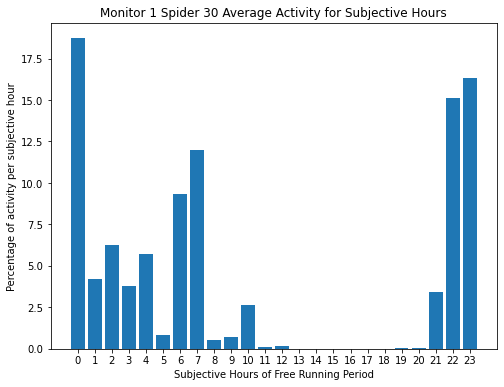

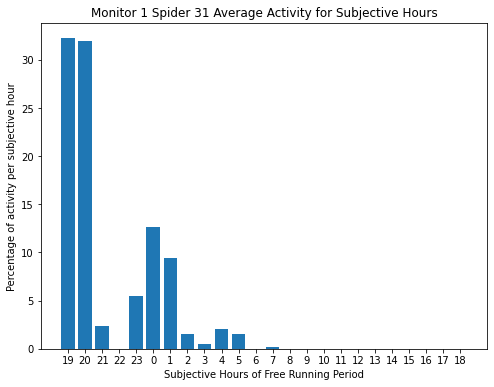

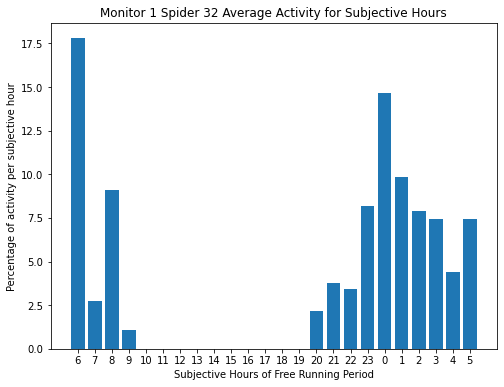

IndexError: index 28 is out of bounds for axis 0 with size 28

In [28]:
average_subjective_activity_max_first_percentage(dflight, per_lightT)

In [31]:
from scipy.optimize import curve_fit
def exponential_curve(x, a, b, c, d):
    return a * np.exp(-b * np.abs(x - c)) + d

def average_subjective_activity_max_first_percentage_function(df, subjective_df):
    for spider in range(len(df.columns)):
        dft = df.copy()
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        total = avg_mins.sum()
        avg_mins = avg_mins * 100 / total
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        
        #Fit the exponential curve to the data
        popt, _ = curve_fit(exponential_curve, range(24), reordered_avg_mins)
        # Create a range of x-values for plotting the fitted curve
        x_fit = np.linspace(0, 23, 100)
        # Calculate the fitted curve using the optimized parameters
        y_fit = exponential_curve(x_fit, *popt)
        # Plot the fitted curve
        plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
        plt.legend()
        
        plt.bar(range(0,24), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Percentage of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 24)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

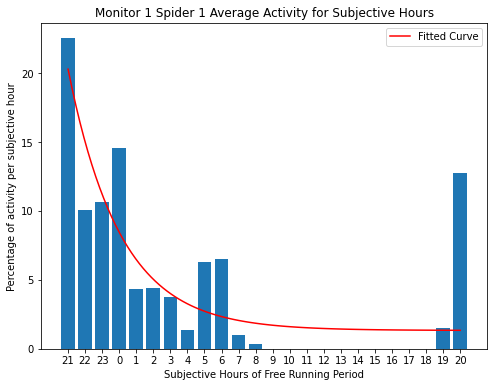

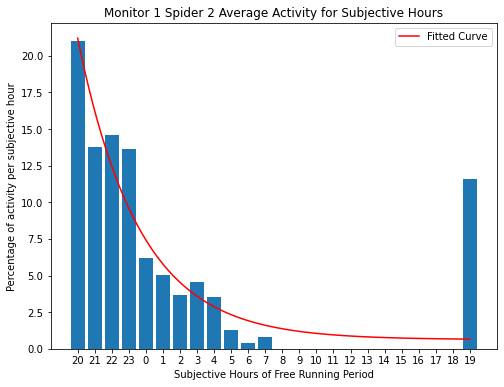

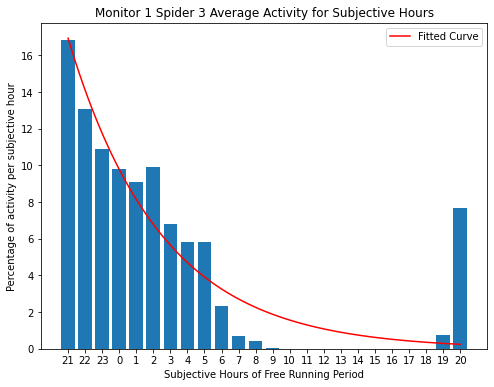

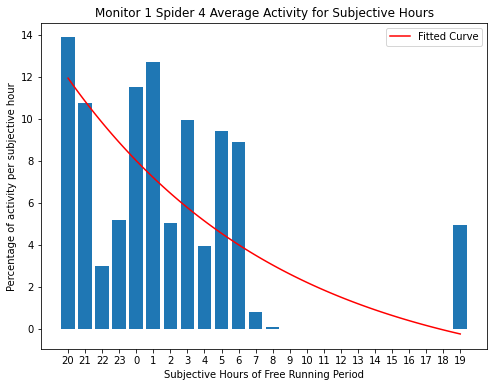

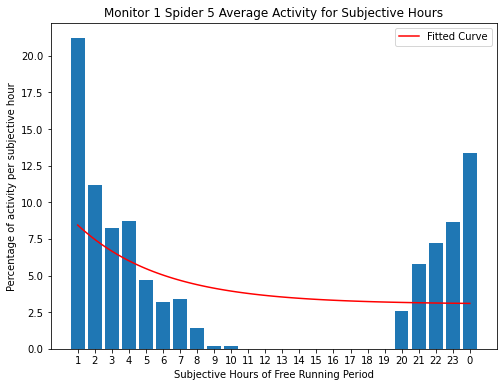

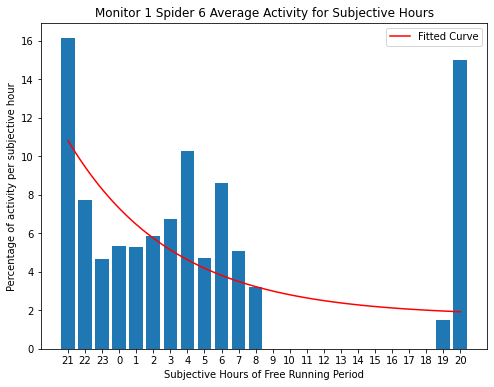

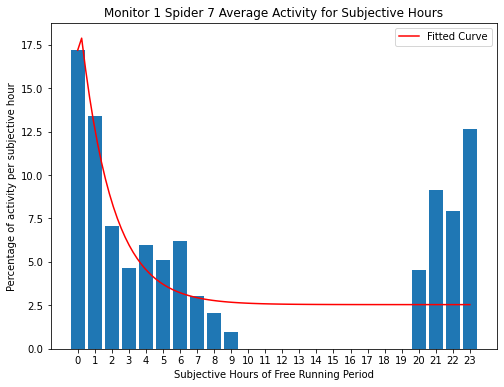

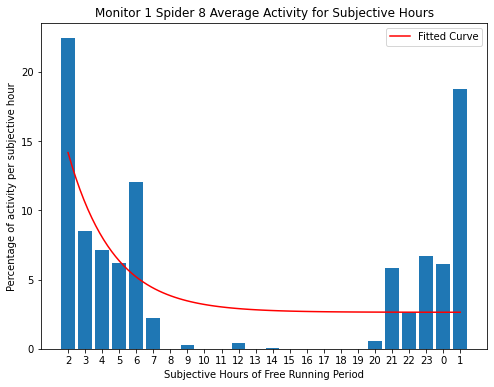

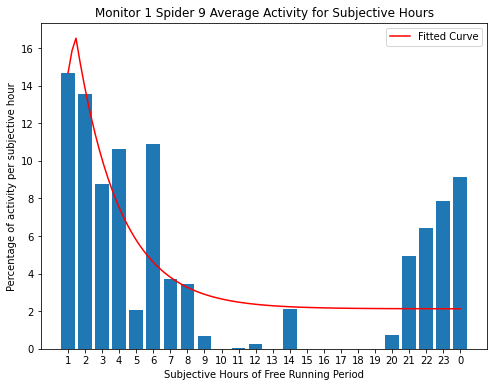

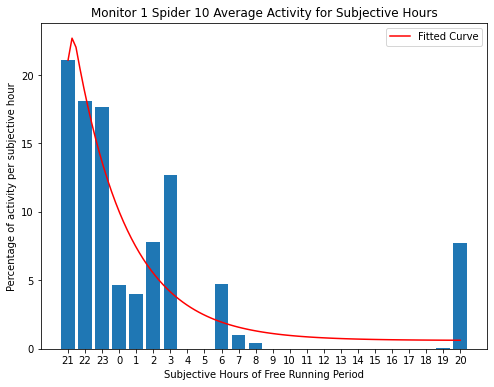

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

<Figure size 576x432 with 0 Axes>

In [32]:
average_subjective_activity_max_first_percentage_function(dflight, per_lightT)

In [67]:
def exponential_growth(x, a, b, c):
    return a * np.exp(b * x) + c
def exponential_decay(x, d, e, f):
    return d * np.exp(-e * x) + f
def generic_curve(x, *params):
    if len(params) != 6:
        raise ValueError("Expected 6 parameters: a, b, c, d, e, f")
    growth_params = params[:3]
    decay_params = params[3:]
    max_index = np.argmax(reordered_avg_mins)
    # Split x into growth and decay segments
    x_fit_growth = x[:max_index + 1]
    x_fit_decay = x[max_index:]
    growth_fit = exponential_growth(x_fit_growth, *growth_params)
    decay_fit = exponential_decay(x_fit_decay, *decay_params)
    return np.concatenate((growth_fit, decay_fit))

def average_subjective_activity_min_first_percentage_curve(df, subjective_df):
    for spider in range(len(df.columns)):
        dft = df.copy()
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        total = avg_mins.sum()
        avg_mins = avg_mins * 100 / total
        min_avg_hour = avg_mins.argmin()
        reordered_avg_mins = pd.concat([avg_mins[min_avg_hour:], avg_mins[:min_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        
        #Fit the exponential curve to the data
        max_value_index = np.argmax(reordered_avg_mins)
        guess_growth_params = (max(reordered_avg_mins), 0.1, reordered_avg_mins[0])
        guess_decay_params = (reordered_avg_mins[max_value_index], 0.1, reordered_avg_mins[max_value_index])
        guess_params = guess_growth_params + guess_decay_params
        x_fit_full = np.linspace(0, 23, 100)
        popt, _ = curve_fit(generic_curve, x_fit_full, reordered_avg_mins, p0=guess_params)
        
        # Calculate the fitted curve using the optimized parameters
        y_fit = generic_curve(x_fit, *popt)
        # Plot the fitted curve
        plt.plot(x_fit_full, y_fit, label='Fitted Curve', color='red')
        plt.legend()
        
        plt.bar(range(0,24), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Percentage of activity per subjective hour')
        tick_labels = list(range(min_avg_hour, 24)) + list(range(0, min_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

In [68]:
average_subjective_activity_min_first_percentage_curve(dflight, per_lightT)

ValueError: operands could not be broadcast together with shapes (101,) (24,) 

<Figure size 576x432 with 0 Axes>

In [15]:
def average_subjective_activity(dft, subjective_df):    
    for spider in range(len(dft.columns)):
        #print(columns[spider])
        spider_period = subjective_df[columns[spider]].values
        #print(spider_period)
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        #test = int(subjective_hour * 60)
        #print(test)

        for i in range (0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        total = avg_mins.sum()
        avg_mins = avg_mins * 100 / total
        fig = plt.figure(figsize = (8,6))
        plt.bar(avg_mins.index, avg_mins.values)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Percentage of activity per subjective hour')
        plt.xticks(range(0,24, 2))
        plt.show()
        fig.savefig(columns[spider] + 'LD_Average_Subjective_Activity_Graph')

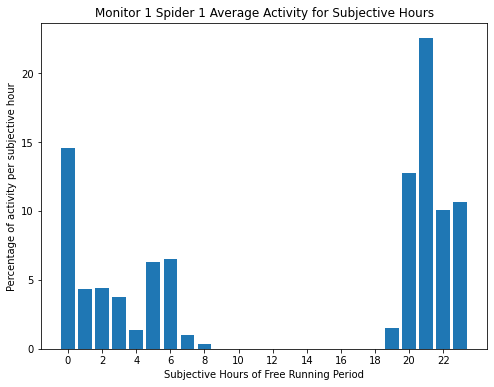

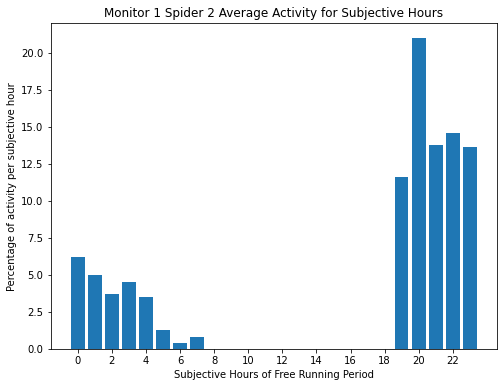

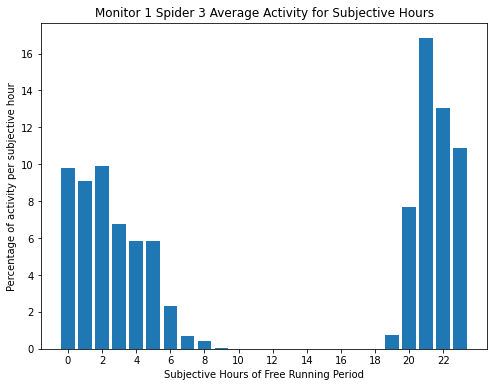

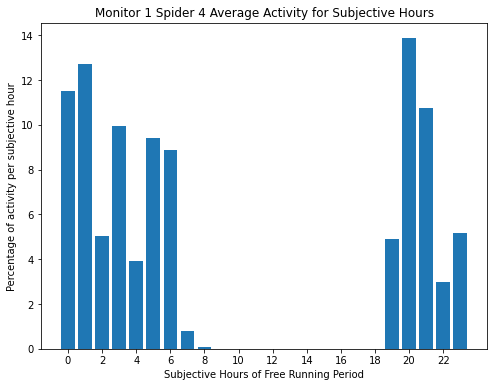

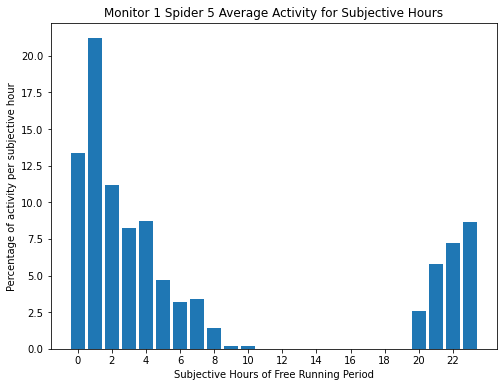

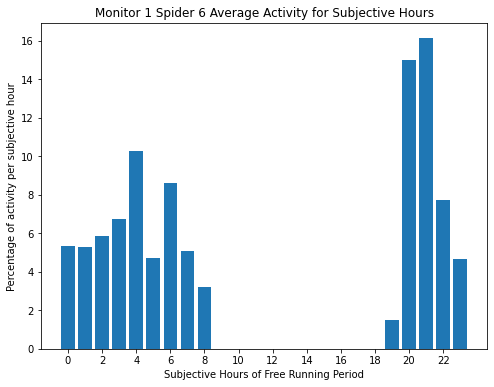

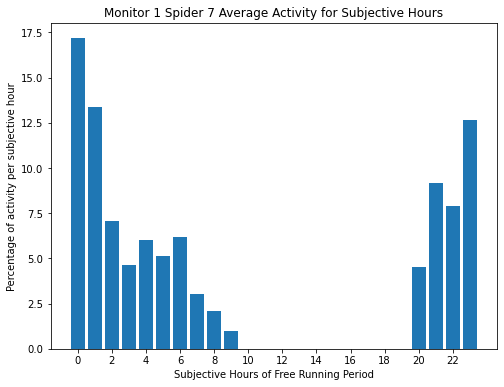

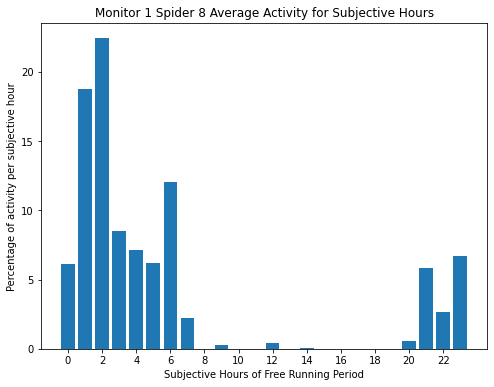

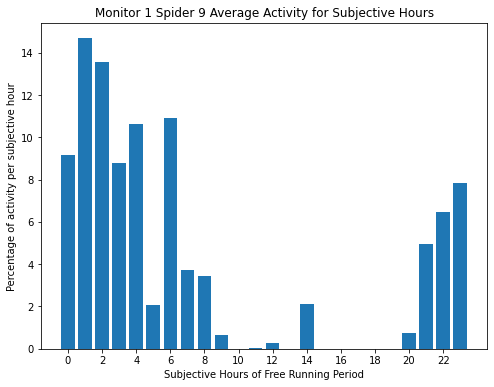

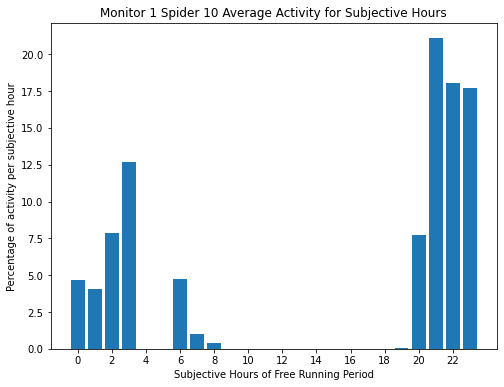

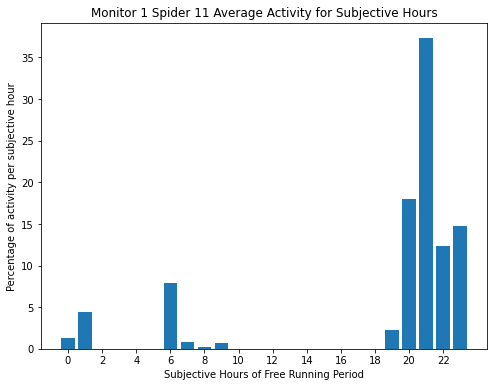

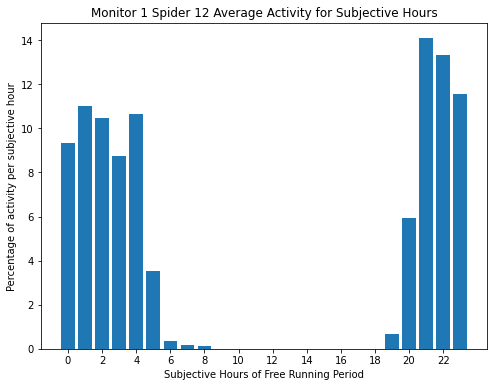

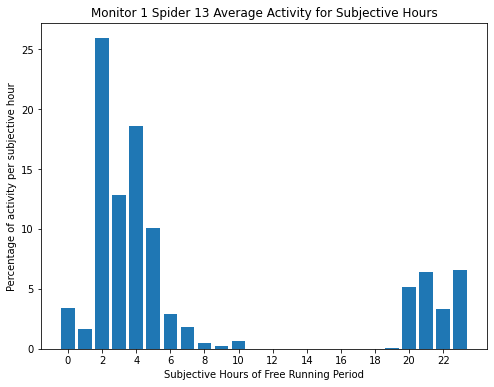

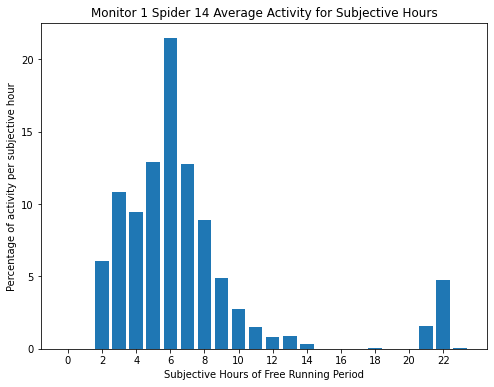

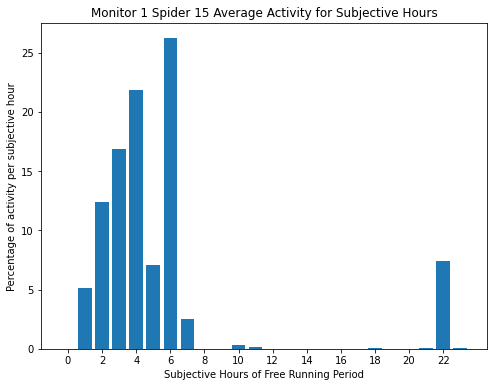

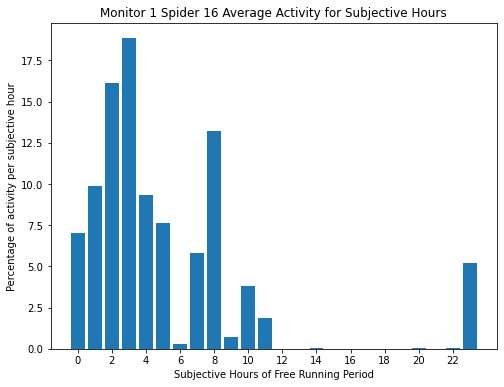

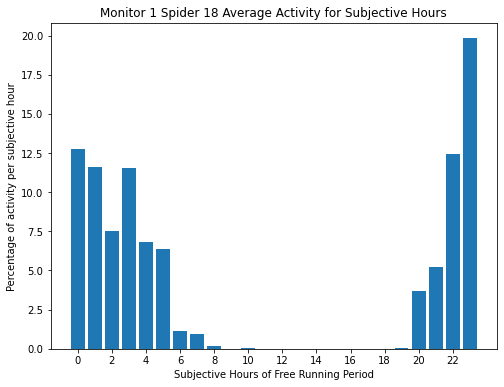

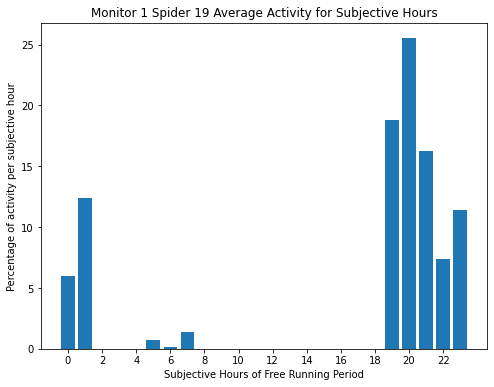

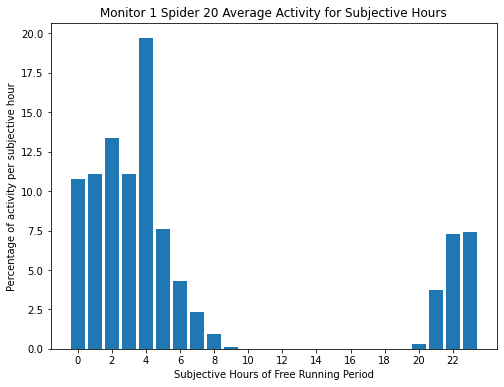

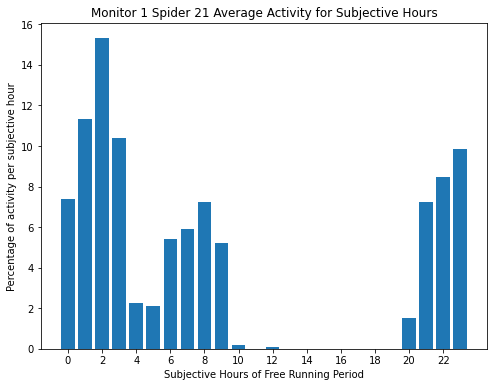

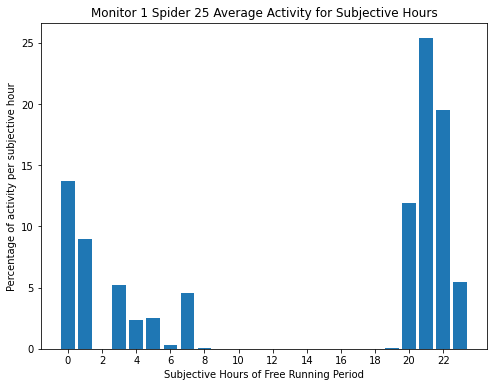

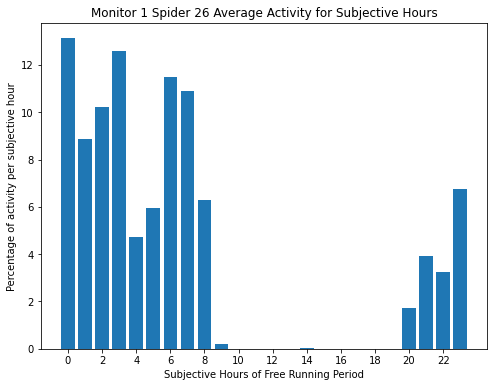

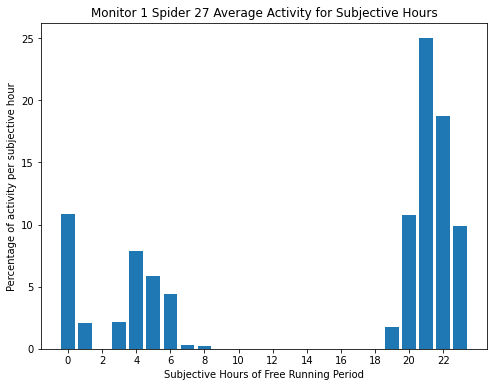

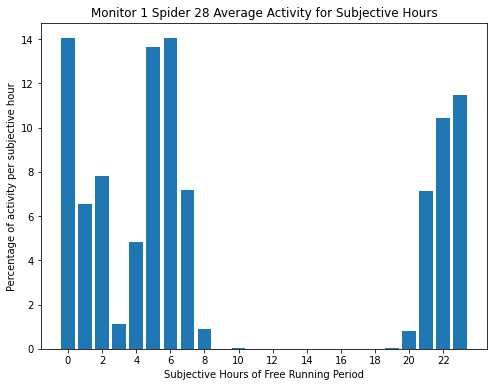

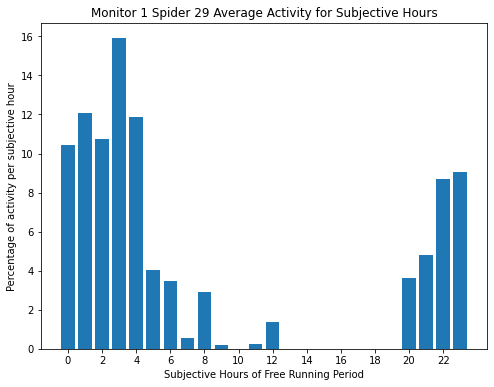

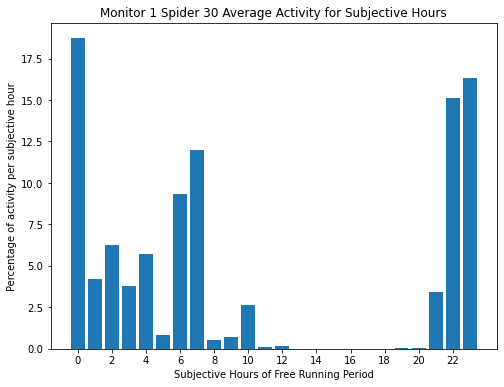

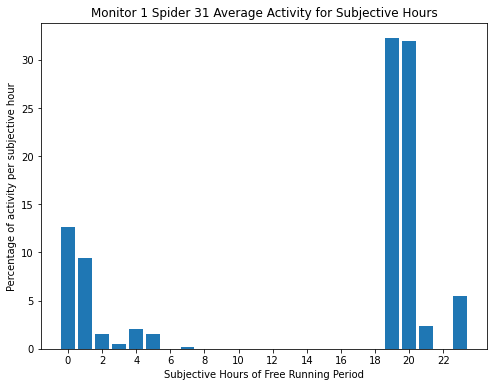

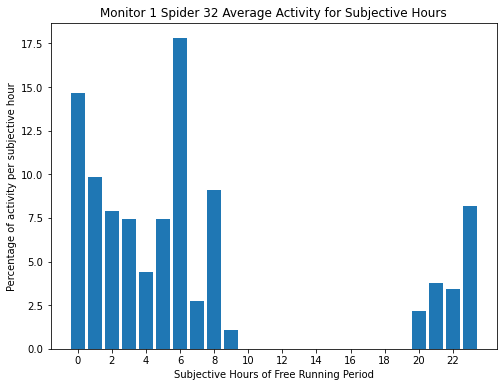

IndexError: index 28 is out of bounds for axis 0 with size 28

In [16]:
average_subjective_activity(dflight, per_lightT)